In [1]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
import time
from sklearn import metrics#引入互信息
import numpy as np
import itertools
import pandas as pd
from sklearn.model_selection import train_test_split#交叉验证
from sklearn.model_selection import StratifiedKFold 
from sklearn.preprocessing import StandardScaler#标准化
from sklearn.base import clone
from itertools import combinations#迭代
from sklearn.metrics import accuracy_score#默认值为True，返回正确分类的比例；如果为False，返回正确分类的样本数
from sklearn.neighbors import KNeighborsClassifier#KNN分类器
import matplotlib.pyplot as plt
from sklearn import preprocessing#预处理
from sklearn.naive_bayes import GaussianNB#特征变量是连续变量
from sklearn.naive_bayes import MultinomialNB#专用于离散数据集

In [51]:
from scipy.stats import ttest_rel
import pandas as pd
import numpy as np

#MRMR = 
MRMR1 = [0.2007070707070707, 0.24952020202020195, 0.29365319865319867, 0.3371212121212121, 0.37279797979797985, 0.40329124579124576, 0.43840548340548335, 0.46767676767676764, 0.4906902356902356, 0.5085454545454546, 0.5225436179981635, 0.5371801346801347, 0.5496503496503496, 0.5597799422799422, 0.5701986531986531, 0.5786205808080809, 0.5861764705882353, 0.5936419753086419, 0.6000850611376927, 0.6062727272727273, 0.6118710918710919, 0.617364554637282, 0.621991655687308, 0.6261405723905724, 0.6298666666666667, 0.6332653457653458, 0.6364945753834643, 0.6393759018759019, 0.6419052594914664, 0.6443013468013468, 0.6464027370478984, 0.648615845959596, 0.6507621671258035, 0.6530124777183601, 0.6554213564213565, 0.657821268237935, 0.659971334971335, 0.6619205209994684, 0.6637697487697488, 0.6655530303030304, 0.6671951219512195, 0.6685726310726311, 0.6698602302090675, 0.6708872819100091, 0.6718675645342312, 0.6730237154150198, 0.6740124650762949, 0.6749116161616162, 0.6757534528963102, 0.6767838383838384]
MRMR2 =  [0.2216161616161616, 0.29171717171717176, 0.35181818181818175, 0.4000126262626263, 0.4389494949494949, 0.4665656565656567, 0.4932900432900434, 0.5130429292929293, 0.5287766554433221, 0.5416969696969697, 0.5521717171717172, 0.5604250841750841, 0.5677622377622377, 0.5742965367965367, 0.5801784511784511, 0.5846275252525253, 0.5881639928698752, 0.5931032547699214, 0.5969351408825093, 0.5992727272727272, 0.6021789321789321, 0.6036547291092745, 0.6048550724637681, 0.6061384680134679, 0.6076767676767677, 0.6093958818958819, 0.6109465020576132, 0.6123051948051947, 0.6133786137234414, 0.6140505050505051, 0.6149657869012707, 0.6158585858585859, 0.6166972757881849, 0.6176841948900773, 0.6187099567099568, 0.6196787317620651, 0.6205664755664757, 0.6211430090377459, 0.6217171717171717, 0.6225138888888889, 0.6234343434343435, 0.6244696969696969, 0.6252748414376321, 0.6261960514233241, 0.6270269360269359, 0.6278238910847607, 0.6285622179239201, 0.629246632996633, 0.629721706864564, 0.6302898989898991]
MRMR3 =  [0.06454545454545454, 0.11797979797979799, 0.17621212121212124, 0.21152777777777776, 0.2458585858585859, 0.26856902356902357, 0.2906926406926406, 0.30952020202020203, 0.32713243546576876, 0.3412222222222222, 0.35294765840220377, 0.36578282828282827, 0.37698523698523695, 0.38626984126984126, 0.3942424242424242, 0.40101010101010104, 0.4075698158051099, 0.41538159371492706, 0.42266347687400313, 0.42888383838383837, 0.4344059644059644, 0.4391230486685032, 0.443719806763285, 0.44779461279461275, 0.4520767676767677, 0.45555944055944053, 0.45894687616909835, 0.46237012987012976, 0.46498258446534313, 0.4677171717171717, 0.4704903877484522, 0.47291824494949497, 0.47516681971227426, 0.47669191919191917, 0.47889321789321787, 0.4810353535353536, 0.4830917280917281, 0.48501063264221156, 0.4868881118881119, 0.4888371212121212, 0.4907452574525745, 0.49256253006253004, 0.4943998120742307, 0.4959768135904499, 0.49763187429854094, 0.49909420289855067, 0.5004706640876853, 0.5018823653198653, 0.503236446093589, 0.5045141414141415]
MRMR4 =  [0.1571212121212121, 0.20828282828282826, 0.2724747474747475, 0.30987373737373736, 0.34104040404040403, 0.3631228956228956, 0.3825541125541125, 0.397260101010101, 0.40598765432098766, 0.41564646464646465, 0.42556932966023875, 0.43893518518518515, 0.45324397824397816, 0.4641594516594517, 0.47213468013468024, 0.478342803030303, 0.48414735591206176, 0.49203142536475863, 0.49837852206273264, 0.5039217171717172, 0.5093049543049543, 0.5150550964187328, 0.5209881422924901, 0.524989478114478, 0.5288868686868686, 0.5319716394716394, 0.5355274971941638, 0.5385930735930736, 0.5406025774991292, 0.5425858585858586, 0.5455555555555556, 0.5477162247474747, 0.5499464340373431, 0.5518775995246583, 0.5531933621933622, 0.5542508417508417, 0.5548935298935299, 0.5552658160552897, 0.556074851074851, 0.5564532828282829, 0.5571138211382114, 0.5576358826358826, 0.5586762978623444, 0.5600723140495868, 0.5610617283950617, 0.5617182696530523, 0.5625843541800989, 0.5634375000000001, 0.5643011750154607, 0.5655747474747475]
MRMR =  [0.16099747474747472, 0.216875, 0.2735395622895623, 0.3146338383838384, 0.3496616161616162, 0.3753872053872054, 0.40123556998557, 0.421875, 0.43814674523007857, 0.4517777777777778, 0.4633080808080808, 0.47558080808080805, 0.48691045066045063, 0.49612644300144293, 0.5041885521885522, 0.5106502525252525, 0.5165144087938206, 0.5235395622895622, 0.5295155502392345, 0.5345877525252525, 0.5394402356902357, 0.5437993572084482, 0.5478886693017129, 0.5512657828282828, 0.5546267676767677, 0.557548076923077, 0.5604788627010849, 0.563161075036075, 0.565217258794845, 0.5671637205387206, 0.5693536168132942, 0.5712772253787879, 0.5731431741659014, 0.5748165478312537, 0.5765544733044734, 0.5781965488215488, 0.5796307671307672, 0.5808349946836788, 0.5821124708624709, 0.5833393308080809, 0.5846221359940873, 0.5858101851851851, 0.5870527953958187, 0.5882831152433424, 0.5893970258136925, 0.5904150197628459, 0.5914074253169997, 0.5923695286195286, 0.5932531952174809, 0.5942906565656566]


#MRMD = 
MRMD1 =  [0.2007070707070707, 0.24239898989898992, 0.30336700336700334, 0.354229797979798, 0.39478787878787885, 0.4389141414141414, 0.4701082251082252, 0.49405303030303027, 0.5098372615039282, 0.5285707070707071, 0.5450091827364555, 0.5570454545454545, 0.5672261072261072, 0.5778535353535353, 0.5875824915824915, 0.5978345959595959, 0.6068805704099822, 0.6156032547699214, 0.6226448697501329, 0.6294267676767676, 0.6349302549302549, 0.640185950413223, 0.6453227931488801, 0.6499410774410774, 0.6536565656565657, 0.6569988344988344, 0.6599289188178076, 0.662768759018759, 0.665259491466388, 0.6674730639730639, 0.6698680351906158, 0.6721133207070707, 0.6745913682277319, 0.6767617349970292, 0.6786796536796537, 0.6806144781144781, 0.6824447174447175, 0.6843261562998405, 0.6858559958559958, 0.6874204545454546, 0.689069967972407, 0.6906685906685907, 0.6925041108762039, 0.6941792929292929, 0.6958294051627385, 0.6971662274923145, 0.6984461637653128, 0.6996727693602693, 0.7010307153164295, 0.7022010101010102]
MRMD2 =  [0.2216161616161616, 0.2644444444444444, 0.35107744107744104, 0.4118939393939394, 0.45683838383838377, 0.4927693602693602, 0.517157287157287, 0.5339204545454546, 0.5454769921436587, 0.5570555555555555, 0.5670523415977962, 0.5742634680134681, 0.5806177156177156, 0.5855014430014429, 0.5896666666666666, 0.5943655303030303, 0.5992305407011289, 0.6029405162738496, 0.6060207336523126, 0.6087373737373738, 0.6114069264069263, 0.613783287419651, 0.6159969257795346, 0.6180787037037038, 0.6194989898989899, 0.6212412587412587, 0.6229386457164234, 0.6246320346320345, 0.6254754440961338, 0.6261498316498316, 0.6269631801889867, 0.62744476010101, 0.6277946127946128, 0.6280258467023173, 0.6281500721500721, 0.6282954545454545, 0.6284029484029484, 0.6285061137692717, 0.6287464387464388, 0.6288080808080808, 0.6288667159398869, 0.6291341991341992, 0.6295971341320179, 0.6297348484848486, 0.6296924803591472, 0.6297496706192359, 0.6296153019557275, 0.6297653619528619, 0.6298855905998763, 0.6299121212121213]
MRMD3 =  [0.06454545454545454, 0.08297979797979797, 0.12811447811447813, 0.1712752525252525, 0.21096969696969695, 0.2419107744107744, 0.2707070707070707, 0.2896780303030303, 0.3071492704826038, 0.3240252525252526, 0.34157483930211197, 0.35610690235690234, 0.3695143745143745, 0.3819552669552668, 0.39006397306397306, 0.398488005050505, 0.40644385026737967, 0.41339225589225587, 0.4198431685273791, 0.42592676767676774, 0.43153679653679655, 0.4365358126721763, 0.44100131752305666, 0.44518939393939394, 0.44890909090909087, 0.45234265734265733, 0.4555218855218855, 0.45835497835497835, 0.4610693138279346, 0.46412121212121205, 0.4667611599869665, 0.4691666666666666, 0.4710544842363023, 0.47292929292929287, 0.47485569985569986, 0.47689253647586977, 0.4788192738192738, 0.4805276448697501, 0.4823193473193473, 0.4840227272727273, 0.4858327174180833, 0.48737133237133234, 0.4887867042518205, 0.49018824609733697, 0.4916015712682379, 0.492808519982433, 0.49396410917687517, 0.4951409932659932, 0.4959740259740259, 0.4967070707070706]
MRMD4 =  [0.1571212121212121, 0.20285353535353537, 0.23542087542087542, 0.2762626262626263, 0.3098787878787879, 0.33605218855218855, 0.35235209235209236, 0.36639520202020204, 0.37768799102132433, 0.3875151515151515, 0.4011157024793388, 0.41699915824915823, 0.428978243978244, 0.44059884559884566, 0.450070707070707, 0.4567708333333334, 0.4637254901960784, 0.4705246913580246, 0.4771371610845295, 0.4841439393939394, 0.48995189995189997, 0.49411845730027554, 0.49821256038647344, 0.5027861952861953, 0.5061111111111111, 0.5087917637917638, 0.5117732884399552, 0.5139790764790765, 0.5152664576802508, 0.5168080808080808, 0.5182779406972955, 0.520145202020202, 0.5216636057545149, 0.5235204991087344, 0.5253636363636364, 0.5273835578002244, 0.529024024024024, 0.5306060606060606, 0.5313390313390314, 0.5318434343434343, 0.5320251293422025, 0.5327272727272727, 0.5332663847780127, 0.533475665748393, 0.5338215488215489, 0.5348539745278876, 0.5362927143778208, 0.5377872474747475, 0.539311482168625, 0.5409767676767676]
MRMD =  [0.16099747474747472, 0.1981691919191919, 0.25449494949494944, 0.303415404040404, 0.34311868686868685, 0.3774116161616161, 0.4025811688311688, 0.42101167929292926, 0.4350378787878788, 0.44929166666666664, 0.4636880165289256, 0.4761037457912458, 0.4865841103341103, 0.4964772727272727, 0.5043459595959595, 0.5118647411616162, 0.5190701128936424, 0.5256151795735129, 0.5314114832535886, 0.5370587121212121, 0.5419564694564695, 0.5461558769513315, 0.5501333992094862, 0.5539988425925926, 0.5570439393939394, 0.5598436285936286, 0.562540684624018, 0.564933712121212, 0.5667676767676768, 0.5686380471380471, 0.5704675790159661, 0.5722174873737373, 0.5737760177532905, 0.5753093434343434, 0.5767622655122655, 0.5782965067340067, 0.5796727409227409, 0.5809914938862307, 0.5820652033152033, 0.5830236742424243, 0.5839486326681449, 0.5849753487253487, 0.5860385835095138, 0.5868945133149679, 0.5877362514029181, 0.5886445981554678, 0.5895795723189341, 0.590591593013468, 0.5915504535147392, 0.5924492424242425]

#CCMI = 
CCMI1 =  [0.2007070707070707, 0.24239898989898992, 0.2692760942760943, 0.31665404040404044, 0.3486060606060606, 0.38292087542087544, 0.41207070707070714, 0.4360164141414142, 0.4551571268237935, 0.46990909090909083, 0.4848025711662076, 0.49666245791245794, 0.5066977466977467, 0.5159343434343433, 0.5238619528619528, 0.5302430555555555, 0.5364616755793227, 0.5411279461279461, 0.5471796916533759, 0.5525681818181818, 0.5574434824434825, 0.5619719926538108, 0.5657685551163811, 0.5685542929292929, 0.5708949494949496, 0.5749339549339549, 0.579784885895997, 0.5841702741702742, 0.5880215952629746, 0.5919882154882156, 0.5963440860215053, 0.6007765151515152, 0.6050765228037955, 0.6091221033868093, 0.6123665223665224, 0.6152146464646465, 0.6183906633906634, 0.6213702817650185, 0.624054649054649, 0.627050505050505, 0.6298743532889874, 0.6324314574314575, 0.6348696264975335, 0.6373484848484848, 0.6397912457912457, 0.6422244180939833, 0.6443649258542876, 0.6465540824915824, 0.6485868893011751, 0.650249494949495]
CCMI2 =  [0.2216161616161616, 0.2644444444444444, 0.31767676767676767, 0.37266414141414145, 0.4136464646464647, 0.450446127946128, 0.47864357864357865, 0.5017613636363637, 0.5198709315375982, 0.5349191919191919, 0.5478282828282829, 0.5584932659932661, 0.5662237762237762, 0.5730988455988456, 0.5794983164983165, 0.5856597222222223, 0.5918775995246585, 0.5969725028058361, 0.6028203083466243, 0.6080909090909091, 0.6126455026455027, 0.6169375573921029, 0.6208080808080808, 0.6243581649831651, 0.6280686868686869, 0.6305924630924632, 0.6329292929292929, 0.6349007936507937, 0.6365848136537792, 0.6382659932659933, 0.6398028673835126, 0.6412073863636364, 0.6423951637588001, 0.6433823529411765, 0.6440259740259741, 0.6448498877665544, 0.6455378105378106, 0.6460433280170124, 0.646864801864802, 0.6476439393939394, 0.6483579699433358, 0.6486664261664262, 0.6487021376556261, 0.6488372359963268, 0.6487934904601572, 0.6487758014931928, 0.6488297872340426, 0.6488804713804713, 0.6488610595753453, 0.6485535353535353]
CCMI3=  [0.06454545454545454, 0.08297979797979797, 0.10621212121212123, 0.14978535353535355, 0.18107070707070708, 0.2011952861952862, 0.22797258297258297, 0.24820075757575757, 0.26454545454545453, 0.2773989898989899, 0.2878145087235996, 0.29993265993265994, 0.3074553224553225, 0.3148629148629149, 0.32105723905723904, 0.3257765151515152, 0.32909090909090916, 0.33277497194163863, 0.33672248803827753, 0.3408863636363636, 0.343965848965849, 0.3470179063360882, 0.3493719806763286, 0.35139099326599327, 0.3540949494949495, 0.3595473970473971, 0.36451365506921063, 0.3690836940836941, 0.37341518634622084, 0.3779393939393939, 0.3821733463668947, 0.3863857323232323, 0.39030915212733397, 0.3938383838383838, 0.3977373737373737, 0.4012962962962963, 0.40472290472290473, 0.408056884635832, 0.41156177156177154, 0.41472474747474747, 0.4177888642522789, 0.4208670033670034, 0.4237244538407329, 0.42665289256198347, 0.42937710437710436, 0.43191150636802816, 0.4344562647754137, 0.43666351010101007, 0.43871263656977944, 0.44061313131313135]
CCMI4 = [0.1571212121212121, 0.20285353535353537, 0.23476430976430976, 0.2601893939393939, 0.28389898989898993, 0.30916666666666653, 0.3307503607503607, 0.34553661616161613, 0.3545679012345679, 0.3628131313131313, 0.36955463728191007, 0.37952020202020204, 0.3866472416472416, 0.39260822510822513, 0.3966464646464647, 0.3999116161616162, 0.403184789067142, 0.40621773288439955, 0.40963317384370007, 0.4124823232323232, 0.41564694564694565, 0.41841827364554635, 0.42166666666666675, 0.4245622895622896, 0.42647474747474745, 0.430456487956488, 0.4354246165357277, 0.43995670995670993, 0.44391501219087426, 0.44849831649831645, 0.45199087650700553, 0.45623737373737383, 0.4608325681052954, 0.46476381461675575, 0.46824963924963925, 0.4716975308641975, 0.47465738465738455, 0.4776382243487506, 0.48026936026936023, 0.48326641414141414, 0.48590169992609017, 0.4884163059163059, 0.49068240544984726, 0.4935537190082645, 0.4958529741863075, 0.4977360562143171, 0.4997302815387921, 0.5021527777777778, 0.5045207173778603, 0.5065262626262627]
CCMI =  [0.16099747474747472, 0.1981691919191919, 0.23198232323232323, 0.27482323232323236, 0.30680555555555555, 0.33593223905723907, 0.3623593073593073, 0.38287878787878793, 0.3985353535353536, 0.41126010101010096, 0.42250000000000004, 0.4336521464646465, 0.4417560217560218, 0.4491260822510822, 0.45526599326599326, 0.4603977272727273, 0.46515374331550813, 0.4692732884399551, 0.4740889154704944, 0.4785069444444444, 0.4824254449254449, 0.48608643250688705, 0.4894038208168643, 0.4922164351851852, 0.49488333333333334, 0.4988825757575758, 0.5031631126075571, 0.507027867965368, 0.5104841518634622, 0.5141729797979798, 0.5175777940697295, 0.5211517518939394, 0.5246533516988063, 0.5277766636957814, 0.5305948773448773, 0.5332645903479236, 0.5358271908271909, 0.5382771796916533, 0.5406876456876457, 0.5431714015151514, 0.545480721852673, 0.5475952982202983, 0.5494946558609349, 0.5515980831037649, 0.5534537037037036, 0.5551619455423803, 0.556845314850634, 0.5585627104377104, 0.56017032570604, 0.561485606060606]
    
#Gunawan = 
Gunawan1 =  [0.2007070707070707, 0.25452020202020204, 0.3014309764309765, 0.3505050505050505, 0.38330303030303026, 0.4138973063973064, 0.44657287157287157, 0.4737184343434343, 0.4948372615039281, 0.5122878787878787, 0.5310192837465564, 0.5473695286195287, 0.5634265734265734, 0.5767063492063492, 0.5870303030303029, 0.5970391414141414, 0.6055436720142602, 0.6128563411896746, 0.6186975013290802, 0.6241818181818182, 0.6285064935064936, 0.6320821854912764, 0.6364119455423805, 0.642047558922559, 0.6469191919191919, 0.651287878787879, 0.6552132435465768, 0.659054834054834, 0.6624799721351445, 0.6657491582491581, 0.6690257412838059, 0.6721638257575757, 0.6750780532598714, 0.6778862150920975, 0.6805007215007215, 0.6827553310886644, 0.6849180999180998, 0.6872328548644338, 0.6893149443149442, 0.6910972222222221, 0.6930906627248091, 0.6949891774891774, 0.6967993892412498, 0.6984515610651975, 0.7002031425364759, 0.7018785682916119, 0.7032215774768966, 0.7044854797979798, 0.7060162853019997, 0.7073080808080808]
Gunawan2 =  [0.2216161616161616, 0.3118434343434343, 0.3615151515151515, 0.40895202020202015, 0.44765656565656564, 0.4743771043771044, 0.4998268398268398, 0.516969696969697, 0.5317789001122334, 0.5438383838383838, 0.5539256198347107, 0.5624242424242424, 0.5684926184926185, 0.574011544011544, 0.5782727272727274, 0.5826262626262626, 0.5879084967320262, 0.5924242424242424, 0.5965178096757043, 0.6002045454545454, 0.6032756132756133, 0.6054063360881543, 0.6074989020641195, 0.6094591750841751, 0.6114464646464646, 0.6132789432789433, 0.6143135054246165, 0.6153156565656565, 0.6165586903517937, 0.6177946127946128, 0.618626588465298, 0.6192297979797979, 0.6197627793082339, 0.6202985739750445, 0.6209307359307359, 0.6213117283950618, 0.6216721266721267, 0.622218234981393, 0.6226793576793577, 0.6230593434343433, 0.6233653609263365, 0.6236820586820586, 0.6242201080573173, 0.624707300275482, 0.6251975308641977, 0.6256675450153711, 0.6260229959166129, 0.6262468434343434, 0.6263708513708514, 0.6264232323232323]
Gunawan3 =  [0.06454545454545454, 0.1375, 0.19181818181818183, 0.2246212121212121, 0.2587777777777778, 0.27895622895622896, 0.29976190476190473, 0.3223169191919192, 0.340976430976431, 0.35734848484848486, 0.3728787878787879, 0.384983164983165, 0.39488733488733485, 0.4036183261183261, 0.4128148148148148, 0.42155618686868684, 0.43031788472964944, 0.4367480359147026, 0.4429691653375864, 0.4480126262626263, 0.4526286676286676, 0.4559641873278237, 0.4598309178743962, 0.46258838383838385, 0.46472525252525254, 0.4664413364413364, 0.46889450056116716, 0.47140692640692644, 0.47390107976314866, 0.4756734006734007, 0.47786901270772236, 0.47950915404040406, 0.4813881236608509, 0.4830585264408794, 0.4842828282828282, 0.48540824915824915, 0.4868345618345618, 0.4882150451887294, 0.48943926443926444, 0.49060227272727275, 0.49208918452820893, 0.49358465608465607, 0.4948555320648344, 0.49611914600550955, 0.49732659932659934, 0.4984815546772069, 0.49963464431549537, 0.5007396885521885, 0.5017996289424861, 0.502749494949495]
Gunawan4 =  [0.1571212121212121, 0.22883838383838384, 0.2861784511784512, 0.32099747474747475, 0.3514949494949495, 0.3718265993265993, 0.38955266955266954, 0.4122979797979798, 0.42911896745230077, 0.4435808080808081, 0.4583654729109275, 0.47114898989898985, 0.4798212898212899, 0.4873268398268398, 0.49561952861952857, 0.5032859848484847, 0.5100534759358288, 0.5159988776655443, 0.5222594364699629, 0.5280050505050505, 0.5333044733044733, 0.5380234159779614, 0.5429512516469039, 0.5469065656565656, 0.5499272727272727, 0.553018648018648, 0.5565843621399177, 0.559338023088023, 0.5616318355973529, 0.563959595959596, 0.5658097100032583, 0.567405303030303, 0.5684649525558617, 0.5694266191325015, 0.5705266955266954, 0.5710409652076319, 0.571977886977887, 0.5730409356725147, 0.5735340585340586, 0.5741161616161616, 0.5751613697955161, 0.5756000481000481, 0.5766643175945502, 0.5773530762167126, 0.578354657687991, 0.5795311813790074, 0.5812518805071997, 0.582388468013468, 0.5837074829931973, 0.5849292929292929]
Gunawan =  [0.16099747474747472, 0.23317550505050505, 0.2852356902356903, 0.32626893939393936, 0.3603080808080808, 0.38476430976430975, 0.4089285714285714, 0.43132575757575753, 0.4491778900112233, 0.46426388888888886, 0.4790472910927456, 0.49148148148148146, 0.5016569541569542, 0.5104157647907648, 0.5184343434343435, 0.5261268939393939, 0.5334558823529412, 0.539506874298541, 0.5451109782030834, 0.5501010101010101, 0.5544288119288119, 0.5578690312213039, 0.56167325428195, 0.5652504208754209, 0.5682545454545455, 0.5710067016317016, 0.5737514029180696, 0.57627886002886, 0.57864289446186, 0.5807941919191919, 0.5828327631150211, 0.5845770202020202, 0.5861734771962045, 0.5876674836601308, 0.5890602453102453, 0.5901290684624018, 0.5913506688506689, 0.5926767676767677, 0.5937419062419063, 0.59471875, 0.5959266444937177, 0.596963985088985, 0.598134836739488, 0.5991577708907254, 0.600270482603816, 0.6013897123407994, 0.6025327745540511, 0.6034651199494949, 0.6044735621521337, 0.6053525252525251]

#NMRMR =
NMRMR1 = [0.2007070707070707, 0.24239898989898992, 0.2963131313131313, 0.349760101010101, 0.3941010101010102, 0.4411195286195287, 0.47897546897546894, 0.5116729797979798, 0.5354938271604939, 0.553989898989899, 0.5708494031221304, 0.5866540404040405, 0.6004584304584304, 0.6127669552669553, 0.622915824915825, 0.6315877525252525, 0.6387789661319073, 0.6454208754208753, 0.65188995215311, 0.6583282828282829, 0.6639393939393939, 0.6685399449035814, 0.6732674571805007, 0.6778367003367004, 0.6818161616161617, 0.6857051282051283, 0.6892237186681631, 0.6922095959595959, 0.695067920585162, 0.6980690235690236, 0.7006598240469207, 0.7029166666666666, 0.7049357208448117, 0.7073573975044563, 0.7092914862914862, 0.7111812570145903, 0.7130876330876331, 0.7143952684742159, 0.7154649054649055, 0.7164810606060606, 0.7175018477457502, 0.7185810485810485, 0.7194561898050269, 0.7204189623507806, 0.721189674523008, 0.7219510320597278, 0.7227981947130884, 0.7235406144781146, 0.7242743764172337, 0.7250666666666667]
NMRMR2 = [0.2216161616161616, 0.2644444444444444, 0.33808080808080804, 0.3976641414141414, 0.44371717171717173, 0.4811447811447811, 0.5132900432900434, 0.538219696969697, 0.5583557800224467, 0.5715707070707071, 0.5826905417814509, 0.5929713804713805, 0.6005594405594404, 0.6065836940836942, 0.610016835016835, 0.6137089646464646, 0.6171657754010694, 0.6199943883277216, 0.6221105794790005, 0.6234570707070708, 0.6246777296777298, 0.6250734618916438, 0.6253886693017128, 0.6252609427609428, 0.625410101010101, 0.6255905205905206, 0.625594837261504, 0.6254779942279942, 0.6251776384535005, 0.6248956228956228, 0.6244884327142392, 0.6240372474747475, 0.623680746862565, 0.6235086155674391, 0.6232207792207792, 0.6230723905723906, 0.6227818727818728, 0.6227698032961191, 0.6228153328153329, 0.6230530303030304, 0.6234146341463416, 0.6235221260221261, 0.623779657035471, 0.6241264921946741, 0.6238148148148149, 0.6234189723320158, 0.6232054588437567, 0.6233017676767677, 0.6235301999587715, 0.6234626262626263]
NMRMR3 =[0.06454545454545454, 0.08297979797979797, 0.13335016835016836, 0.1768308080808081, 0.21301010101010104, 0.24270202020202022, 0.26901154401154403, 0.292645202020202, 0.3115207631874298, 0.3297373737373737, 0.343833792470156, 0.35678451178451176, 0.36834110334110337, 0.3798376623376624, 0.3897272727272727, 0.39657512626262625, 0.40307783719548423, 0.4099074074074074, 0.4159011164274322, 0.42207323232323235, 0.42802789802789803, 0.4328856749311294, 0.43746376811594206, 0.4417087542087542, 0.4454363636363636, 0.4488772338772339, 0.45272166105499434, 0.4559722222222222, 0.4584622082897945, 0.46078619528619524, 0.46313945910720106, 0.46551767676767675, 0.46751606978879706, 0.4695306001188354, 0.4715887445887446, 0.47365600448933776, 0.4755514605514605, 0.4773152578415736, 0.4789601139601139, 0.48035606060606056, 0.48168391229366836, 0.4828944203944203, 0.4840486257928118, 0.48517561983471075, 0.48617845117845115, 0.48711462450592885, 0.48810659789383193, 0.489057239057239, 0.4899010513296227, 0.49066666666666664]
NMRMR4 = [0.1571212121212121, 0.20285353535353537, 0.22734006734006731, 0.26431818181818184, 0.29213131313131313, 0.3208754208754208, 0.3532034632034632, 0.3813573232323232, 0.40288439955106625, 0.42221212121212126, 0.4399403122130394, 0.45583754208754207, 0.4668919968919969, 0.4759704184704185, 0.48494276094276095, 0.4919665404040404, 0.49777183600713015, 0.5005723905723906, 0.5036150983519405, 0.5071818181818182, 0.5098773448773448, 0.5118686868686868, 0.514508124725516, 0.5160500841750841, 0.5173757575757576, 0.5182128982128982, 0.5194388327721661, 0.5197402597402597, 0.5211354928596308, 0.5222491582491583, 0.522613229064842, 0.5245486111111111, 0.5268396082032446, 0.5287358882947119, 0.5307171717171717, 0.5323695286195286, 0.5338124488124488, 0.5353296119085592, 0.5373076923076923, 0.539689393939394, 0.5421951219512195, 0.5449025974025974, 0.5474324641766503, 0.5490622130394857, 0.5505723905723906, 0.5518961352657005, 0.5534246722544595, 0.5554008838383838, 0.556866625438054, 0.5580040404040403]
NMRMR = [0.16099747474747472, 0.1981691919191919, 0.24877104377104373, 0.2971433080808081, 0.335739898989899, 0.3714604377104377, 0.40362012987012985, 0.4309738005050504, 0.45206369248035916, 0.4693775252525253, 0.48432851239669417, 0.4980618686868687, 0.5090627428127428, 0.5187896825396826, 0.5269006734006735, 0.5334595959595959, 0.5391986036838978, 0.5439737654320987, 0.5483791866028709, 0.5527601010101011, 0.5566305916305917, 0.5595919421487603, 0.5626570048309179, 0.5652141203703704, 0.5675095959595959, 0.5695964452214453, 0.5717447624392069, 0.573350018037518, 0.574960815047022, 0.5765, 0.5777252362333007, 0.5792550505050504, 0.5807430364248546, 0.5822831253713606, 0.5837045454545454, 0.5850697951739618, 0.5863083538083538, 0.587452485380117, 0.5886370111370112, 0.5898948863636364, 0.5911988790342448, 0.592475048100048, 0.59367923420249, 0.5946958218549128, 0.5954388327721662, 0.5960951910408432, 0.5968837309262841, 0.5978251262626263, 0.5986430632859204, 0.5992999999999999]


print("length:",len(MRMR))
print("3NN") 
print("MRMR1:",np.mean(MRMR1),np.std(MRMR1))
print("MRMD1:",np.mean(MRMD1),np.std(MRMD1))
print("CCMI1:",np.mean(CCMI1),np.std(CCMI1))
print("Gunawan1:",np.mean(Gunawan1),np.std(Gunawan1))
print("NMRMR1:",np.mean(NMRMR1),np.std(NMRMR1))

print()
print("SVM")
print("MRMR2:",np.mean(MRMR2),np.std(MRMR2))
print("MRMD2:",np.mean(MRMD2),np.std(MRMD2))
print("CCMI2:",np.mean(CCMI2),np.std(CCMI2))
print("Gunawan2:",np.mean(Gunawan2),np.std(Gunawan2))
print("NMRMR2:",np.mean(NMRMR2),np.std(NMRMR2))

print()
print("NB")
print("MRMR3:",np.mean(MRMR3),np.std(MRMR3))
print("MRMD3:",np.mean(MRMD3),np.std(MRMD3))
print("CCMI3:",np.mean(CCMI3),np.std(CCMI3))
print("Gunawan3:",np.mean(Gunawan3),np.std(Gunawan3))
print("NMRMR3:",np.mean(NMRMR3),np.std(NMRMR3))

print()
print("LR")
print("MRMR4:",np.mean(MRMR4),np.std(MRMR4))
print("MRMD4:",np.mean(MRMD4),np.std(MRMD4))
print("CCMI4:",np.mean(CCMI4),np.std(CCMI4))
print("Gunawan4:",np.mean(Gunawan4),np.std(Gunawan4))
print("NMRMR4:",np.mean(NMRMR4),np.std(NMRMR4))

length: 50
3NN
MRMR1: 0.5811050747813337 0.11764391134962583
MRMD1: 0.6026798162844645 0.12153075849804323
CCMI1: 0.5409769953091684 0.10986052783645683
Gunawan1: 0.5998363998184287 0.12432673480324202
NMRMR1: 0.6272081472421217 0.1304777946781722

SVM
MRMR2: 0.5718116904006225 0.0882714484679014
MRMD2: 0.5807387866050014 0.0901187414984474
CCMI2: 0.5818271095843024 0.1021249183515319
Gunawan2: 0.5738244672133512 0.0857374770215647
NMRMR2: 0.5827782985042337 0.09194654069703963

NB
MRMR3: 0.4122246224712293 0.10347011982911809
MRMD3: 0.40329942129729235 0.1112070565634993
CCMI3: 0.3376439072851662 0.09347666191106155
Gunawan3: 0.4220290148752245 0.10057981915496023
NMRMR3: 0.40105385863638937 0.10884839391189266

LR
MRMR4: 0.4878027476019925 0.09554824443868427
MRMD4: 0.4632621701235143 0.09401928233377375
CCMI4: 0.41515529951500646 0.08007119107645828
Gunawan4: 0.5073764589936769 0.0976882941426182
NMRMR4: 0.47682329440679944 0.09820119900204453


In [52]:
print("3NN")
print("第1对：",ttest_rel(NMRMR1,MRMR1))
print("第2对：",ttest_rel(NMRMR1,MRMD1))
print("第3对：",ttest_rel(NMRMR1,CCMI1))
print("第4对：",ttest_rel(NMRMR1,Gunawan1)) 
print()
print("SVM")
print("第1对：",ttest_rel(NMRMR2,MRMR2))
print("第2对：",ttest_rel(NMRMR2,MRMD2))
print("第3对：",ttest_rel(NMRMR2,CCMI2))
print("第4对：",ttest_rel(NMRMR2,Gunawan2)) 
print()
print("NB")
print("第1对：",ttest_rel(NMRMR3,MRMR3))
print("第2对：",ttest_rel(NMRMR3,MRMD3))
print("第3对：",ttest_rel(NMRMR3,CCMI3))
print("第4对：",ttest_rel(NMRMR3,Gunawan3)) 
print()
print("LR")
print("第1对：",ttest_rel(NMRMR4,MRMR4))
print("第2对：",ttest_rel(NMRMR4,MRMD4))
print("第3对：",ttest_rel(NMRMR4,CCMI4))
print("第4对：",ttest_rel(NMRMR4,Gunawan4)) 

3NN
第1对： Ttest_relResult(statistic=22.796942168122058, pvalue=9.739718529308387e-28)
第2对： Ttest_relResult(statistic=16.244810024716635, pvalue=2.304726044174135e-21)
第3对： Ttest_relResult(statistic=23.619596852097725, pvalue=1.9763014669751765e-28)
第4对： Ttest_relResult(statistic=16.494000422114805, pvalue=1.2239750795330199e-21)

SVM
第1对： Ttest_relResult(statistic=5.420014646852958, pvalue=1.8060465722737152e-06)
第2对： Ttest_relResult(statistic=1.385901405300222, pvalue=0.1720523339171113)
第3对： Ttest_relResult(statistic=0.2820077136847469, pvalue=0.7791252899946074)
第4对： Ttest_relResult(statistic=4.050836028245806, pvalue=0.00018153782440903017)

NB
第1对： Ttest_relResult(statistic=-9.064562590866789, pvalue=4.725044571210614e-12)
第2对： Ttest_relResult(statistic=-5.194154596493195, pvalue=3.961962977646356e-06)
第3对： Ttest_relResult(statistic=21.1264962475241, pvalue=2.892183938909856e-26)
第4对： Ttest_relResult(statistic=-12.401632807064274, pvalue=9.968308916094569e-17)

LR
第1对： Ttest_relRes

In [53]:
print("特征长度：",len(NMRMR))
print()
a =17
print()
print("MRMR:",max(MRMR))
print(MRMR[a])
print("最大值位置：",MRMR.index(max(MRMR)))
print()
print("MRMD:",max(MRMD))
print(MRMD[a])
print("最大值位置：",MRMD.index(max(MRMD)))
print()
print("CCMI:",max(CCMI))
print(CCMI[a])
print("最大值位置：",CCMI.index(max(CCMI)))
print()
print("Gunawan:",max(Gunawan))
print(CCMI[a])
print("最大值位置：",Gunawan.index(max(Gunawan)))
print()
print("NMRMR:",max(NMRMR))
print(NMRMR[a])
print("最大值位置：",NMRMR.index(max(NMRMR)))

特征长度： 50


MRMR: 0.5942906565656566
0.5235395622895622
最大值位置： 49

MRMD: 0.5924492424242425
0.5256151795735129
最大值位置： 49

CCMI: 0.561485606060606
0.4692732884399551
最大值位置： 49

Gunawan: 0.6053525252525251
0.4692732884399551
最大值位置： 49

NMRMR: 0.5992999999999999
0.5439737654320987
最大值位置： 49


D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


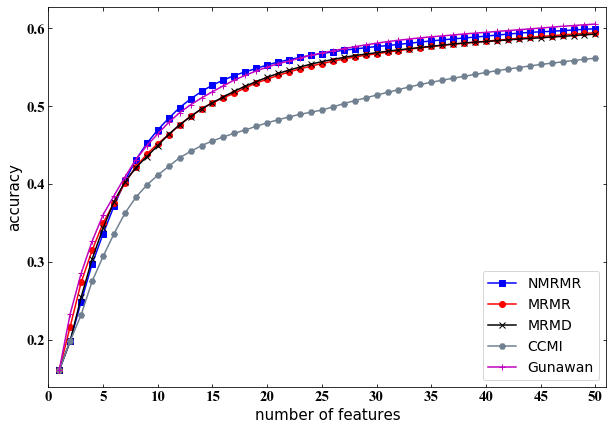

In [54]:
plt.figure(figsize=(10,7))
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.tick_params(top='on', right='on', which='both') 
ax = plt.subplot()
plt.tick_params(labelsize=15)
labels = ax.get_xticklabels() + ax.get_yticklabels()
[label.set_fontname('Times New Roman') for label in labels]

feature_numbers = [i+1 for i in range(len(MRMR))]
#feature_number_own = [i for i in range(len(DOFS_1))]
plt.plot(feature_numbers,NMRMR ,'bs-',label="NMRMR")
#plt.plot(feature_numbers,DWFS,'c*-',label="DWFS")
#plt.plot(feature_numbers,DRJMIM,'g^-',label="DRJMIM")#marker设置标记形状
#plt.plot(feature_numbers,IWFS,'yv-',label="IWFS")
plt.plot(feature_numbers,MRMR,'ro-',label = "MRMR")
plt.plot(feature_numbers,MRMD,'kx-',label = "MRMD")
plt.plot(feature_numbers,CCMI,color = 'slategray',linestyle='-',marker='H',label = "CCMI")
plt.plot(feature_numbers,Gunawan,'m+-',label = "Gunawan")
 
#plt.title("Multi-feature zer classification accuracy")

font1 = { 
'size': 14
}
plt.legend(loc='lower right', prop=font1)
plt.xlim(0, len(MRMR)+1)
#plt.legend( )
# plt.axis('off')
#plt.ylim([0.8,1.0])
ax=plt.gca()  #gca:get current axis得到当前轴
#设置图片的右边框和上边框为不显示
#ax.spines['right'].set_color('none')#去掉右边框
#ax.spines['top'].set_color('none')#去掉上边框

font2 = { 
'size'   : 15
}
plt.ylabel('accuracy',font2)
plt.xlabel("number of features",font2)
my_x_ticks = np.arange(0, len(MRMR)+1, 5)
#new_ticks = np.linspace(0, len(MRMR), )
#plt.xticks(new_ticks)
#my_y_ticks = np.arange(-2, 2, 0.3)
plt.xticks(my_x_ticks)
#plt.yticks(my_y_ticks)

plt.grid(0)#显示网格线 1=True=默认显示；0=False=不显示
plt.show()

In [ ]:
from scipy.stats import ttest_rel
import pandas as pd
import numpy as np

#CCMI = 
CCMI1 =  [0.6804135338345865, 0.6829636591478695, 0.6838137009189642, 0.6906140350877192, 0.6946942355889725, 0.6964536340852131, 0.6977103472968135, 0.6986199874686717, 0.6998830409356724, 0.700417293233083, 0.7003759398496241, 0.7003414786967419, 0.7007171775592829, 0.7010392051557466, 0.7006340852130325, 0.7005921052631578, 0.7037778269202418, 0.7066095795043164, 0.7075643055005935, 0.7094617794486215, 0.7127885189163383, 0.7183367509683297, 0.7234025280592785, 0.728046157059315, 0.7323182957393483, 0.7362618083670716, 0.7395154553049289, 0.7432603831006087, 0.7477560280010371, 0.7521194653299915, 0.755708222168324, 0.7601672149122807, 0.7642196400091137, 0.7680266843579537, 0.7716161833154314, 0.7750055694792536, 0.7776640926640926, 0.7804590423426987, 0.7832260137523297, 0.7857415413533835, 0.7882446971086252, 0.7903962286669053, 0.7924421518913563, 0.7945146958304853, 0.7969512670565301, 0.7991674839272094, 0.8010872926998346, 0.8030257936507936, 0.8049925834995653, 0.8068706766917294]
CCMI2 =  [0.6946992481203007, 0.7022117794486217, 0.7047159565580616, 0.7047775689223058, 0.7037619047619047, 0.7088387635756058, 0.711750805585392, 0.7139645989974938, 0.7156864383180174, 0.7170375939849625, 0.7181886534518113, 0.7191478696741853, 0.7195748987854251, 0.7199409237379163, 0.7198913951545531, 0.7201456766917294, 0.7212398643667994, 0.7222124756335282, 0.7241630391768895, 0.7274185463659147, 0.7298878147750328, 0.7314496468443836, 0.7331045003813882, 0.7344131161236424, 0.7356170426065162, 0.7367283593599383, 0.7377573563538475, 0.7397851772287863, 0.7420270503845822, 0.7449448621553885, 0.7473518473603363, 0.7494356986215539, 0.7512417407154249, 0.752957024915229, 0.7545667740780523, 0.7570607073238651, 0.759554968502337, 0.7620488721804511, 0.7642799305957201, 0.7662869674185464, 0.7679521975670884, 0.7696509129967776, 0.7715092964970566, 0.77328320802005, 0.7749782790309105, 0.7764909556499946, 0.7782589452354289, 0.7800574352548036, 0.7816751061326785, 0.7833280701754386]
CCMI3 =  [0.560075187969925, 0.5819423558897243, 0.5892314118629909, 0.5954417293233083, 0.5992155388471179, 0.6192564745196324, 0.6336054421768709, 0.6418013784461153, 0.6515678084099138, 0.6523521303258145, 0.6571109592162224, 0.6627433166248956, 0.6679140158087526, 0.6719701038310061, 0.6754853801169592, 0.678561246867168, 0.6815848444641014, 0.6842724867724869, 0.6882462735786836, 0.6905582706766918, 0.6931149301825994, 0.6956772613351561, 0.6975923504413206, 0.6993478487886383, 0.7015448621553885, 0.7035728744939271, 0.7051174231875987, 0.707953813104189, 0.7100855587243973, 0.7129093567251462, 0.7149050044466004, 0.7167759241854637, 0.7185334548492444, 0.7203269202417809, 0.7220254206945936, 0.7241858117516012, 0.7256946420104315, 0.7279079277140218, 0.7297513013302487, 0.7315025062656642, 0.7336567027324409, 0.7358273660341329, 0.7378970682520255, 0.7397590567327409, 0.741538290169869, 0.74324016563147, 0.7448696208606622, 0.7464311821219717, 0.7480310470052682, 0.7496669172932331]
mrmr=[]
for i in range(len(CCMI1)):
    a = CCMI1[i]+CCMI2[i]+CCMI3[i]
    a= a/3
    mrmr.append(a)
CCMI =mrmr
print(CCMI) 

#DIMRMR =
DIMRMR1 = [0.6804135338345865, 0.6829636591478695, 0.688638262322473, 0.7115476190476191, 0.7175413533834586, 0.7354260651629072, 0.749629430719656, 0.7615350877192982, 0.7725995544416596, 0.7809248120300751, 0.7881909318751423, 0.7942460317460316, 0.7978311162521687, 0.8037647690655209, 0.8085563909774436, 0.8124381265664159, 0.8164499484004129, 0.8213902812587024, 0.8255348898562195, 0.828501879699248, 0.8314255877789712, 0.8340835042150831, 0.8360755148741419, 0.8383072263993316, 0.8407709273182956, 0.8432475419317524, 0.8449754014666295, 0.8465798424633011, 0.8477197303603837, 0.8486169590643275, 0.8499401730131783, 0.8513369360902254, 0.8529600516442621, 0.8538909774436089, 0.8546333691371284, 0.8553345168476748, 0.8565525299735826, 0.8570478828650573, 0.8573896279159438, 0.8579583333333334, 0.8586212482425576, 0.8592525957751523, 0.8599708573759982, 0.8597354180906813, 0.8595104427736007, 0.8592952489920453, 0.8590892123926839, 0.8589959273182958, 0.8594273950181576, 0.8599516290726817]
DIMRMR2 = [0.6946992481203007, 0.7022117794486217, 0.7297326649958229, 0.747249373433584, 0.7567543859649123, 0.7623454469507103, 0.7733798782670962, 0.780435463659148, 0.7887593984962405, 0.7953922305764409, 0.8012998405103666, 0.8066593567251462, 0.8111760169654906, 0.8154197994987468, 0.818732664995823, 0.8232268170426066, 0.8277944862155389, 0.831272626009468, 0.8349109616145627, 0.8381735588972431, 0.8416254923021841, 0.8449572795625427, 0.8473678762122698, 0.8497859231411863, 0.852181954887218, 0.8545859841912474, 0.856644388749652, 0.8583677944862156, 0.8601365482672196, 0.8617873851294904, 0.8631781065567145, 0.8641842888471178, 0.8649772157666896, 0.8658712958867757, 0.8668503401360544, 0.8676287942077414, 0.8683787170629276, 0.8689638570109485, 0.8693907846539426, 0.8700404135338345, 0.8706583532000733, 0.8713659147869673, 0.8720405665326105, 0.8726785714285714, 0.8732882205513783, 0.873871363190585, 0.8745416733322668, 0.8751840538847119, 0.875693314919953, 0.8761822055137845]
DIMRMR3 = [0.560075187969925, 0.5819423558897243, 0.6142481203007519, 0.6379135338345865, 0.6632280701754386, 0.6801921470342525, 0.7015341926244182, 0.7175736215538847, 0.7301044277360066, 0.7401290726817039, 0.7501970836181362, 0.7593567251461989, 0.7667428185849239, 0.7731095596133191, 0.7795781119465329, 0.7861755952380953, 0.7925866135928056, 0.7988116123642439, 0.8038550323176363, 0.8081441102756892, 0.8125134264232008, 0.8164855320118478, 0.8198948458101777, 0.8232283834586466, 0.8264952380952381, 0.8293184885290148, 0.8321177944862156, 0.834717150017902, 0.837318727854118, 0.8397468671679197, 0.8415259924003559, 0.8435064223057644, 0.8452153110047848, 0.8465435647943389, 0.8477959183673468, 0.8492498607630187, 0.8503542640384746, 0.8514005408257486, 0.8523931623931622, 0.8532111528822055, 0.8543434806528517, 0.855547201336675, 0.8566949350119486, 0.8576768626110731, 0.85861514898357, 0.8594091206276561, 0.8601693062443343, 0.8608978174603176, 0.8619998977034422, 0.8629578947368421]
DIMRMR = [0.645062656641604, 0.6557059314954051, 0.6775396825396826, 0.6989035087719299, 0.7125079365079365, 0.7259878863826232, 0.7415145005370568, 0.7531813909774435, 0.7638211268913023, 0.7721487050960733, 0.7798959520012151, 0.7867540378724588, 0.7919166506008611, 0.7974313760591955, 0.8022890559732665, 0.8072801796157059, 0.8122770160695857, 0.8171581732108049, 0.8214336279294727, 0.8249398496240601, 0.8285215021681186, 0.8318421052631578, 0.8344460789655299, 0.8371071776663882, 0.8398160401002506, 0.8423840048840049, 0.8445791949008324, 0.8465549289891395, 0.8483916688272405, 0.8500504037872458, 0.8515480906567495, 0.8530092157477025, 0.8543841928052455, 0.8554352793749079, 0.8564265425468433, 0.8574043906061449, 0.8584285036916616, 0.8591374269005847, 0.8597245249876829, 0.8604032999164578, 0.8612076940318275, 0.8620552372995983, 0.8629021196401858, 0.8633636173767752, 0.8638046041028496, 0.8641919109367621, 0.8646000639897616, 0.8650259328877751, 0.8657068692138509, 0.866363909774436]

print("length:",len(CCMI))
print("3NN") 
print("CCMI1:",np.mean(CCMI1),np.std(CCMI1))
print("DIMRMR1:",np.mean(DIMRMR1),np.std(DIMRMR1))

print()
print("SVM")
print("CCMI2:",np.mean(CCMI2),np.std(CCMI2))
print("DIMRMR2:",np.mean(DIMRMR2),np.std(DIMRMR2))

print()
print("NB")
 
print("CCMI3:",np.mean(CCMI3),np.std(CCMI3))
print("DIMRMR3:",np.mean(DIMRMR3),np.std(DIMRMR3))
print()
print("3NN")
 
print("第7对：",ttest_rel(DIMRMR1,CCMI1))
print()
print("SVM")
 
print("第7对：",ttest_rel(DIMRMR2,CCMI2))
print()
print("NB")
 
print("第7对：",ttest_rel(DIMRMR3,CCMI3))

print("特征长度：",len(CCMI))
print()
a =10
print()
print("CCMI:",max(CCMI))
print(CCMI[a])
print("最大值位置：",CCMI.index(max(CCMI)))
print()
print("DIMRMR:",max(DIMRMR))
print(DIMRMR[a])
print("最大值位置：",DIMRMR.index(max(DIMRMR)))

In [ ]:
#DIMRMR =  
 
#MRMR = 
MRMR1 = [0.6976608187134502, 0.6622807017543859, 0.6392787524366471, 0.6237573099415205, 0.6264327485380118, 0.6379142300194932, 0.6530075187969926, 0.6670321637426901, 0.6790123456790125, 0.6885380116959066, 0.6944444444444444, 0.6994152046783626, 0.7057354925775978, 0.7110902255639097, 0.7157699805068226, 0.7215460526315789, 0.7237358101135191, 0.7281026640675764, 0.7317174515235456, 0.7368274853801169, 0.7394179894179894, 0.7417464114832536, 0.7438850750063564, 0.7469785575048732, 0.7489707602339181, 0.7501461988304094, 0.7520684427117176, 0.7538324979114452, 0.7565839887074007, 0.7591520467836258, 0.7608658743633276, 0.7628106725146199, 0.7641502746765904, 0.7655572755417956, 0.7664243943191312, 0.7672514619883041, 0.7680417259364628, 0.769352108341028, 0.7708576998050681, 0.7721491228070175, 0.7739124233347597, 0.7757309941520467, 0.77734258125935, 0.7792397660818714, 0.7811760883690709, 0.7826849733028222, 0.7841234291402265, 0.7858369883040935, 0.7875880176632055, 0.7890526315789473]
MRMR2 = [0.6976608187134502, 0.658187134502924, 0.6919103313840155, 0.6978070175438597, 0.7056140350877194, 0.7188109161793371, 0.7298663324979116, 0.7408625730994152, 0.7505847953216375, 0.7589181286549708, 0.7657894736842104, 0.7705896686159844, 0.7733918128654971, 0.7784878863826232, 0.7836062378167642, 0.786421783625731, 0.7895252837977296, 0.7925601039636126, 0.794998461064943, 0.797748538011696, 0.799443052074631, 0.8017278043593832, 0.8033435036867531, 0.8052631578947369, 0.8070292397660819, 0.80906432748538, 0.8103638726445743, 0.8112050960735171, 0.8119883040935673, 0.8128947368421052, 0.8139030371627994, 0.8151864035087719, 0.8162325004430268, 0.8172170622635018, 0.8179949874686716, 0.8187215724496427, 0.8191243875454403, 0.8196522006771315, 0.8198680461838357, 0.8202046783625732, 0.8205248894594208, 0.82109440267335, 0.8215150278797769, 0.8220361509835193, 0.8227680311890838, 0.8235888634630054, 0.824374766703994, 0.8250182748538012, 0.8256355173648408, 0.8263333333333333]
MRMR3 = [0.5184210526315789, 0.6080409356725147, 0.6379142300194931, 0.6528508771929825, 0.6618128654970761, 0.6677875243664718, 0.6720551378446117, 0.6846856725146199, 0.6951267056530216, 0.7024561403508774, 0.7108718766613504, 0.717056530214425, 0.7230994152046785, 0.7298454469507101, 0.7364132553606237, 0.7415021929824561, 0.7481940144478842, 0.7541423001949318, 0.7594644506001845, 0.764517543859649, 0.7683235867446394, 0.7725146198830409, 0.7763412153572337, 0.7794103313840156, 0.782233918128655, 0.7850314889788574, 0.7872319688109162, 0.7892857142857143, 0.7909961685823754, 0.7927680311890838, 0.7940765893227693, 0.7956505847953216, 0.7971291866028707, 0.7985122119023047, 0.7996658312447786, 0.8007553606237817, 0.8016437490121701, 0.8029162819329024, 0.8042510121457489, 0.8055190058479531, 0.8067251461988304, 0.8077485380116959, 0.808969128246974, 0.8101342371079214, 0.8112475633528264, 0.8123124841088226, 0.8133320890879682, 0.8143092105263158, 0.8153538608425827, 0.8162514619883041]
mrmr=[]
for i in range(len(MRMR1)):
    a = MRMR1[i]+MRMR2[i]+MRMR3[i]
    a= a/3
    mrmr.append(a)
    
MRMR =mrmr
print(MRMR) 

#IWFS = 
IWFS1 =  [0.6976608187134502, 0.6622807017543859, 0.6392787524366471, 0.6562134502923976, 0.6715204678362574, 0.6807992202729045, 0.6904761904761904, 0.700438596491228, 0.7075698505523066, 0.7116666666666666, 0.7159755449229133, 0.7209795321637427, 0.728587494376968, 0.7343567251461987, 0.7400974658869395, 0.7447551169590643, 0.7491744066047471, 0.7536874593892137, 0.7582948599569098, 0.7629678362573099, 0.7669451406293512, 0.7712785752259436, 0.774548690566997, 0.7777655945419103, 0.7800818713450292, 0.7820175438596491, 0.7841996967727962, 0.7860380116959064, 0.7879310344827586, 0.7895224171539962, 0.7911809092624033, 0.7929002192982455, 0.7946748183590289, 0.7963450292397661, 0.7979197994987469, 0.7996994801819363, 0.8013829619092777, 0.8029778393351801, 0.804498425551057, 0.8058040935672515, 0.8074454428754815, 0.8090086326928432, 0.8104923160614715, 0.8119085592769802, 0.8132618583495776, 0.814556318332062, 0.815571730745303, 0.8165448343079922, 0.8173648406731113, 0.8181520467836257]
IWFS2 =  [0.6976608187134502, 0.658187134502924, 0.6919103313840155, 0.7116959064327485, 0.7169005847953217, 0.7257309941520469, 0.7343776106934, 0.7415204678362572, 0.7476933073424301, 0.7521052631578948, 0.7557150451887295, 0.7587475633528264, 0.7629554655870444, 0.7654135338345865, 0.7696296296296297, 0.7739948830409357, 0.7781733746130031, 0.7818875893437296, 0.7860418590335487, 0.7905847953216374, 0.7941938178780285, 0.7979532163742691, 0.800928044749555, 0.8038742690058479, 0.8063742690058479, 0.8088843904633377, 0.8110136452241715, 0.8129908103592314, 0.8146501310748134, 0.8161988304093566, 0.8174778343708734, 0.8186769005847954, 0.8198032961190856, 0.8210182318541451, 0.8220133667502088, 0.8232456140350877, 0.8244112533586218, 0.8253770390889505, 0.8262932973459289, 0.8272953216374269, 0.82798459563543, 0.8287663603453077, 0.829640962872297, 0.8304758107389687, 0.8313905133203379, 0.8319158403254513, 0.8325307950727884, 0.833120126705653, 0.8336854039861559, 0.8341228070175439]
IWFS3 =  [0.5184210526315789, 0.6080409356725147, 0.6379142300194931, 0.6528508771929825, 0.6792397660818713, 0.7013645224171541, 0.7164160401002506, 0.7290570175438598, 0.7400584795321637, 0.746169590643275, 0.7526315789473687, 0.7576023391812865, 0.761808367071525, 0.7649958228905598, 0.7674269005847952, 0.7708516081871346, 0.7738906088751291, 0.7762833008447043, 0.7789935364727608, 0.7811695906432748, 0.7828738512949038, 0.7844231791600214, 0.7863081617086194, 0.7878045808966863, 0.7891929824561402, 0.7906882591093117, 0.7924734676196664, 0.7939431913116124, 0.7953115547489413, 0.7967738791423004, 0.7979720807394831, 0.7989309210526315, 0.7998316498316499, 0.8006707946336429, 0.8016123642439431, 0.8023473034437946, 0.8030425162004109, 0.8037011388119422, 0.8041910331384015, 0.8047953216374271, 0.805370132648695, 0.8059175717070454, 0.8064395484836121, 0.8069377990430623, 0.8074139051332033, 0.8077548944825834, 0.8080813736468831, 0.8083942495126706, 0.8086943549349564, 0.8089824561403509]
mrmr=[]
for i in range(len(IWFS1)):
    a = IWFS1[i]+IWFS2[i]+IWFS3[i]
    a= a/3
    mrmr.append(a)
    
IWFS =mrmr
print(IWFS) 

#DWFS =  
DWFS =  [0.6379142300194931, 0.6480994152046783, 0.653638726445744, 0.6527290448343079, 0.6532358674463937, 0.6611111111111111, 0.6664160401002506, 0.6710769980506822, 0.6768572666233487, 0.6843567251461988, 0.6914673046251995, 0.6972465886939571, 0.702676563202879, 0.7074282929546086, 0.7114359974009097, 0.715844298245614, 0.7212016970530902, 0.72577431232402, 0.7305222119626552, 0.7344444444444443, 0.7374872366100437, 0.7406654261917419, 0.7441011950165269, 0.7472547108512021, 0.7504405458089668, 0.7530326885590043, 0.7556963396144684, 0.7580478975215819, 0.7603549102641661, 0.7625048732943469, 0.7650789159278123, 0.7671600877192981, 0.7695079449465414, 0.7717090929939227, 0.7736340852130326, 0.7754521334199698, 0.777419524787946, 0.7795167743921206, 0.7811915829459689, 0.7830019493177388, 0.7844625112917796, 0.785892973173675, 0.7872183689197153, 0.7885189615452773, 0.7896859432531946, 0.7910712772268838, 0.7925137903861308, 0.7938576185834957, 0.7951824004455584, 0.7964171539961015]


#DRJMIM = 
DRJMIM1 =  [0.6976608187134502, 0.6622807017543859, 0.6392787524366471, 0.6331140350877194, 0.6351461988304095, 0.6424463937621833, 0.6567251461988306, 0.6654970760233919, 0.6711500974658869, 0.6766959064327487, 0.680781499202552, 0.6868177387914229, 0.6911156095366623, 0.6974728487886382, 0.702261208576998, 0.7081323099415205, 0.7126934984520125, 0.7179012345679012, 0.7214527546937519, 0.7262573099415204, 0.7308827624617099, 0.7345959595959597, 0.7377574370709382, 0.7415326510721247, 0.7456491228070176, 0.7500787224471435, 0.7539852718215292, 0.7583542188805347, 0.7622403710425488, 0.7660526315789474, 0.7694397283531409, 0.7731268274853802, 0.7765727449937977, 0.7798159614723084, 0.7827151211361737, 0.7854532163742691, 0.7883515094041409, 0.7912357648507232, 0.7935447593342331, 0.7954751461988303, 0.7979532163742689, 0.7999234196602618, 0.801686386508908, 0.803488835725678, 0.8053346328784925, 0.8072209509280447, 0.8092509642901581, 0.8113121345029239, 0.8133965867048574, 0.8150818713450292]
DRJMIM2 =  [0.6976608187134502, 0.658187134502924, 0.6919103313840155, 0.7141812865497077, 0.72, 0.7264619883040935, 0.7348370927318295, 0.7411549707602338, 0.7466211825860949, 0.7521345029239767, 0.7556618819776714, 0.7594785575048733, 0.763945119208277, 0.7681286549707602, 0.7717348927875243, 0.7752558479532163, 0.778672170622635, 0.7820175438596491, 0.7847337642351493, 0.7879824561403508, 0.7906571985519353, 0.7935805422647527, 0.7964785151284005, 0.7989035087719298, 0.8011461988304093, 0.8032163742690057, 0.8061403508771929, 0.8086361737677527, 0.8107783827384553, 0.8129532163742691, 0.8148179588756839, 0.8165661549707602, 0.8190058479532163, 0.8213020295837633, 0.8234670008354218, 0.8253654970760235, 0.8271613718982139, 0.8292782394582948, 0.8311515969410705, 0.8329312865497076, 0.8347525317358437, 0.8364870509607352, 0.8381476948184414, 0.8397262094630517, 0.841358024691358, 0.8428044749555046, 0.844307577454274, 0.8456384015594541, 0.8471416636830171, 0.8484736842105263]
DRJMIM3 =  [0.5184210526315789, 0.6080409356725147, 0.6379142300194931, 0.6528508771929825, 0.6761403508771932, 0.6951754385964912, 0.7072681704260653, 0.7163377192982455, 0.723424301494477, 0.7280409356725147, 0.7328017012227539, 0.7376461988304094, 0.741340530814215, 0.7440893901420217, 0.7478947368421052, 0.7515533625730993, 0.754781561747506, 0.7582521117608838, 0.7613573407202217, 0.765, 0.7690476190476191, 0.7720095693779906, 0.7749555047037885, 0.7783138401559454, 0.7818245614035089, 0.7852676563202878, 0.7886506389430366, 0.7917919799498747, 0.7947166767493447, 0.7970857699805068, 0.7992925863044709, 0.8011878654970761, 0.8034467481835903, 0.8052631578947368, 0.807126148705096, 0.8090480831708902, 0.8112928718191876, 0.813419513696522, 0.8152946468735942, 0.8168128654970761, 0.8183853943802596, 0.8201336675020886, 0.8220522235822114, 0.8232788410419989, 0.8244509421702403, 0.8258009153318078, 0.8272054249097922, 0.8286610623781676, 0.8300572860723237, 0.8315087719298245]
mrmr=[]
for i in range(len(DRJMIM1)):
    a = DRJMIM1[i]+DRJMIM2[i]+DRJMIM3[i]
    a= a/3
    mrmr.append(a)
    
DRJMIM =mrmr
print(DRJMIM) 

#MRMD = 
MRMD1 =  [0.6976608187134502, 0.6622807017543859, 0.6392787524366471, 0.6359649122807017, 0.6414619883040936, 0.6656432748538011, 0.6813283208020049, 0.6890716374269006, 0.6987004548408056, 0.7068421052631578, 0.7125730994152046, 0.7155458089668616, 0.7213225371120108, 0.7266917293233082, 0.7291812865497076, 0.7327302631578948, 0.7373925008599932, 0.7415529564652369, 0.7447060634041242, 0.7472953216374267, 0.7493734335839598, 0.7517278043593832, 0.7541062801932368, 0.7574074074074074, 0.7600233918128654, 0.7624269005847953, 0.764251678579164, 0.7661340852130325, 0.7680681589030046, 0.7702339181286549, 0.7721090360309375, 0.7741867690058479, 0.7761385787701577, 0.7778207774337804, 0.7792481203007517, 0.7806042884990253, 0.7814525051367156, 0.7822560787934749, 0.7828834907782275, 0.7841520467836257, 0.7853587220082725, 0.7858674463937622, 0.7867401060791513, 0.7873272195640616, 0.7878947368421053, 0.7887871853546912, 0.789753639417693, 0.7903447855750488, 0.7905836018617972, 0.7909239766081871]
MRMD2 =  [0.6976608187134502, 0.658187134502924, 0.6919103313840155, 0.7017543859649122, 0.7098830409356727, 0.7305555555555556, 0.7430659983291562, 0.7524122807017545, 0.7614359974009095, 0.7675730994152048, 0.7736044657097287, 0.7768518518518519, 0.7791722896986054, 0.781203007518797, 0.7839961013645225, 0.7860745614035088, 0.788562091503268, 0.790188434048083, 0.7924899969221296, 0.7940350877192982, 0.7956836535783904, 0.7979133439659755, 0.7994660564454614, 0.8015716374269007, 0.8030760233918129, 0.8046783625730995, 0.8059562486463071, 0.8077172096908939, 0.8093567251461988, 0.8107115009746587, 0.8121486511978872, 0.8131578947368421, 0.814274322169059, 0.8151702786377708, 0.8161654135338345, 0.8169590643274854, 0.8175517622886043, 0.8181132656201908, 0.8186459739091319, 0.8191520467836257, 0.819640564826701, 0.8199665831244779, 0.820658234734122, 0.8210725677830941, 0.8213515269655621, 0.8217391304347826, 0.8221102401393554, 0.8224658869395712, 0.8226996061582529, 0.8231286549707603]
MRMD3 =  [0.5184210526315789, 0.6080409356725147, 0.6379142300194931, 0.6528508771929825, 0.6618128654970761, 0.676169590643275, 0.6954887218045113, 0.7072733918128655, 0.718875893437297, 0.7280994152046786, 0.7361509835194046, 0.7415448343079923, 0.746536212325686, 0.7512113617376776, 0.7559844054580896, 0.7598318713450293, 0.7638802889576883, 0.7674788823911631, 0.770698676515851, 0.7735964912280703, 0.7767195767195766, 0.7795587453482191, 0.7816933638443936, 0.7840886939571151, 0.7858596491228071, 0.7874943769680612, 0.789008013861815, 0.7907894736842106, 0.792266586005243, 0.7939961013645225, 0.7956046029051121, 0.7972770467836258, 0.7988481304270778, 0.800017199862401, 0.8012698412698414, 0.8023148148148149, 0.8030109056424846, 0.8038088642659279, 0.8044384465437097, 0.8052997076023393, 0.8057338468121523, 0.806272626009468, 0.8067795457636339, 0.8075093035619352, 0.8080896686159844, 0.8085303839308416, 0.8090643274853802, 0.8094663742690059, 0.8097445995942237, 0.810327485380117]
mrmr=[]
for i in range(len(MRMD1)):
    a = MRMD1[i]+MRMD2[i]+MRMD3[i]
    a= a/3
    mrmr.append(a)
    
MRMD =mrmr
print(MRMD) 
#RAIW = 
RAIW =  [0.6379142300194931, 0.6480994152046783, 0.653638726445744, 0.6527290448343079, 0.6532358674463937, 0.6611111111111111, 0.6664160401002506, 0.6728313840155945, 0.6780268572666234, 0.685038986354776, 0.692902711323764, 0.6987166991552956, 0.7051581946318789, 0.7113408521303258, 0.7173814165042235, 0.722404970760234, 0.7269579176699917, 0.7320121290881524, 0.735862316610239, 0.7393274853801169, 0.7424672793093845, 0.7452418926103137, 0.7486354775828459, 0.751677225471085, 0.7545380116959065, 0.757103763682711, 0.7598729333622121, 0.7628167641325536, 0.7661826981246218, 0.7691520467836256, 0.7722127900396151, 0.775194931773879, 0.7778959182467954, 0.7806386882238275, 0.7830186577554997, 0.7854207277452891, 0.7876455402771191, 0.7897994254642454, 0.7918853401309541, 0.793869395711501, 0.7955355869348167, 0.796997122435719, 0.7985969445577767, 0.8002835371256425, 0.8017392246047218, 0.8030934824985168, 0.8043901123968314, 0.8057098765432098, 0.8068643831801726, 0.8076530214424951]


In [ ]:
plt.figure(figsize=(10,7))
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.tick_params(top='on', right='on', which='both') 
ax = plt.subplot()
plt.tick_params(labelsize=15)
labels = ax.get_xticklabels() + ax.get_yticklabels()
[label.set_fontname('Times New Roman') for label in labels]

feature_numbers = [i+1 for i in range(len(MRMR))]
#feature_number_own = [i for i in range(len(DOFS_1))]
plt.plot(feature_numbers,DIMRMR ,'bs-',label="DIMRMR")
plt.plot(feature_numbers,DWFS,'c*-',label="DWFS")
plt.plot(feature_numbers,DRJMIM,'g^-',label="DRJMIM")#marker设置标记形状
plt.plot(feature_numbers,IWFS,'yv-',label="IWFS")
plt.plot(feature_numbers,MRMR,'ro-',label = "MRMR")
plt.plot(feature_numbers,RAIW,'m+-',label = "RAIW")
plt.plot(feature_numbers,MRMD,'kx-',label = "MRMD")
plt.plot(feature_numbers,CCMI,color = 'slategray',linestyle='-',marker='H',label = "CCMI")
#plt.title("Multi-feature zer classification accuracy")

font1 = { 
'size': 14
}
plt.legend(loc='lower right', prop=font1)
plt.xlim(0, len(MRMR)+1)
#plt.legend( )
# plt.axis('off')
#plt.ylim([0.8,1.0])
ax=plt.gca()  #gca:get current axis得到当前轴
#设置图片的右边框和上边框为不显示
#ax.spines['right'].set_color('none')#去掉右边框
#ax.spines['top'].set_color('none')#去掉上边框

font2 = { 
'size'   : 15
}
plt.ylabel('accuracy',font2)
plt.xlabel("number of features",font2)
my_x_ticks = np.arange(0, len(MRMR)+1, 5)
#new_ticks = np.linspace(0, len(MRMR), )
#plt.xticks(new_ticks)
#my_y_ticks = np.arange(-2, 2, 0.3)
plt.xticks(my_x_ticks)
#plt.yticks(my_y_ticks)

plt.grid(0)#显示网格线 1=True=默认显示；0=False=不显示
plt.show()

In [ ]:
from scipy.stats import ttest_rel
import pandas as pd
import numpy as np
 
#MIM =  
MIM1 = [0.2744158888058195, 0.3155649362449645, 0.34039682230579904, 0.36308295375356026, 0.3930242196477468, 0.4165713621110331, 0.43561585240086703, 0.45092182662351765, 0.46311257513899984, 0.47177664324647856, 0.4814462742360312, 0.4923829781086176, 0.5018438598553269, 0.5116206099380459, 0.5202874168119094, 0.5280591400652975, 0.5349985692496225, 0.5411368522323993, 0.5467252772595347, 0.5519481461825952, 0.5567506029239042, 0.5620200478917778, 0.5674629377150328, 0.5726451613091428, 0.5773309927671159, 0.5818259518628126, 0.5863465114757606, 0.5904944342147987, 0.5944638645986408, 0.5982190199709688, 0.6017005217279213, 0.6051125806705991, 0.6083634182406467, 0.611435711459655, 0.6143198795315363, 0.6174025844108502, 0.6206733184770276, 0.6238229374580049, 0.6268083517225724, 0.6296552594097662, 0.6323709834808471, 0.6351495997339547, 0.6378139605791445, 0.6404380619370391, 0.6429334710006512, 0.6455399590193239, 0.6480011464409314, 0.6503843903419165, 0.6526155988931713, 0.6548931139870299]
MIM2 = [0.35168989861956285, 0.39325407003009366, 0.42126267781678933, 0.4423959044898593, 0.46982965662931064, 0.4910412841361874, 0.507711231091468, 0.5209275956114858, 0.5307881577371151, 0.5396238256607431, 0.549297510503407, 0.5598868502613779, 0.5689953073907152, 0.5779783707058691, 0.5862723329323242, 0.5939997189434212, 0.6010201118476636, 0.6072125106835192, 0.612741813864919, 0.6179120723350091, 0.6225899905475389, 0.6277271960711258, 0.6328619154593731, 0.6377078102217735, 0.6420972522138165, 0.6462568581953572, 0.6505226815153576, 0.6544334620599105, 0.6581524310487631, 0.6616377020820166, 0.6648669808104277, 0.6679718022130745, 0.6708458659086641, 0.6736174851458991, 0.6762614908355115, 0.6791139055351831, 0.682216229184448, 0.685217486574445, 0.6880510351367695, 0.6907752774211751, 0.6933981464838055, 0.6960345184412307, 0.6985507529275983, 0.7009868556000932, 0.7033217938295651, 0.7057678766150876, 0.7081281735796721, 0.7103811400046339, 0.7125178984634004, 0.7146681795515984]
MIM3 =[0.16702555711157474, 0.1804717496566311, 0.2135573185177809, 0.23491071651033976, 0.2693828089136273, 0.29906658995269636, 0.32453811560390233, 0.3445298195712948, 0.3607479360639494, 0.37605740200448035, 0.39089041785599393, 0.4049095364385021, 0.41730155434081295, 0.4282535975709238, 0.43780257993190363, 0.44617129432142716, 0.45378361462417904, 0.46060946105352396, 0.4667567176335255, 0.47243967190884056, 0.4775557908300496, 0.4829602857451301, 0.48841357789749285, 0.493667938648605, 0.49856234683594347, 0.503138179844886, 0.5075702950081041, 0.5116129523194483, 0.5154176872509326, 0.518972295683903, 0.5223080369222196, 0.5254321033282304, 0.5284383521931451, 0.5312866434929977, 0.5339322427451025, 0.5369029042877445, 0.5400384202082293, 0.5428508209688973, 0.5455492924408045, 0.5481208962053884, 0.5505801325809515, 0.5530399680400366, 0.555307813017419, 0.5574750542511202, 0.5595579008267452, 0.5617163144689419, 0.5638057389475607, 0.5657967973058878, 0.5677176190954535, 0.5696112101200355]
MIM4 = [0.3210336643651589, 0.3536784085683109, 0.38093533679731717, 0.39919551859601193, 0.42389391245227115, 0.4444265715179107, 0.4605686599465852, 0.47287547068114505, 0.4826872330957689, 0.49107393679919475, 0.49997988156465356, 0.5096607025926035, 0.5180753073034498, 0.5257180558821402, 0.532821555674231, 0.5390837640087901, 0.5445715899460162, 0.5496229285929235, 0.554176649749164, 0.5585007546854925, 0.5624848963381961, 0.5667806848852464, 0.571278122276597, 0.5756071632198553, 0.5797402576155789, 0.5836009415889569, 0.5874626937886315, 0.5910219223877013, 0.5944653782194771, 0.5978550157963092, 0.6010397672634511, 0.604082718367733, 0.6070420009640474, 0.6098873755973901, 0.612561132288454, 0.6153849583930583, 0.6184484901404931, 0.6213931798091199, 0.6241839838400546, 0.6269321015100066, 0.6295828360041367, 0.6321686385872608, 0.634629228944517, 0.6370147680767094, 0.6392942448300849, 0.641706216308819, 0.6440430142303478, 0.6462667113363867, 0.64848964612767, 0.6507227071808772]
MIM = [0.278541252225529, 0.31074229112500007, 0.33903803885942163, 0.35989627333744284, 0.389032649410739, 0.4127764519294569, 0.43210846476070564, 0.44731367812186085, 0.45933397550895827, 0.4696329519277242, 0.4804035210400214, 0.49171001685027527, 0.5015540072225763, 0.5108926585242447, 0.519295971337592, 0.526828479334734, 0.5335934714168704, 0.5396454381405915, 0.5451001146267858, 0.5502001612779843, 0.5548453201599222, 0.55987205364832, 0.5650041383371239, 0.5699070183498441, 0.5744327123581137, 0.5787054828730032, 0.5829755454469634, 0.5868906927454647, 0.5906248402794534, 0.5941710083832994, 0.5974788266810049, 0.6006498011449093, 0.6036724093266258, 0.6065568039239855, 0.6092686863501511, 0.612201088156709, 0.6153441145025496, 0.6183211062026167, 0.6211481657850503, 0.623870883636584, 0.6264830246374351, 0.6290981812006207, 0.6315754388671697, 0.6339786849662405, 0.6362768526217616, 0.6386825916030431, 0.640994518299628, 0.6432072597472063, 0.6453351906449238, 0.6474738027098852]

#MRMR = 
MRMR1 =  [0.2744158888058195, 0.3616144123690412, 0.4365667375707309, 0.5015968425094925, 0.544013578248369, 0.5835844227889571, 0.6149702310583031, 0.6410894982368324, 0.6630421456422348, 0.6808402924265322, 0.6965755923486522, 0.710270650898151, 0.7222977129583313, 0.7327140607918008, 0.7418634038929499, 0.7501514417306826, 0.7577494650951329, 0.7645746020918017, 0.77066444043626, 0.7763604961270392, 0.7817905818495129, 0.7867567168425694, 0.7913280795736238, 0.7957602301889958, 0.7997646851900773, 0.803390967297498, 0.8067485630359394, 0.809885648209877, 0.8128212451199951, 0.8156759743695298, 0.8183395639836231, 0.8208464993918341, 0.823178605489202, 0.8253828943516115, 0.8274427874771102, 0.8295108817034789, 0.8314555312689196, 0.8332949739002466, 0.8350842771457831, 0.8367922263375148, 0.8384718911030055, 0.8400561527255196, 0.8415593010709952, 0.8430136907982939, 0.8443796171956172, 0.8457352599127596, 0.8470514101750172, 0.848337391678177, 0.8495402186395515, 0.8507098683226653]
MRMR2 =  [0.35168989861956285, 0.4358960958771506, 0.5079481278525189, 0.5649212991945962, 0.6025658712833382, 0.6385612055567097, 0.6668996896485332, 0.6900763018252507, 0.709393491259404, 0.725041128917351, 0.7390169098670353, 0.7512907778092183, 0.7618990008025841, 0.771160991239692, 0.7793316902125808, 0.7867091363538494, 0.7935418316033038, 0.7996631863214123, 0.8052025074834609, 0.8104239147275115, 0.8154350683788039, 0.8200249181238476, 0.8242201796922858, 0.8282631593524875, 0.8319439633024265, 0.835316823343545, 0.8385237013643438, 0.8414938192789844, 0.8442294462525308, 0.8468040341388242, 0.8492333389041771, 0.8515040880422319, 0.8536632166829139, 0.8557396686437, 0.8577189650332038, 0.8597168100584702, 0.8616037540995735, 0.8633744223687759, 0.8650570147743524, 0.8666689244877597, 0.8682231512781557, 0.8697033756131698, 0.8711097427476739, 0.8724742128151467, 0.8737708640530212, 0.875015927354645, 0.8761965578374332, 0.877359352935238, 0.8784571527169147, 0.8795325112439292]
MRMR3 = [0.16702555711157474, 0.2505393069520423, 0.3455209895783886, 0.42468175442268336, 0.47454346477160414, 0.5188962723831904, 0.5509760602015744, 0.5779800934119497, 0.6001316962214303, 0.6177990529311104, 0.6333303971403371, 0.6464970057709212, 0.657695970675385, 0.6667878351570943, 0.6745816599728734, 0.6815829206670857, 0.6881082809147158, 0.6940821625461396, 0.69923453987097, 0.7040330429497866, 0.7086355793445035, 0.7127705271424367, 0.7165368812109968, 0.7202224164742108, 0.723458346925651, 0.7263750351838096, 0.7290995468435733, 0.7316370395777666, 0.7340255514022345, 0.7362620054202682, 0.7382536303419093, 0.740171107301762, 0.7420831562050815, 0.7439332585107953, 0.7456867945115482, 0.7473549301361376, 0.7489358338846589, 0.7503768079427582, 0.7516695234729175, 0.7529406287211867, 0.7541732931677205, 0.7553140317989178, 0.7563866658429085, 0.7574349635951582, 0.7585345370325941, 0.7595676399631613, 0.7605774450642372, 0.7615406658793511, 0.7624733377022682, 0.763405327071981]
MRMR4 =  [0.3210336643651589, 0.40733941260720996, 0.4747168017428312, 0.5321491784595354, 0.5692301420634909, 0.6042593782660239, 0.6305235259030475, 0.6524389688645318, 0.6708829094054026, 0.6860035832095512, 0.6993228585593179, 0.7106191889478202, 0.7206329399667231, 0.729469755962228, 0.73731420193842, 0.7444200670578247, 0.7510246268030746, 0.7570091432748899, 0.7623920323054598, 0.7673873333053794, 0.7720862800495057, 0.7763776114845466, 0.7802489315922143, 0.7839590208327303, 0.7873896503335032, 0.7905896308789422, 0.7936480621516286, 0.7964612054559594, 0.7990654917895358, 0.801585861823236, 0.8039921774347227, 0.8063015473670045, 0.808526394048884, 0.8106044932972629, 0.8125608047710065, 0.814512925396372, 0.816359526007357, 0.8181118303136163, 0.8198183607502179, 0.8214263115208448, 0.8229951992247506, 0.8244816230081529, 0.8259014274206921, 0.8273055637735006, 0.8286736224357563, 0.8300360650574344, 0.8313518943106828, 0.8326084072208576, 0.8338092566098532, 0.8349642457746218]
MRMR =  [0.278541252225529, 0.363847306951361, 0.4411881641861174, 0.5058372686465769, 0.5475882640917006, 0.5863253197487202, 0.6158423767028646, 0.6403962155846412, 0.6608625606321179, 0.6774210143711362, 0.6920614394788356, 0.7046694058565277, 0.7156314061007558, 0.7250331607877036, 0.733272739004206, 0.7407158914523606, 0.7476060511040568, 0.7538322735585609, 0.7593733800240376, 0.7645511967774292, 0.7694868774055815, 0.7739824433983501, 0.7780835180172802, 0.7820512067121062, 0.7856391614379145, 0.7889181141759487, 0.7920049683488712, 0.7948694281306468, 0.797535433641074, 0.8000819689379646, 0.8024546776661081, 0.8047058105257081, 0.8068628431065203, 0.8089150787008426, 0.8108523379482171, 0.8127738868236147, 0.8145886613151273, 0.8162895086313493, 0.8179072940358176, 0.8194570227668265, 0.8209658836934081, 0.82238879578644, 0.8237392842705674, 0.8250571077455249, 0.8263396601792472, 0.827588723072, 0.8287943268468425, 0.829961454428406, 0.8310699914171469, 0.8321529881032993]


#IWFS = 
IWFS1 =  [0.27060897678894524, 0.35809305383735907, 0.4433711164040904, 0.5069726436632449, 0.5493721921465604, 0.5879813664757364, 0.6197694397217964, 0.6438918577077898, 0.6652819862553633, 0.6825326986197991, 0.6969706247275204, 0.70904728316025, 0.7201436850488963, 0.7306071971454716, 0.7396258258861232, 0.7476580846862462, 0.7546439720732461, 0.7609668490042156, 0.7668275557344993, 0.7724412234783529, 0.7777148191080977, 0.7825916569401509, 0.7878490805643454, 0.7927667937642743, 0.797325577427332, 0.80149622785795, 0.8053659701553716, 0.8090399200480682, 0.8124568062878101, 0.8156819477876425, 0.818865480853443, 0.8220818313110341, 0.8250836372508277, 0.8280258407675498, 0.8308122270127819, 0.8335992414223551, 0.83625594679041, 0.8388011619334989, 0.8412295999789261, 0.8434881737913605, 0.8456471400445341, 0.8477109591776308, 0.8496737749201515, 0.8515621111141496, 0.8533521715430296, 0.8550642749073607, 0.8566921107636374, 0.8582678253468666, 0.8597835503353431, 0.8612193744949134]
IWFS2 =  [0.3474841039704473, 0.43007424001138606, 0.5170447466094767, 0.574218969934674, 0.6122859197154848, 0.6458920301469503, 0.6730615408880147, 0.6941236156563209, 0.7126685066661713, 0.7280202525561852, 0.7407175830140169, 0.7512898762507123, 0.7613536251500947, 0.7706934757067491, 0.7788094109666536, 0.7859915218655422, 0.7923730639245973, 0.7981887301367873, 0.8035619352091601, 0.8086670970014629, 0.8133934484754702, 0.8176900630698224, 0.8223563331261102, 0.8267637691873955, 0.8308314354386505, 0.8346273341857395, 0.8381579767650393, 0.8415016821917926, 0.8446148468215452, 0.8475206138543084, 0.8503151659766557, 0.8530895830925859, 0.8557122336645515, 0.8582343849048658, 0.8606430593330144, 0.8629684674198416, 0.8651681310835148, 0.8672746757388635, 0.8692842241658509, 0.8712364447841405, 0.8731039512060215, 0.8748800210556771, 0.8765759781138959, 0.8781802411290148, 0.8796987869108609, 0.8811583343348104, 0.8825534856632575, 0.8839017257820887, 0.8851927130266259, 0.8864449710809632]
IWFS3 =  [0.16702555711157474, 0.2747898262863252, 0.3738412087946651, 0.44589941629313123, 0.4891781058579669, 0.5257558914428672, 0.5534960320126914, 0.5739247016974811, 0.5929340632047199, 0.6082159775446173, 0.6206417274193109, 0.6307453219269673, 0.6405859490645078, 0.649296322988271, 0.6568027340846229, 0.663377347290589, 0.6691974794328203, 0.6748487745631865, 0.680374936013816, 0.6854507711120411, 0.6900071697425969, 0.6940906880002359, 0.6981133545167657, 0.7018906654332359, 0.7054687684121737, 0.7089202421653137, 0.7120882590984606, 0.7150607560841611, 0.717832068452774, 0.72042216077798, 0.7228901760682395, 0.72520384259269, 0.727455548501498, 0.72964441239116, 0.731735924360215, 0.7338216530602971, 0.7357887679808344, 0.7376522777395774, 0.7393540632175828, 0.7410002950932119, 0.7425450699528735, 0.7439932781846798, 0.745334020610898, 0.746657837931798, 0.747958659234395, 0.7491702196760306, 0.7503028124274189, 0.7513546567138556, 0.7523460433615475, 0.7533343666552723]
IWFS4 =  [0.32628908175739146, 0.4026481432135375, 0.4843514047007457, 0.540423548949065, 0.5765826406737989, 0.6097947692778902, 0.6361447983096796, 0.6560821693734702, 0.674181697583714, 0.6886933845032245, 0.7005563659839142, 0.7104070343726664, 0.7193712779503982, 0.7272234660987387, 0.7342940468215695, 0.7404541982837912, 0.7459273316528727, 0.7509360048563778, 0.7555646231960187, 0.7597788262968396, 0.763591324137127, 0.7671649533302994, 0.7713068650252642, 0.7751574684615853, 0.7788031361707938, 0.7822138064024338, 0.7853957255042985, 0.7883811610091459, 0.7912495737638364, 0.7939231747400468, 0.7964693930907978, 0.799085081201169, 0.8015258104789543, 0.8038197883372289, 0.805982661697856, 0.8081029740042109, 0.8101436265444664, 0.8120684724521359, 0.8139413425265829, 0.815760950347326, 0.8175835496244226, 0.8193423066609041, 0.821034324377814, 0.8226690033367678, 0.8242262253360279, 0.8257180470332796, 0.8271464115199036, 0.8285085234732534, 0.8298281868981954, 0.8310800351493417]
IWFS =  [0.27785192990708973, 0.36640131583715196, 0.4546521191272445, 0.5168786447100288, 0.5568547145984528, 0.592356014335861, 0.6206179527330455, 0.6420055861087655, 0.6612665634274921, 0.6768655783059565, 0.6897215752861905, 0.700372378927649, 0.7103636343034743, 0.7194551154848076, 0.7273830044397422, 0.7343702880315423, 0.740535461770884, 0.7462350896401417, 0.7515822625383735, 0.7565844794721741, 0.761176690365823, 0.7653843403351271, 0.7699064083081214, 0.7741446742116227, 0.7781072293622374, 0.7818144026528592, 0.7852519828807925, 0.788495879833292, 0.7915383238314915, 0.7943869742899945, 0.797135053997284, 0.7998650845493698, 0.8024443074739579, 0.8049311066002012, 0.8072934681009669, 0.8096230839766762, 0.8118391180998064, 0.8139491469660189, 0.8159523074722357, 0.8178714660040098, 0.8197199277069629, 0.8214816412697229, 0.8231545245056898, 0.8247672983779326, 0.8263089607560783, 0.8277777189878703, 0.8291737050935544, 0.8305081828290162, 0.831787623405428, 0.8330196868451226]


#DCSF =  
DCSF1 =  [0.2744158888058195, 0.369929678360508, 0.4127791966941977, 0.4688913790523004, 0.5183907521617592, 0.5625198735270954, 0.5979445932624602, 0.62963389482159, 0.6570661020090994, 0.6792908977350178, 0.6988039771518239, 0.7155493609827415, 0.7300072806634402, 0.7426381201617064, 0.754280303120365, 0.7646085114855001, 0.7740190772167366, 0.7826112331874668, 0.7903952768452464, 0.7974491249447223, 0.8039746864150027, 0.8099311902390701, 0.815542606821655, 0.8206820261293519, 0.8255351997142366, 0.8300728224333737, 0.8342943067493385, 0.838237343594812, 0.8419234417325275, 0.8453925702854383, 0.8486932741682355, 0.8518279711425804, 0.8547661309460781, 0.8575250717382322, 0.8601417891522787, 0.8626519755194565, 0.8650583187181349, 0.8673323801436201, 0.8694788391226863, 0.8715287742894521, 0.8734944004486849, 0.8753716309446127, 0.8771590614076151, 0.8788896754573708, 0.8805242494771998, 0.8820878051861143, 0.8836008437512232, 0.8850418854806732, 0.8864306878971454, 0.8877725660004917]
DCSF2 =  [0.35168989861956285, 0.44133071073555763, 0.4845354028530692, 0.5367121410448279, 0.5808183549251436, 0.6199545071373529, 0.6513821065157803, 0.6796304370303284, 0.7038245703539083, 0.7235554503604594, 0.7410381115585599, 0.7559119487124796, 0.7686460930828074, 0.7796458495819195, 0.7897953575003841, 0.7987636734968915, 0.8068791702162237, 0.8143858915375741, 0.8211983792576445, 0.827388903459031, 0.8330000725948572, 0.838164617232808, 0.8429267965249946, 0.8472923391562601, 0.8514420012792298, 0.8552726092772113, 0.8588234043155909, 0.8621591314537723, 0.865279580204384, 0.8682278298230592, 0.8709823971578113, 0.8736320197833496, 0.8761112380665275, 0.8784414166752277, 0.8806168606403844, 0.8826803590221475, 0.8846439697001054, 0.886509931387577, 0.8882994878003294, 0.8899941321496084, 0.8916481351571015, 0.8932207967681579, 0.8947103006702185, 0.8961321103493408, 0.8974931489223509, 0.8987996620082628, 0.900057496267961, 0.9012763715106082, 0.9024521414184723, 0.903574454292446]
DCSF3 =  [0.16702555711157474, 0.2498451278557908, 0.32383501870591413, 0.3867527971698369, 0.44306239344474696, 0.4904966418199075, 0.5273583297474713, 0.5585954087971672, 0.5840982342325457, 0.6049944207759461, 0.622950003707665, 0.6382000281964636, 0.6515762696114265, 0.6629033038557233, 0.6736229232641672, 0.6828547536855352, 0.6908486900959463, 0.6978527157612061, 0.7043855567479936, 0.7103241156424193, 0.7159070617101099, 0.7206793648873515, 0.725135052906414, 0.7291522238350902, 0.7329600588116998, 0.7366321441846154, 0.7401956568835898, 0.7434507277981117, 0.7464480197321819, 0.7492669402354348, 0.752126011385632, 0.7548164748204436, 0.7573958601950034, 0.7597696949376207, 0.7621676743940069, 0.764390603630582, 0.7665136549602641, 0.7685616977511524, 0.770452386828528, 0.7722646128711318, 0.7740435637434981, 0.7757301386245726, 0.7773256867722176, 0.7788585246790329, 0.7802706261895491, 0.7816096143482135, 0.7828892405144328, 0.7841761825818343, 0.7853754854971118, 0.7864966969353107]
DCSF4 =  [0.3210336643651589, 0.4105199597728488, 0.4456502253529908, 0.49153074691370147, 0.5338752223770913, 0.5740615340926036, 0.6047486804778358, 0.6325358138440748, 0.655486454343102, 0.6742978214265682, 0.6907840866409338, 0.7048449847837781, 0.7167759314559196, 0.727325084112122, 0.7370837740528736, 0.7458109966732567, 0.7537836523047124, 0.7609540646160398, 0.7674942762415451, 0.7734554715921004, 0.7790739726383733, 0.7842793587485449, 0.7890743196246364, 0.7934742144636219, 0.7976082740732693, 0.8015194231129137, 0.8053122049816268, 0.8088455579256513, 0.8121759696306562, 0.8153058940469069, 0.8182547485536359, 0.8210459758506081, 0.8236778548770699, 0.8262150201773693, 0.8286255950107617, 0.8309202185194982, 0.8331227856719, 0.835220795493665, 0.8372331858864119, 0.8391180975922222, 0.8409739322589347, 0.8427490576946962, 0.8444616835680548, 0.8461111759278951, 0.8476992768969162, 0.8492277253996445, 0.850666004085407, 0.8520824298617904, 0.8534762054276862, 0.8547969840654306]
DCSF =  [0.278541252225529, 0.3679063691811763, 0.416699960901543, 0.47097176604516666, 0.5190366807271853, 0.5617581391442399, 0.595358427500887, 0.6250988886232901, 0.6501188402346638, 0.6705346475744979, 0.6883940447647456, 0.7036265806688656, 0.7167513937033985, 0.7281280894278678, 0.7386955894844475, 0.7480094838352958, 0.7563826474584047, 0.7639509762755716, 0.7708683722731073, 0.7771544039095682, 0.7829889483395858, 0.7882636327769436, 0.793169693969425, 0.7976502008960811, 0.8018863834696088, 0.8058742497520286, 0.8096563932325365, 0.8131731901930869, 0.8164567528249375, 0.8195483085977098, 0.8225141078163287, 0.8253306103992455, 0.8279877710211697, 0.8304878008821124, 0.8328879797993579, 0.8351607891729211, 0.837334682262601, 0.8394062011940036, 0.841365974909489, 0.8432264042256037, 0.8450400079020548, 0.8467679060080099, 0.8484141831045265, 0.8499978716034099, 0.851496825371504, 0.8529312017355588, 0.8543033961547559, 0.8556442173587265, 0.8569336300601039, 0.8581601753234196]


#DRJMIM = 
DRJMIM1 =  [0.2744158888058195, 0.3474192212144153, 0.4041994474713206, 0.47052616138924835, 0.5210960839191529, 0.5609215420721206, 0.594005210720656, 0.6232027610250983, 0.6489585259622423, 0.6703058570981598, 0.6880752900766735, 0.7036978764127828, 0.7171405303802516, 0.7290843777337593, 0.7394865704980517, 0.7490253512481178, 0.7573784669781486, 0.7664581766218359, 0.7747579244890413, 0.7822277321662992, 0.7889910903933499, 0.795193492876774, 0.801427188822348, 0.8072221232398086, 0.8125104603269621, 0.8173753131192715, 0.8219754258939721, 0.826239261909423, 0.8303054772565542, 0.8341220512174178, 0.8377236979602, 0.841197584598663, 0.8444642613059372, 0.8475860593247064, 0.8505079797385566, 0.8533361738886779, 0.8560289917751871, 0.8586394116646976, 0.8611464313509446, 0.8635093375112519, 0.8657857612282981, 0.8679487211016194, 0.8700136058958978, 0.8719871103766261, 0.8738631990331123, 0.8756648319283893, 0.8773691451086458, 0.8789845986179379, 0.8805692407332857, 0.8820754386966912]
DRJMIM2 =  [0.35168989861956285, 0.42394916525320303, 0.48148767229219175, 0.5402878977704099, 0.5862152681650802, 0.6222817576740833, 0.6522234828263331, 0.6782156388561947, 0.7006541353164615, 0.7192294259032963, 0.7347594463240589, 0.7484002824156574, 0.7601823546322127, 0.7706038582789014, 0.779729002634393, 0.7879824244175293, 0.7953785785786424, 0.8032971541235282, 0.8105182448207304, 0.81709236315174, 0.8231068787450448, 0.8286382435620464, 0.8338474332400403, 0.8386585882929242, 0.8430633596648212, 0.847149972041414, 0.8509577034552129, 0.8545011800874911, 0.8578187222717617, 0.8608864945388944, 0.8637322287460799, 0.8664370166252964, 0.8689844578887149, 0.8714896325670208, 0.873854706632546, 0.8760764561031285, 0.8782129659352744, 0.8802426571445312, 0.8821655934665967, 0.8839762047977072, 0.8857141504683604, 0.8873744491538765, 0.8889725473474147, 0.8905200382397512, 0.8920083666623587, 0.8934179722519511, 0.894772177481388, 0.8960565455748416, 0.8972642523481146, 0.8984258639215938]
DRJMIM3 =  [0.16702555711157474, 0.22585081151756534, 0.2746119544130018, 0.3432941174065018, 0.3982726558555267, 0.44514134399590505, 0.4851645311862962, 0.5196317550453218, 0.5496064766467517, 0.5735316230045657, 0.5927162235142943, 0.6079767563644247, 0.6206825161195212, 0.6320724139155636, 0.6420652254889859, 0.6510779429101569, 0.6586509782084035, 0.6665352089568866, 0.6738498571827854, 0.6803792418989952, 0.6862461034705407, 0.6914816407662288, 0.6968652223041292, 0.7019121609903584, 0.7065424920470871, 0.7107629556503153, 0.7148659484206447, 0.7186259049371582, 0.7221598252343383, 0.7253863074994309, 0.7285295234863232, 0.7315838812239722, 0.734397730280685, 0.7370713078599127, 0.7395890538172953, 0.7420117640819323, 0.7443237787028739, 0.7465057928045231, 0.7486392104430424, 0.7506579735511582, 0.7526229437405696, 0.7545326587588759, 0.7564085507937419, 0.7581674394139547, 0.7599102287521151, 0.7615399087925601, 0.7630728306986019, 0.7645598410594231, 0.7659949112632585, 0.7673403941356537]
DRJMIM4 =  [0.3210336643651589, 0.39631430682933516, 0.4504139598754845, 0.502463232086439, 0.541976373769379, 0.576152196029862, 0.6044506254752129, 0.6290332866675017, 0.6508307987085568, 0.6686348283259366, 0.6835439793962637, 0.6962641299077492, 0.7070192857051449, 0.7164756434019304, 0.7248720496346521, 0.732393702996742, 0.7393590529469105, 0.7469482875000057, 0.7540894380297661, 0.7605918704760597, 0.7665059277219893, 0.7718629504214184, 0.7771699604592691, 0.78206171784244, 0.7866008445025998, 0.7907867297865742, 0.7946942896268829, 0.7983266691423233, 0.8017864562734509, 0.8050121379046625, 0.8083907485662546, 0.8115682301432539, 0.8145563639397934, 0.8174478274206226, 0.8201679759529641, 0.8227995787607063, 0.8252743332598801, 0.8276160566103001, 0.8298653429209063, 0.8320075643601516, 0.8341004215490553, 0.8361090132212535, 0.8380342117610147, 0.8398841305252267, 0.8416708878560264, 0.8433752800140316, 0.8450093856965906, 0.8465866477387735, 0.8481280551320672, 0.8496055724579071]
DRJMIM =  [0.278541252225529, 0.3483833762036297, 0.40267825851299965, 0.46414285216314977, 0.5118900954272847, 0.5511242099429927, 0.5839609625521245, 0.612520860398529, 0.637512484158503, 0.6579254335829896, 0.6747737348278227, 0.6890847612751535, 0.7012561717092827, 0.7120590733325386, 0.7215382120640208, 0.7301198553931365, 0.7376917691780263, 0.7458097068005641, 0.7533038661305809, 0.7600728019232734, 0.7662125000827312, 0.7717940819066169, 0.7773274512064466, 0.7824636475913829, 0.7871792891353676, 0.7915187426493937, 0.7956233418491783, 0.7994232540190989, 0.8030176202590262, 0.8063517477901014, 0.8095940496897144, 0.8126966781477964, 0.8156007033537827, 0.8183987067930657, 0.8210299290353404, 0.8235559932086113, 0.8259600174183038, 0.8282509795560131, 0.8304541445453725, 0.8325377700550672, 0.834555819246571, 0.8364912105589063, 0.8383572289495174, 0.8401396796388897, 0.8418631705759032, 0.843499498246733, 0.8450558847463066, 0.846546908247744, 0.8479891148691815, 0.8493618173029616]


#MRMD = 
MRMD1 = [0.2744158888058195, 0.3616144123690412, 0.4365667375707309, 0.5015968425094925, 0.5508530222308264, 0.585215663210106, 0.616829191226757, 0.6420844612449488, 0.6638542808939063, 0.6821519253306062, 0.6980709158619081, 0.7123675073739674, 0.7245477735659261, 0.7350106140497361, 0.7440713408593344, 0.7522349448450195, 0.7595710835220258, 0.7662414460113257, 0.7724590598528964, 0.777990175864057, 0.7829740706570322, 0.7875144920362577, 0.7916415345420192, 0.7954561924856038, 0.79895258940194, 0.8022503398476126, 0.8052040489509078, 0.8080122209379726, 0.8107751668855414, 0.8133288766158291, 0.8157836604828785, 0.8181622915975465, 0.8204227150867993, 0.8225628164861173, 0.824669922553091, 0.826642106768738, 0.828490337241056, 0.830255523372148, 0.8318913854771272, 0.8334481369048948, 0.8349211124004106, 0.8363367497079992, 0.8376941261195178, 0.8390288124252563, 0.840280402658178, 0.8415310989205079, 0.8427331030124164, 0.8439386402073087, 0.8451037850668072, 0.8462244656581347]
MRMD2 = [0.35168989861956285, 0.4358960958771506, 0.5079481278525189, 0.5649212991945962, 0.6081169426996065, 0.638974204524383, 0.6679910771172552, 0.6909779755498194, 0.7101941078378426, 0.7266101633734487, 0.7409610074049625, 0.7535201670324698, 0.7641473974783036, 0.773448714590968, 0.7816173530514913, 0.7891413534855956, 0.7958244875525629, 0.801938405663168, 0.8075446936663766, 0.812574276184516, 0.8170786739944392, 0.8212081406194821, 0.8250020098952069, 0.8284483904014432, 0.8316403346758966, 0.8345949984883861, 0.8373945490893264, 0.8399786632203234, 0.8424734713627603, 0.8447804456032475, 0.8470670534912667, 0.8492040024575658, 0.8512145896798353, 0.8530847586212829, 0.8549250517370524, 0.8566660355859474, 0.85835661083589, 0.8599524486214316, 0.8614828962982978, 0.8629234210626842, 0.8642936424733687, 0.8656216593335139, 0.8668854533453437, 0.868128420041898, 0.8693209200529585, 0.8704779929573345, 0.871558416662705, 0.8727192621170301, 0.873817367360895, 0.874893118539951]
MRMD3 = [0.16702555711157474, 0.2505393069520423, 0.3455209895783886, 0.42468175442268336, 0.4723082367841471, 0.5085393836118939, 0.5433300415782096, 0.570888280584495, 0.5933747138373361, 0.6111697452478506, 0.6263061206157202, 0.6398165149725273, 0.651372369266023, 0.6605013366531777, 0.668312716813969, 0.6753426353750681, 0.681532983364298, 0.6869880661957026, 0.6919482157281224, 0.6963103195264085, 0.7003694724942642, 0.7040301752617593, 0.70730255537809, 0.7102885799679164, 0.7130874378269711, 0.7157537575695609, 0.7183580377715723, 0.7207610814667043, 0.7230094101363659, 0.7250682806016662, 0.7271088796250498, 0.7289983828253978, 0.7307310323878221, 0.7324092472609871, 0.7340990495155236, 0.7356860071341578, 0.7371608964884859, 0.7384931658901452, 0.7397901546142448, 0.7410195304508611, 0.7422597224624938, 0.7434638773000042, 0.7445694736711268, 0.7456345804390769, 0.7466356457468846, 0.7476984067527813, 0.7487136491471288, 0.7497315250774719, 0.750692451315689, 0.7516192025142059]
MRMD4 = [0.3210336643651589, 0.40733941260720996, 0.4747168017428312, 0.5321491784595354, 0.5729504143758595, 0.6020157566078218, 0.6298607601121502, 0.6517653491520535, 0.6705472495308343, 0.6866688394644683, 0.7002209274150153, 0.7120429389133733, 0.7224186490561867, 0.7314503653172206, 0.739299535632691, 0.7464633932129433, 0.7528473569186555, 0.7586772261830824, 0.763961575570512, 0.7687228721887454, 0.7730359241988163, 0.7770058415441701, 0.78068664018652, 0.7840340262499775, 0.7871350111271858, 0.790001767974656, 0.7926921133182218, 0.7952402895853216, 0.7976793747277515, 0.7999737251921556, 0.802182458685037, 0.804269973103551, 0.8061983238108381, 0.8080163940489133, 0.8097767242106857, 0.8114632080632859, 0.8130643898670981, 0.8146067085404969, 0.8160699606267582, 0.8175111371327892, 0.8188610258507161, 0.8201669721167889, 0.821464601707186, 0.8226763297151998, 0.8238557086809505, 0.8250539426730449, 0.8262080464505546, 0.8273723933112402, 0.8284760207140477, 0.8295463019829813]
MRMD = [0.278541252225529, 0.363847306951361, 0.4411881641861174, 0.5058372686465769, 0.5510571540226099, 0.5836862519885512, 0.614502767508593, 0.6389290166328292, 0.6594925880249798, 0.6766501683540934, 0.6913897428244015, 0.7044367820730844, 0.7156215473416099, 0.7251027576527755, 0.7333252365893714, 0.7407955817296566, 0.7474439778393855, 0.7534612860133196, 0.758978386204477, 0.7638994109409318, 0.768364535336138, 0.7724396623654173, 0.7761581850004591, 0.7795567972762352, 0.7827038432579985, 0.7856502159700539, 0.7884121872825071, 0.7909980638025805, 0.7934843557781048, 0.7957878320032246, 0.7980355130710579, 0.8001586624960153, 0.8021416652413238, 0.8040183041043251, 0.8058676870040882, 0.8076143393880323, 0.8092680586081324, 0.8108269616060555, 0.812308599254107, 0.8137255563878073, 0.8150838757967473, 0.8163973146145765, 0.8176534137107936, 0.8188670356553578, 0.8200231692847428, 0.8211903603259172, 0.8223033038182013, 0.8234404551782626, 0.8245224061143597, 0.8255707721738182]


#CCMI = 
CCMI1 =  [0.2744158888058195, 0.369929678360508, 0.4160375672610191, 0.4525333818799971, 0.47968243477224315, 0.5025856880335877, 0.5218768039218793, 0.5372866565636659, 0.553277016199459, 0.5680275985656691, 0.5810637684589816, 0.5950991413557105, 0.6089785737609145, 0.6216284692596824, 0.6337161429797741, 0.6448576086747402, 0.6550750556560573, 0.6648677845559656, 0.6736692657669416, 0.6818008461680698, 0.6891833559560686, 0.6964762992834713, 0.7031909444857418, 0.7093686342594491, 0.7149489273740598, 0.7202115689544063, 0.7250484484063153, 0.7296435451773542, 0.7340106708563333, 0.738068845497289, 0.7418615623390966, 0.7455482115953738, 0.748969096285079, 0.7522045104048336, 0.7553872917685398, 0.7584022117787281, 0.761326995860103, 0.7641572855329603, 0.7668534163257644, 0.76944168877158, 0.7718408734815156, 0.7741950029376967, 0.7764996663052132, 0.7787534232154687, 0.7809427296077235, 0.7830438943107308, 0.7850579577401954, 0.7870686084237558, 0.789005953150481, 0.7910701792119319]
CCMI2 =  [0.35168989861956285, 0.44133071073555763, 0.48604305701597433, 0.5204161328646963, 0.5456649505460577, 0.5670690506637569, 0.5850460078975848, 0.5997117374667009, 0.6141790700046822, 0.6274635907602998, 0.6390361436569353, 0.6518527073314883, 0.6646006371851246, 0.6762047112011158, 0.6873863826518636, 0.697600484161694, 0.7068659207548964, 0.7157827275284029, 0.7237667704095094, 0.7309845350992086, 0.737602232553597, 0.7439851293081109, 0.7498969976641703, 0.7554013659415115, 0.760422322956773, 0.7650777269245129, 0.7693444014011045, 0.7734176319827891, 0.7772877318047838, 0.7808531947678059, 0.7842718789030566, 0.7875710689733715, 0.790732366013408, 0.7936917961460425, 0.7965345847933676, 0.7992851519567733, 0.8019132139315506, 0.8043718212921805, 0.8067181853288109, 0.8089660282604021, 0.8111147275566063, 0.8131303799102351, 0.8151096293175363, 0.8170625858860092, 0.8189669304244055, 0.8208235483875156, 0.8225988536428196, 0.824374028974812, 0.826074541943484, 0.8279222663946387]
CCMI3 =  [0.16702555711157474, 0.2498451278557908, 0.31594961514759906, 0.3564469100512294, 0.38629092823162936, 0.4061325642769555, 0.42188879771140875, 0.4358971001118023, 0.4500658879828869, 0.46339006899911495, 0.47480992714443704, 0.48819904365337863, 0.5009598231187682, 0.5119286596057879, 0.5232708595182083, 0.533793733557042, 0.5433125988085299, 0.5528796410402197, 0.5616150863237488, 0.5694554573472597, 0.5764367810642266, 0.5832329288166768, 0.5894940676935287, 0.5953635808365316, 0.6008364489140297, 0.6058717715444663, 0.610566078857414, 0.6149519563119885, 0.6190613625652001, 0.6229290897138146, 0.6265403935365081, 0.6298789076616964, 0.633122629605777, 0.6361818735080672, 0.6391370173060262, 0.6421999055528756, 0.6451611372091373, 0.6479578611398704, 0.6505919283336667, 0.6530405135879224, 0.655390684756117, 0.6576057640388268, 0.6597628411519231, 0.6617752690871018, 0.6636959434316255, 0.6655378428588787, 0.6673197229208843, 0.6690250984109211, 0.6706673698891806, 0.6724570498945409]
CCMI4 =  [0.3210336643651589, 0.4105199597728488, 0.4499824991593902, 0.47826141294853874, 0.5016373950213935, 0.5203223972451854, 0.5375866264520891, 0.5510590839641628, 0.5645748552670842, 0.5767838237316762, 0.5874381818445272, 0.6000900564326673, 0.6122437797776524, 0.6241450900840328, 0.6356701548015525, 0.646473803879984, 0.656031771018149, 0.6650297255155816, 0.6731539652015068, 0.6804658500582497, 0.6872762198504159, 0.694122612673176, 0.7003362109350714, 0.7060454602113082, 0.7113194984394546, 0.7162251474113325, 0.7207236069005228, 0.7249428633893354, 0.728990142810411, 0.7327460981529315, 0.7363115920921895, 0.7397484304040522, 0.7429445907014257, 0.7460000989480366, 0.7489147948782086, 0.7517392125714802, 0.7544632980908362, 0.7570892527184538, 0.7596053662207423, 0.7619822182413891, 0.7642535633587855, 0.7664217566513685, 0.7686192665378366, 0.7707364350424826, 0.7728215883964276, 0.7748628470432019, 0.7768218755941351, 0.7787799046441509, 0.7806690078107424, 0.7827103262954781]
CCMI =  [0.278541252225529, 0.3679063691811763, 0.4170031846459957, 0.4519144594361154, 0.4783189271428309, 0.4990274250548714, 0.5165995589957405, 0.530988644526583, 0.545524207363528, 0.5589162705141901, 0.5705870052762202, 0.5838102371933112, 0.596695703460615, 0.6084767325376548, 0.6200108849878496, 0.6306814075683651, 0.6403213365594081, 0.6496399696600424, 0.6580512719254267, 0.6656766721681969, 0.6726246473560771, 0.6794542425203587, 0.6857295551946281, 0.6915447603122001, 0.6968817994210793, 0.7018465537086795, 0.7064206338913391, 0.7107389992153669, 0.7148374770091821, 0.7186493070329603, 0.7222463567177128, 0.7256866546586236, 0.7289421706514224, 0.7320195697517449, 0.7349934221865355, 0.7379066204649642, 0.7407161612729068, 0.7433940551708663, 0.7459422240522461, 0.7483576122153235, 0.7506499622882561, 0.7528382258845318, 0.7549978508281272, 0.7570819283077654, 0.7591067979650455, 0.7610670331500818, 0.7629496024745086, 0.7648119101134099, 0.766604218198472, 0.7685399554491474]

#DOFS =
DOFS1 = [0.2744158888058195, 0.369929678360508, 0.4415776805859561, 0.5011076166885524, 0.5523157542210493, 0.5941246923848678, 0.6256175149809154, 0.6516417190408189, 0.673209612704274, 0.6914428727742206, 0.7070558186872512, 0.7201209289617186, 0.7315066100824308, 0.7415883758365928, 0.7504624934958147, 0.758428931096746, 0.7655908740230088, 0.7722020148600927, 0.7782188358071931, 0.7836237133340791, 0.7887900945492033, 0.7936086746232963, 0.7981066219835005, 0.8025789793441537, 0.8066333134967676, 0.8103632041951413, 0.8138886418325747, 0.8177846613098749, 0.8213562564072575, 0.8247255450333577, 0.8278949379985397, 0.8307719904775694, 0.8335235631871929, 0.8362239862175307, 0.8387364268130449, 0.8411451492917337, 0.8434469137648504, 0.8456247152434367, 0.8477239616654756, 0.8497207606148217, 0.8516412121614033, 0.8534573687280694, 0.8552989978760992, 0.8571058589966131, 0.8588347943538333, 0.8604979288642614, 0.8621108819938611, 0.8637821528095618, 0.8653874618993924, 0.866943610268718]
DOFS2 = [0.35168989861956285, 0.44133071073555763, 0.5082774226696627, 0.5626138942711406, 0.608143159357458, 0.64600727314419, 0.6741732432715888, 0.6977167869460453, 0.7170221079161148, 0.7334235140081905, 0.7473710372090733, 0.7590387958198974, 0.7693003319804914, 0.7785412766883173, 0.786686235866043, 0.7940281673176461, 0.800588617690338, 0.8065993105244609, 0.8120393504807198, 0.8169784093660033, 0.8215597407968381, 0.8257785723357682, 0.8297943393941092, 0.8337396059184173, 0.8373863162758944, 0.8407731316384448, 0.8439250359382405, 0.8473359655826695, 0.8504487367615081, 0.853368377208286, 0.8560787374116245, 0.8586161595769559, 0.8609933552762968, 0.8633066652380027, 0.8654877958162979, 0.8675865369020143, 0.8696154407626215, 0.871529104685469, 0.8733169929071609, 0.8750181632026183, 0.876641515948255, 0.8782106712434745, 0.8798318371887915, 0.8813817681504489, 0.8828555728510076, 0.8842816493402997, 0.8856539297367221, 0.8870206109471114, 0.8883270850269893, 0.8896221652662009]
DOFS3 = [0.16702555711157474, 0.2498451278557908, 0.326702470376952, 0.39886939019059364, 0.46181114434136894, 0.5095089563430457, 0.5439765091589447, 0.5715742303583168, 0.5938881588018465, 0.612750309634711, 0.6294049843690989, 0.6425584610938188, 0.6536630481340491, 0.6637732071598682, 0.6726358806857767, 0.6804781376189721, 0.6873532209850619, 0.69333330454905, 0.6990233403711147, 0.7041392454993034, 0.7088904088689838, 0.7131411793204275, 0.716957141673896, 0.7206432613908451, 0.7240432048163532, 0.7271731966024232, 0.7301191959123702, 0.7331237227416922, 0.7358170527608314, 0.7383665775979001, 0.7406615660647011, 0.742732573489943, 0.7448179919361972, 0.7468693896326543, 0.7487514095055237, 0.7505617059677802, 0.7523408745391622, 0.7539698305266432, 0.7555621626862925, 0.7571206209708131, 0.7586527773837751, 0.7601451846278157, 0.7617407252571623, 0.763288160809307, 0.7647740387278132, 0.7661953132095601, 0.7675217635468163, 0.7689161809491658, 0.7702471235818735, 0.7715270321309229]
DOFS4 =[0.3210336643651589, 0.4105199597728488, 0.4701743878671398, 0.5233876520294943, 0.566542736133471, 0.6035072438928748, 0.6308151384049201, 0.653622683470381, 0.6720548832696939, 0.6881873855684805, 0.7015823285548288, 0.7131840654075264, 0.7231500800337228, 0.7322142787104117, 0.7405145583201957, 0.7480661904238097, 0.7546529230764912, 0.760687188218244, 0.7661258835328024, 0.7710639407452393, 0.7755930586003653, 0.7796763713854642, 0.783577678021812, 0.787315182550419, 0.790757955573089, 0.7939769549800992, 0.796981490598145, 0.8005051339732796, 0.8037783434359548, 0.8068332734273547, 0.8097153436225734, 0.8124440545803935, 0.815043354196061, 0.8175151535077819, 0.8198549071986859, 0.8220496531760974, 0.8241985123839385, 0.826228650706084, 0.8281822535189091, 0.8300568721842952, 0.831913671381686, 0.8336717445113019, 0.8355056255381058, 0.8372879154530635, 0.8389862648534733, 0.8406270579637461, 0.8422026676088781, 0.8438021394843556, 0.8453407841594092, 0.8468307563681214]
DOFS = [0.278541252225529, 0.3679063691811763, 0.43668299037492764, 0.4964946382949452, 0.5472031985133368, 0.5882870414412446, 0.6186456014540922, 0.6436388549538905, 0.6640436906729823, 0.6814510204964006, 0.6963535422050631, 0.7087255628207403, 0.7194050175576735, 0.7290292845987975, 0.7375747920919575, 0.7452503566142935, 0.752046408943725, 0.7582054545379618, 0.7638518525479576, 0.7689513272361562, 0.7737083257038476, 0.7780511994162391, 0.7821089452683294, 0.7860692573009587, 0.789705197540526, 0.7930716218540271, 0.7962285910703326, 0.799687370901879, 0.8028500973413879, 0.8058234433167246, 0.8085876462743596, 0.8111411945312155, 0.813594566148937, 0.8159787986489924, 0.8182076348333881, 0.8203357613344063, 0.8224004353626432, 0.8243380752904083, 0.8261963426944595, 0.8279791042431371, 0.8297122942187799, 0.8313712422776653, 0.8330942964650396, 0.8347659258523581, 0.8363626676965318, 0.8379004873444669, 0.8393723107215694, 0.8408802710475487, 0.842325613666916, 0.8437308910084909]


print("length:",len(MRMR))
print("3NN") 
print("MIM1:",np.mean(MIM1),np.std(MIM1))
print("MRMR1:",np.mean(MRMR1),np.std(MRMR1))
print("IWFS1:",np.mean(IWFS1),np.std(IWFS1))
print("DCSF1:",np.mean(DCSF1),np.std(DCSF1))
print("DRJMIM1:",np.mean(DRJMIM1),np.std(DRJMIM1))
print("MRMD1:",np.mean(MRMD1),np.std(MRMD1))
print("CCMI1:",np.mean(CCMI1),np.std(CCMI1))
print("DOFS1:",np.mean(DOFS1),np.std(DOFS1))

print()
print("SVM")
print("MIM1:",np.mean(MIM2),np.std(MIM2))
print("MRMR2:",np.mean(MRMR2),np.std(MRMR2))
print("IWFS2:",np.mean(IWFS2),np.std(IWFS2))
print("DCSF2:",np.mean(DCSF2),np.std(DCSF2))
print("DRJMIM2:",np.mean(DRJMIM2),np.std(DRJMIM2))
print("MRMD2:",np.mean(MRMD2),np.std(MRMD2))
print("CCMI2:",np.mean(CCMI2),np.std(CCMI2))
print("DOFS2:",np.mean(DOFS2),np.std(DOFS2))

print()
print("NB")
print("MIM3:",np.mean(MIM3),np.std(MIM3))
print("MRMR3:",np.mean(MRMR3),np.std(MRMR3))
print("IWFS3:",np.mean(IWFS3),np.std(IWFS3))
print("DCSF3:",np.mean(DCSF3),np.std(DCSF3))
print("DRJMIM3:",np.mean(DRJMIM3),np.std(DRJMIM3))
print("MRMD3:",np.mean(MRMD3),np.std(MRMD3))
print("CCMI3:",np.mean(CCMI3),np.std(CCMI3))
print("DOFS3:",np.mean(DOFS3),np.std(DOFS3))

print()
print("LR")
print("MIM4:",np.mean(MIM4),np.std(MIM4))
print("MRMR4:",np.mean(MRMR4),np.std(MRMR4))
print("IWFS4:",np.mean(IWFS4),np.std(IWFS4))
print("DCSF4:",np.mean(DCSF4),np.std(DCSF4))
print("DRJMIM4:",np.mean(DRJMIM4),np.std(DRJMIM4))
print("MRMD4:",np.mean(MRMD4),np.std(MRMD4))
print("CCMI4:",np.mean(CCMI4),np.std(CCMI4))
print("DOFS4:",np.mean(DOFS4),np.std(DOFS4))

In [ ]:
plt.figure(figsize=(10,7))
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.tick_params(top='on', right='on', which='both') 

plt.tick_params(labelsize=15)
labels = ax.get_xticklabels() + ax.get_yticklabels()
[label.set_fontname('Times New Roman') for label in labels]

feature_numbers = [i+1 for i in range(len(MRMR))]
#feature_number_own = [i for i in range(len(DOFS_1))]
plt.plot(feature_numbers,DOFS ,'bs-',label="DOFS")
plt.plot(feature_numbers,MIM,'c*-',label="MIM")
plt.plot(feature_numbers,DRJMIM,'g^-',label="DRJMIM")#marker设置标记形状
plt.plot(feature_numbers,IWFS,'yv-',label="IWFS")
plt.plot(feature_numbers,MRMR,'ro-',label = "MRMR")
plt.plot(feature_numbers,CCMI,'m+-',label = "CCMI")
plt.plot(feature_numbers,MRMD,'kx-',label = "MRMD")
plt.plot(feature_numbers,DCSF,color = 'slategray',linestyle='-',marker='H',label = "DCSF")
#plt.title("Multi-feature zer classification accuracy")

font1 = { 
'size': 12
}
plt.legend(loc='lower right', prop=font1)
plt.xlim(0, len(MRMR)+1)
#plt.legend( )
# plt.axis('off')
#plt.ylim([0.8,1.0])
ax=plt.gca()  #gca:get current axis得到当前轴
#设置图片的右边框和上边框为不显示
#ax.spines['right'].set_color('none')#去掉右边框
#ax.spines['top'].set_color('none')#去掉上边框

font2 = { 
'size'   : 15
}
plt.ylabel('accuracy',font2)
plt.xlabel("number of features",font2)
my_x_ticks = np.arange(0, len(MRMR)+1, 5)
#new_ticks = np.linspace(0, len(MRMR), )
#plt.xticks(new_ticks)
#my_y_ticks = np.arange(-2, 2, 0.3)
plt.xticks(my_x_ticks)
#plt.yticks(my_y_ticks)

plt.grid(0)#显示网格线 1=True=默认显示；0=False=不显示
plt.show()

In [ ]:
import pandas as pd
import numpy as np
data =pd.read_csv("D:/data/secom.data",header = None)
#data1 = pd.read_csv("D:/data/secom_labels.data",header=None)
#data.head()
#data = data.replace("?",np.NaN)
data.head()
x = np.array(data)
print(x)
print(len(x[1]))
print(np.unique(data[data.columns[0]]))
null_all = data.isnull().sum()
print( null_all)
#print(data[data.columns[1]])
for i in range(0,len(x[1])):
    a = data[data.columns[i]].astype(float) 
    #data[data.columns[i]] = data[data.columns[i]].fillna(int(a.mean()))
    data[data.columns[i]] = data[data.columns[i]].fillna(a.mean())
null_all = data.isnull().sum()
print(null_all)
data1 = np.array(data1)
b = data1[:,0] 
print(b)
b = b.reshape(-1,1)
print("b",b.shape)
#d = data[data.columns[1:]]
d = np.array(data)
 
#d = d.astype(float)
print(d.shape)
print(d[0,:])

data.head()
d = np.column_stack((d,b))
#d = np.concatenate((d,b),axis = 1)
#d = np.column_stack((x,y))
d = d.astype(float)
print(d[:,-1])
np.save("D:/data/secom", d)

In [ ]:
#缺省值-动态均值填补
import pandas as pd
import numpy as np
data =pd.read_csv("D:/data/secom.data",header = None)
data1 = pd.read_csv("D:/data/secom_labels.data",header=None)
#data.head()
#data = data.replace("?",np.NaN)
data.head()
x = np.array(data)
print(x)
print(len(x[1]))
print(np.unique(data[data.columns[0]]))
null_all = data.isnull().sum()
print( null_all)
#print(data[data.columns[1]])
for i in range(0,len(x[1])):
    a = data[data.columns[i]].astype(float) 
    #data[data.columns[i]] = data[data.columns[i]].fillna(int(a.mean()))
    data[data.columns[i]] = data[data.columns[i]].fillna(a.mean())
null_all = data.isnull().sum()
print(null_all)
data1 = np.array(data1)
b = data1[:,0] 
print(b)
b = b.reshape(-1,1)
print("b",b.shape)
#d = data[data.columns[1:]]
d = np.array(data)
 
#d = d.astype(float)
print(d.shape)
print(d[0,:])

data.head()
d = np.column_stack((d,b))
#d = np.concatenate((d,b),axis = 1)
#d = np.column_stack((x,y))
d = d.astype(float)
print(d[:,-1])
np.save("D:/data/secom", d)

In [ ]:
import numpy as np
a = np.load("D:/data/lung-cancer.npy")
print(a)
print(a[:,0])
print(a.shape)
a = [1,2,3,4]
a = np.array(a)
print(a.shape)
a = a.reshape(-1,1)
print(a)
print(a.shape)

In [ ]:
null_all = data.isnull().sum()#计算有多少缺省值
print(null_all)
#print(data[data.columns[1]])
for i in range(0,280):
    a = data[data.columns[i]].astype(float)
    b = a.mean()
    data[data.columns[i]] = data[data.columns[i]].fillna(round(random.uniform(b*0.5,b*1.5),2))

null_all = data.isnull().sum()
print(data[data.columns[13]])
data.head()
d = data[data.columns[0:]]
d = np.array(d)
d = d.astype(float)
#print(np.unique(d[:,1]))
#print(d[0:5,-4])
#np.save("D:/data/arrhythmia", d)

In [ ]:
import pandas as pd
import numpy as np
data =pd.read_csv("D:/data/ wine.data")
data = np.array(data)
data = data[:,1:]
data[data == '?'] = 0
#np.save("D:/data/arrhythmia.data", data)
print(data[:,0:4])
a =[ 4, 144, 66, 152, 145, 0, 24, 163, 21, 30, 98, 65, 36, 35, 75, 62, 146, 91, 129, 38, 151, 37, 34, 143, 92, 67, 94, 109, 130, 120, 125, 116, 32, 81, 164, 51, 162, 156, 31, 121]
  
print(len(a))
print(data.shape)

In [ ]:
    plt.figure()
    plt.rcParams['xtick.direction'] = 'in'
    plt.rcParams['ytick.direction'] = 'in'
    plt.tick_params(top='on', right='on', which='both') 
    
    
 
    
    feature_numbers = [i+1 for i in range(len(MRMR))]
    #feature_number_own = [i for i in range(len(RMIFS_1))]
    #feature_number_own = [i for i in range(len(RMIFS_1))]
    plt.plot(feature_numbers,MIFS1 ,'bs-',label="MIFS")
    plt.plot(feature_numbers,IWFS1,'g*-',label="IWFS")
    plt.plot(feature_numbers,DCSF1,'c^-',label="DCSF")#marker设置标记形状
    plt.plot(feature_numbers,RMIFS1,'rv-',label="RMIFS")
    plt.plot(feature_numbers,MIM1,'yo-',label = "MIM")
    plt.plot(feature_numbers,MRMR1,'m+-',label = "MRMR")
    plt.title("Multi-feature zer classification accuracy")
    plt.legend(loc='lower right')
    #plt.legend( )
    # plt.axis('off')
    #plt.ylim([0.8,1.0])
    plt.xlim(0, len(MRMR)+1)
    ax=plt.gca()  #gca:get current axis得到当前轴
#设置图片的右边框和上边框为不显示
    #ax.spines['right'].set_color('none')#去掉右边框
    #ax.spines['top'].set_color('none')#去掉上边框
    plt.ylabel('accuracy')
    plt.xlabel("number of features")
    my_x_ticks = np.arange(0, len(MRMR)+1,5)
    #new_ticks = np.linspace(0, len(MRMR), )
    #plt.xticks(new_ticks)
    #my_y_ticks = np.arange(-2, 2, 0.3)
    plt.xticks(my_x_ticks)
    #plt.yticks(my_y_ticks)
  
    plt.grid(0)#显示网格线 1=True=默认显示；0=False=不显示
    plt.show()

In [1]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
import time
from sklearn import metrics#引入互信息
import numpy as np
import itertools
import pandas as pd
from sklearn.model_selection import train_test_split#交叉验证
from sklearn.model_selection import StratifiedKFold 
from sklearn.preprocessing import StandardScaler#标准化
from sklearn.base import clone
from itertools import combinations#迭代
from sklearn.metrics import accuracy_score#默认值为True，返回正确分类的比例；如果为False，返回正确分类的样本数
from sklearn.neighbors import KNeighborsClassifier#KNN分类器
import matplotlib.pyplot as plt
from sklearn import preprocessing#预处理
from sklearn.naive_bayes import GaussianNB#特征变量是连续变量
from sklearn.naive_bayes import MultinomialNB#专用于离散数据集

0.8376878853990005
MAX: 0.84311689370339
0.8485993814920038
MAX: 0.8502195066274814
0.8485993814920038
MAX: 0.8502195066274814


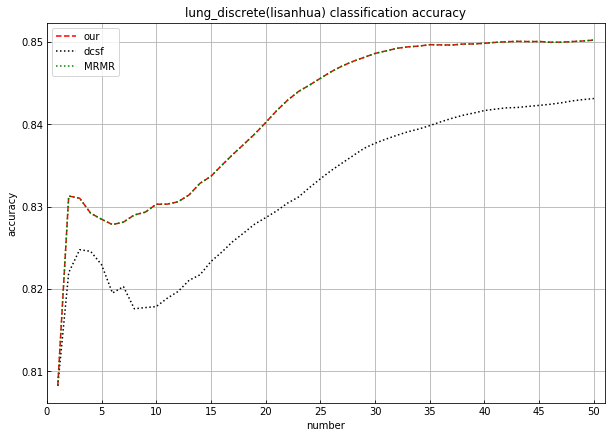

In [3]:
    plt.figure(figsize=(10,7))
    plt.rcParams['xtick.direction'] = 'in'
    plt.rcParams['ytick.direction'] = 'in'
    IWFS =  [0.43059800907626994, 0.4579270970575318, 0.48391701696049516, 0.4993488717401761, 0.5303951941778028, 0.5539994492893042, 0.5702158377624215, 0.5847343125875735, 0.5946824932090632]
    
    
    DRJMIM =[0.8081956641453736, 0.8219697804927899, 0.8247520551115716, 0.824560988688547, 0.8229314625586627, 0.8194908456603157, 0.8202711392768016, 0.8175795834638572, 0.817722017009234, 0.8178436085607509, 0.8188520631562869, 0.8196830677397531, 0.8210333262806437, 0.8217068374979076, 0.8233152496257271, 0.8244741345361893, 0.8257532092827089, 0.8267913830891234, 0.8278641661589512, 0.8286443285263336, 0.8294618149785862, 0.8304114318861655, 0.8311485499435286, 0.8322943313765249, 0.8333607274886612, 0.8343801617692843, 0.8352905058681415, 0.8361831391429807, 0.8370730364347998, 0.8376878853990005, 0.8381897617944447, 0.8386566051247779, 0.8390791216192172, 0.83941669619758, 0.8398312324495911, 0.8402849472466425, 0.8407049278207901, 0.8410769293686639, 0.8413512546155643, 0.8416610401015542, 0.8418311086215579, 0.841984078979208, 0.8420305017732614, 0.8421633537291738, 0.8422852544690135, 0.8424183105038971, 0.8425948664701317, 0.8428263604058185, 0.8429865696825782, 0.84311689370339]
    
    a =29
    print(DRJMIM[a])
    print("MAX:",max(DRJMIM))
    
    
    our = [0.8081956641453736, 0.8312736797751226, 0.8310097944254213, 0.8291922313201667, 0.828457397483382, 0.827802668065275, 0.8281026144011336, 0.8289758965745324, 0.8293137980949534, 0.8302777150492248, 0.8302889186909003, 0.8305763877700302, 0.831405891269269, 0.8328208130633152, 0.8336686042748843, 0.8350211022659533, 0.8363265961264339, 0.8375522835189452, 0.8388104768383742, 0.8401927737159147, 0.8416362309269663, 0.8429089606366236, 0.843972530510521, 0.844746905622308, 0.8455728822491523, 0.8463816466288034, 0.8470758436821452, 0.8476406719478106, 0.8481195779136144, 0.8485993814920038, 0.8489041534383176, 0.8492183668307458, 0.8493952814552183, 0.8494883392999978, 0.8496614496901809, 0.849635961336123, 0.8496118662423481, 0.8497343261514393, 0.8497496708945542, 0.8498266194245095, 0.8499431819337722, 0.8500173043280995, 0.8500668588349585, 0.8500375984216744, 0.8500483998299087, 0.849962437546171, 0.8499639905375177, 0.8500387615068966, 0.8501073943121504, 0.8502195066274814]
    
    
    print(our[a])
    print("MAX:",max(our))
    
    
    MRMR =  [0.8081956641453736, 0.8312736797751226, 0.8310097944254213, 0.8291922313201667, 0.828457397483382, 0.827802668065275, 0.8281026144011336, 0.8289758965745324, 0.8293137980949534, 0.8302777150492248, 0.8302889186909003, 0.8305763877700302, 0.831405891269269, 0.8328208130633152, 0.8336686042748843, 0.8350211022659533, 0.8363265961264339, 0.8375522835189452, 0.8388104768383742, 0.8401927737159147, 0.8416362309269663, 0.8429089606366236, 0.843972530510521, 0.844746905622308, 0.8455728822491523, 0.8463816466288034, 0.8470758436821452, 0.8476406719478106, 0.8481195779136144, 0.8485993814920038, 0.8489041534383176, 0.8492183668307458, 0.8493952814552183, 0.8494883392999978, 0.8496614496901809, 0.849635961336123, 0.8496118662423481, 0.8497343261514393, 0.8497496708945542, 0.8498266194245095, 0.8499431819337722, 0.8500173043280995, 0.8500668588349585, 0.8500375984216744, 0.8500483998299087, 0.849962437546171, 0.8499639905375177, 0.8500387615068966, 0.8501073943121504, 0.8502195066274814]
    
    print(MRMR[a])   
    print("MAX:",max(MRMR))
 
  
    feature_numbers = [i+1 for i in range(len(our))]
    
    #b_number = [i for i in range(len(DJMIM))]
    #plt.plot(feature_numbers,RMIFS ,'r-',label="RMIFS")
    plt.plot(feature_numbers,our,'r--',label="our")
    plt.plot(feature_numbers,DRJMIM ,':',color = 'black',label="dcsf")#marker设置标记形状
   # plt.plot(feature_numbers2,IWFS,'b-.',label="iWFS-PRO")
    plt.xlim(0, len(our)+1)
    plt.plot(feature_numbers,MRMR,':',color = 'green',label = "MRMR")
    plt.title("lung_discrete(lisanhua) classification accuracy")
    plt.legend()
#     plt.axis('off')

    #plt.ylim([0.8,1.0])
    ax=plt.gca()  #gca:get current axis得到当前轴
#设置图片的右边框和上边框为不显示
    #ax.spines['right'].set_color('none')#去掉右边框
    #ax.spines['top'].set_color('none')#去掉上边框
    plt.ylabel('accuracy')
    plt.xlabel("number")
    my_x_ticks = np.arange(0, len(our)+1,5)
    plt.xticks(my_x_ticks)
    plt.grid(1)#显示网格线 1=True=默认显示；0=False=不显示
    plt.show()

In [ ]:
    plt.figure(figsize=(10,7))
    plt.rcParams['xtick.direction'] = 'in'
    plt.rcParams['ytick.direction'] = 'in'
    IWFS = [0.1075, 0.17124999999999999, 0.23388888888888892, 0.2714583333333333, 0.2836666666666667, 0.2906944444444444, 0.2955952380952381, 0.2991666666666667, 0.3009259259259259, 0.30525, 0.31037878787878787, 0.31493055555555555, 0.31916666666666665, 0.3225, 0.3262777777777777, 0.33130208333333333, 0.33666666666666667, 0.3413425925925926, 0.34614035087719297, 0.3509166666666667, 0.3551190476190476, 0.3594318181818182, 0.36384057971014494, 0.36781250000000004, 0.37156666666666666, 0.37500000000000006, 0.3777160493827161, 0.38080357142857135, 0.38353448275862073, 0.3859722222222222, 0.3883870967741936, 0.3910677083333334, 0.39396464646464646, 0.39666666666666667, 0.39947619047619054, 0.40217592592592594, 0.4049099099099099, 0.4074780701754386, 0.4102136752136752, 0.4128958333333333, 0.41528455284552845, 0.4174404761904762, 0.41988372093023246, 0.4222727272727273, 0.424462962962963, 0.42659420289855077, 0.42867021276595746, 0.43062500000000004, 0.43251700680272115, 0.43439999999999995]

    
    DRJMIM = [0.296875, 0.41337499999999994, 0.4944166666666667, 0.559625, 0.6086750000000001, 0.6478541666666666, 0.6766607142857142, 0.700390625, 0.7208333333333332, 0.7378625, 0.7537954545454546, 0.7674687499999999, 0.7793846153846155, 0.7898214285714286, 0.7989833333333334, 0.8070234375, 0.8141397058823528, 0.8205902777777778, 0.8265526315789474, 0.8319999999999999, 0.8369166666666668, 0.8414545454545455, 0.8455978260869567, 0.8493437500000001, 0.852785, 0.8560336538461538, 0.8591111111111112, 0.8620000000000001, 0.8646637931034483, 0.8672208333333334, 0.8695725806451614, 0.8717539062499999, 0.8738143939393939, 0.8757499999999999, 0.8775250000000001, 0.8792222222222221, 0.8808310810810811, 0.8823124999999999, 0.8837564102564103, 0.885153125, 0.886530487804878, 0.8878095238095238, 0.8890377906976744, 0.8901647727272728, 0.891263888888889, 0.8923152173913043, 0.8933085106382979, 0.8942682291666667, 0.8951938775510204, 0.8960700000000001]

    
    #print(DRJMIM[29])
    print("MAX:",max(DRJMIM))
    
    
    our =  [0.296875, 0.40218750000000003, 0.48037499999999994, 0.5429375, 0.591575, 0.6321666666666668, 0.6658035714285715, 0.6917968749999999, 0.7134583333333333, 0.7308375000000001, 0.745909090909091, 0.7588750000000001, 0.7701730769230769, 0.7801339285714285, 0.7890833333333332, 0.7972734375, 0.8045294117647058, 0.8112222222222222, 0.8173289473684211, 0.82289375, 0.8281666666666667, 0.8329204545454546, 0.8375, 0.8416874999999999, 0.84552, 0.8490048076923077, 0.8522407407407407, 0.8553169642857142, 0.8582241379310345, 0.8609125, 0.8634112903225807, 0.86581640625, 0.8680871212121212, 0.8702058823529412, 0.8722857142857143, 0.87425, 0.8761182432432433, 0.8779111842105263, 0.8794871794871796, 0.8809843749999999, 0.8824115853658537, 0.8837886904761905, 0.8850959302325583, 0.8863210227272726, 0.8874694444444444, 0.8885624999999999, 0.8896037234042553, 0.8906276041666668, 0.8915867346938775, 0.8924924999999999]

    
    #print(our[29])
    print("MAX:",max(our))
    
    
    MRMR =  [0.296875, 0.40218750000000003, 0.48037499999999994, 0.5429375, 0.591575, 0.6321666666666668, 0.6658035714285715, 0.6917968749999999, 0.7134583333333333, 0.7308375000000001, 0.745909090909091, 0.7588750000000001, 0.7701730769230769, 0.7801339285714285, 0.7890833333333332, 0.7972734375, 0.8045294117647058, 0.8112222222222222, 0.8173289473684211, 0.82289375, 0.8281666666666667, 0.8329204545454546, 0.8375, 0.8416874999999999, 0.84552, 0.8490048076923077, 0.8522407407407407, 0.8553169642857142, 0.8582241379310345, 0.8609125, 0.8634112903225807, 0.86581640625, 0.8680871212121212, 0.8702058823529412, 0.8722857142857143, 0.87425, 0.8761182432432433, 0.8779111842105263, 0.8794871794871796, 0.8809843749999999, 0.8824115853658537, 0.8837886904761905, 0.8850959302325583, 0.8863210227272726, 0.8874694444444444, 0.8885624999999999, 0.8896037234042553, 0.8906276041666668, 0.8915867346938775, 0.8924924999999999]

    
    
    #print(MRMR[29])   
    print("MAX:",max(MRMR))
 
    feature_numbers = [i+1 for i in range(len(our))]
    #b_number = [i for i in range(len(DJMIM))]
    #plt.plot(feature_numbers,RMIFS ,'r-',label="RMIFS")
    plt.plot(feature_numbers,our,'r--',label="our")
    plt.plot(feature_numbers,DRJMIM ,':',color = 'black',label="mrmd")#marker设置标记形状
   # plt.plot(feature_numbers2,IWFS,'b-.',label="iWFS-PRO")
    plt.xlim(0, len(our)+1)
    plt.plot(feature_numbers,MRMR,':',color = 'green',label = "mrmr")
    plt.title("lung_discrete(lisanhua) classification accuracy")
    plt.legend()
#     plt.axis('off')

    #plt.ylim([0.8,1.0])
    ax=plt.gca()  #gca:get current axis得到当前轴
#设置图片的右边框和上边框为不显示
    #ax.spines['right'].set_color('none')#去掉右边框
    #ax.spines['top'].set_color('none')#去掉上边框
    plt.ylabel('accuracy')
    plt.xlabel("number")
    my_x_ticks = np.arange(0, len(our)+1,5)
    plt.xticks(my_x_ticks)
    plt.grid(1)#显示网格线 1=True=默认显示；0=False=不显示
    plt.show()

In [ ]:
adult_data = pd.read_csv("D:/data/data1.csv")
adult_data = np.array(adult_data)
print(adult_data)
print(adult_data.shape)
print(adult_data[:,0])

In [ ]:
    plt.figure()
    plt.rcParams['xtick.direction'] = 'in'
    plt.rcParams['ytick.direction'] = 'in'
    plt.tick_params(top='on', right='on', which='both') 
    RMIFS = adult_data[:,0]
    MRMR = adult_data[:,1]
    MIFS = adult_data[:,2]  
    CMIFS = adult_data[:,3]

    
    feature_numbers = [i+1 for i in range(len(MRMR))]
    #feature_number_own = [i for i in range(len(RMIFS_1))]
    plt.plot(feature_numbers,RMIFS  ,'r-',label="RMIFS")
    plt.plot(feature_numbers,MRMR,'g--',label="MRMR")
    plt.plot(feature_numbers,MIFS ,'b:',label="MIFS")#marker设置标记形状
    plt.plot(feature_numbers,CMIFS,'k-.',label="CMIFS")
    #plt.plot(feature_number_own,NSBS,':',color = 'black',label = "NSBS")
    plt.title("warpAR10P classification accuracy")
    plt.legend(loc='lower right')
    plt.xlim(0, len(MRMR)+1)
    #plt.legend( )
    # plt.axis('off')
    #plt.ylim([0.8,1.0])
    ax=plt.gca()  #gca:get current axis得到当前轴
#设置图片的右边框和上边框为不显示
    #ax.spines['right'].set_color('none')#去掉右边框
    #ax.spines['top'].set_color('none')#去掉上边框
    plt.ylabel('accuracy')
    plt.xlabel("number of features")
    my_x_ticks = np.arange(0, len(MRMR)+1, 5)
    #my_y_ticks = np.arange(-2, 2, 0.3)
    plt.xticks(my_x_ticks)
    #plt.yticks(my_y_ticks)

    plt.grid(0)#显示网格线 1=True=默认显示；0=False=不显示
    plt.show()

In [ ]:
    plt.figure(figsize=(10,7))
    plt.rcParams['xtick.direction'] = 'in'
    plt.rcParams['ytick.direction'] = 'in'
    plt.tick_params(top='on', right='on', which='both') 
    DRMRMR = [0.2031666666666667, 0.2725, 0.34577777777777774, 0.39966666666666667, 0.43760000000000004, 
0.46930555555555564, 0.4951428571428571, 0.5139791666666667, 0.5297407407407407, 0.5446166666666667, 
0.5571212121212121, 0.5676388888888889, 0.5768846153846154, 0.5857499999999999, 0.5935333333333332, 
0.60053125, 0.6076176470588235, 0.6138425925925927, 0.6197105263157895, 0.6251416666666666, 
0.6300396825396826, 0.6344318181818182, 0.6387463768115942, 0.6427083333333333, 0.6463733333333334, 
0.6499679487179487, 0.6530864197530865, 0.656077380952381, 0.6589252873563218, 0.6615388888888889,
 0.6639623655913979, 0.666265625, 0.6683989898989898, 0.670343137254902, 0.672252380952381,
 0.674125, 0.6758558558558558, 0.6774868421052632, 0.678982905982906, 0.6803333333333333, 
0.6816341463414634, 0.6827738095238095, 0.6838410852713177, 0.6848181818181818, 0.6857814814814814,
 0.6867500000000001, 0.6877517730496455]
    DRJMIM = [0.2031666666666667, 0.24875000000000003, 0.2758333333333333, 0.31470833333333337, 0.3530333333333333, 
0.38225000000000003, 0.40211904761904765, 0.4232291666666666, 0.44218518518518524, 0.46018333333333333,
 0.47563636363636363, 0.4885555555555556, 0.5003589743589744, 0.510702380952381, 0.5212555555555555, 
0.5307708333333333, 0.539607843137255, 0.5479537037037037, 0.5559649122807019, 0.5633333333333334, 
0.5700396825396825, 0.5760984848484848, 0.5818985507246376, 0.5873750000000001, 0.5926133333333333, 
0.5975769230769231, 0.6019382716049383, 0.6060297619047619, 0.609764367816092, 0.6134888888888889, 
0.6169354838709677, 0.6200104166666667, 0.6227979797979798, 0.6257843137254903, 0.6285571428571428,
 0.6312546296296295, 0.633891891891892, 0.636328947368421, 0.6387051282051281, 0.6410375,
 0.6432560975609757, 0.6453928571428572, 0.6473992248062016, 0.6493977272727273, 0.6513111111111111, 
0.6531521739130435, 0.6548581560283688]
    IWFS = [0.2031666666666667, 0.25575, 0.2785555555555555, 0.29420833333333335, 0.30390000000000006, 
0.3226388888888889, 0.3431904761904761, 0.36697916666666663, 0.3878333333333333, 0.40628333333333333, 
0.4205454545454545, 0.43254166666666666, 0.4453205128205127, 0.4566190476190477, 0.4667333333333333, 
0.4767916666666667, 0.4883431372549019, 0.49909259259259264, 0.5087631578947368, 0.5173666666666666, 
0.5261269841269841, 0.5340833333333334, 0.541340579710145, 0.5480416666666668, 0.5542333333333335,
 0.5601217948717948, 0.5655123456790124, 0.5704345238095239, 0.5753103448275861, 0.5799166666666665, 
0.5842043010752689, 0.5881822916666666, 0.5919343434343434, 0.5960882352941178, 0.6001857142857143, 
0.6039675925925926, 0.6075405405405405, 0.6108508771929825, 0.613931623931624, 0.6167166666666667, 
0.6194349593495936, 0.6220515873015873, 0.6245581395348837, 0.626901515151515, 0.6291037037037037,
 0.6312717391304347, 0.6334397163120569]  
    DWFS = [0.2031666666666667, 0.27925, 0.3487777777777778, 0.39266666666666666, 0.4218,
 0.4485277777777778, 0.4666666666666666, 0.4806458333333334, 0.4918703703703704, 0.5020666666666667,
 0.5104242424242424, 0.5177638888888888, 0.5257820512820514, 0.5335357142857143, 0.5406888888888889, 
0.5485416666666667, 0.5562745098039216, 0.5630555555555555, 0.5703333333333334, 0.5768833333333333,
 0.5828174603174604, 0.5882045454545456, 0.593123188405797, 0.5976527777777778, 0.6019199999999999, 
0.605826923076923, 0.609648148148148, 0.6132083333333332, 0.616735632183908, 0.6199166666666667, 
0.6234731182795699, 0.6268958333333333, 0.6301515151515152, 0.633357843137255, 0.6362809523809524, 
0.6390277777777778, 0.6415090090090091, 0.643719298245614, 0.6458376068376069, 0.6478708333333333,
 0.6498455284552845, 0.6517420634920635, 0.6535348837209302, 0.6552045454545455, 0.6567925925925926,
 0.6583731884057972, 0.6599751773049646]
    MRMR = [0.2031666666666667, 0.2725, 0.34577777777777774, 0.39966666666666667, 0.43370000000000003, 
0.4600833333333334, 0.48378571428571426, 0.502125, 0.5170370370370372, 0.5300166666666666, 
0.5412272727272728, 0.5518055555555555, 0.5625897435897436, 0.5718690476190477, 0.5807666666666665, 
0.5885520833333334, 0.595343137254902, 0.6013703703703704, 0.6068684210526317, 0.6116250000000001,
 0.616031746031746, 0.6204469696969698, 0.624391304347826, 0.6279861111111111, 0.6314266666666667,
 0.6353205128205129, 0.6389444444444444, 0.6422797619047619, 0.6455114942528736, 0.6484166666666668,
 0.6510752688172045, 0.6536875000000001, 0.6561666666666667, 0.6585196078431372, 0.6606809523809525, 
0.6627361111111111, 0.6646756756756756, 0.6664692982456141, 0.6681837606837607, 0.6697333333333333,
 0.6712642276422764, 0.6726388888888888, 0.6739767441860466, 0.6751818181818181, 0.6763666666666666, 
0.677536231884058, 0.6787304964539006]
    
    feature_numbers = [i+1 for i in range(len(MRMR))]
    #feature_number_own = [i for i in range(len(RMIFS_1))]
    plt.plot(feature_numbers,DRMRMR  ,'bs-',label="DIMRMR")
    plt.plot(feature_numbers,MRMR,'g*-',label="MRMR")
    plt.plot(feature_numbers,DWFS ,'c^-',label="DWFS")#marker设置标记形状
    plt.plot(feature_numbers,IWFS,'rv-',label="IWFS")
    plt.plot(feature_numbers,DRJMIM,'m+-',label = "DRJMIM")
    plt.title("Multi-feature zer classification accuracy")
 
    plt.legend(loc='lower right')
    plt.xlim(0, len(MRMR)+1)
    #plt.legend( )
    # plt.axis('off')
    #plt.ylim([0.8,1.0])
    ax=plt.gca()  #gca:get current axis得到当前轴
#设置图片的右边框和上边框为不显示
    #ax.spines['right'].set_color('none')#去掉右边框
    #ax.spines['top'].set_color('none')#去掉上边框
    plt.ylabel('accuracy')
    plt.xlabel("number of features")
    my_x_ticks = np.arange(0, len(MRMR)+1, 5)
    #new_ticks = np.linspace(0, len(MRMR), )
    #plt.xticks(new_ticks)
    #my_y_ticks = np.arange(-2, 2, 0.3)
    plt.xticks(my_x_ticks)
    #plt.yticks(my_y_ticks)

    plt.grid(0)#显示网格线 1=True=默认显示；0=False=不显示
    plt.show()

In [ ]:
    plt.figure(figsize=(10,7))
    plt.rcParams['xtick.direction'] = 'in'
    plt.rcParams['ytick.direction'] = 'in'
    plt.tick_params(top='on', right='on', which='both') 
    DRMRMR = [0.15483333333333335, 0.23708333333333334, 0.3157777777777779, 0.37470833333333337, 0.43100000000000005, 
0.47727777777777775, 0.5213095238095238, 0.5588125, 0.5895, 0.6157, 
0.638439393939394, 0.6578749999999999, 0.674525641025641, 0.6895119047619048, 0.7023, 
0.7134375000000001, 0.7233529411764706, 0.7324537037037038, 0.7405, 0.747725, 
0.7545396825396825, 0.7609166666666666, 0.766963768115942, 0.7724652777777777, 0.77752, 
0.782198717948718, 0.786611111111111, 0.7907678571428572, 0.7946724137931035, 0.7984611111111111, 
0.8020268817204301, 0.8053541666666666, 0.8084545454545454, 0.8113970588235294, 0.8141095238095238, 
0.8166666666666668, 0.8190720720720721, 0.8214342105263158, 0.8235940170940171, 0.8256874999999999, 
0.8276341463414635, 0.8294563492063493, 0.8313217054263565, 0.8330568181818182, 0.8347222222222223, 
0.8363115942028986, 0.8378758865248227, 0.8393576388888889, 0.8407789115646259, 0.8421499999999998]
    
    DRJMIM = [0.15483333333333335, 0.18775, 0.2591666666666667, 0.30233333333333334, 0.33516666666666667, 
0.3609166666666666, 0.38576190476190475, 0.41706249999999995, 0.44333333333333336, 0.46961666666666674,
 0.4905151515151515, 0.5090694444444445, 0.5265384615384615, 0.5446309523809524, 0.5614222222222223, 
0.577375, 0.5924803921568627, 0.605851851851852, 0.6182894736842105, 0.6300166666666667,
 0.6406269841269842, 0.6507424242424241, 0.6599492753623188, 0.6686527777777777, 0.67654, 
0.684301282051282, 0.6915987654320989, 0.698327380952381, 0.7047183908045977, 0.7107111111111112,
 0.7164139784946237, 0.7219739583333333, 0.7271767676767676, 0.7320392156862745, 0.7365380952380952,
 0.7408287037037037, 0.7449324324324325, 0.7488157894736842, 0.7525000000000001, 0.7559833333333333,
 0.7593333333333332, 0.762547619047619, 0.7655891472868218, 0.7684962121212121, 0.7714037037037036, 
0.7741376811594202, 0.776790780141844, 0.7793854166666666, 0.7819693877551019, 0.7844466666666667]
    
    IWFS = [0.15483333333333335, 0.16166666666666665, 0.17433333333333334, 0.18525, 0.19636666666666666, 
0.2088888888888889, 0.21861904761904763, 0.2268541666666667, 0.23803703703703705, 0.24830000000000005,
 0.26146969696969696, 0.27547222222222223, 0.2880897435897436, 0.29964285714285716, 0.3106222222222222,
 0.32076041666666666, 0.32973529411764707, 0.33775925925925926, 0.35167543859649125, 0.3651416666666667,
 0.37750793650793657, 0.3889545454545454, 0.3989855072463768, 0.4084027777777777, 0.4172200000000001, 
0.4255448717948718, 0.4334567901234568, 0.4410892857142857, 0.44891379310344837, 0.4564333333333333, 
0.46354301075268817, 0.47099479166666663, 0.4785151515151515, 0.48583333333333334, 0.49342380952380954,
 0.5006203703703703, 0.50759009009009, 0.5142850877192983, 0.5207222222222222, 0.5268416666666668, 
0.5327113821138211, 0.5384246031746032, 0.5439612403100775, 0.54925, 0.5544851851851852, 
0.5596702898550724, 0.5650460992907801, 0.5705173611111111, 0.5759795918367346, 0.5813466666666667]
    
    DWFS = [0.15483333333333335, 0.23708333333333334, 0.2851666666666667, 0.3168333333333333, 0.3411, 
0.3594444444444444, 0.3755714285714286, 0.3884375, 0.39924074074074073, 0.40778333333333333,
 0.4161363636363637, 0.4258055555555555, 0.4335641025641026, 0.44158333333333327, 0.4542111111111111,
 0.46552083333333333, 0.47575490196078435, 0.4852222222222222, 0.49552631578947376, 0.5046916666666666, 
0.5133571428571428, 0.5213333333333333, 0.5294420289855073, 0.5369027777777777, 0.5439666666666666,
 0.5505064102564103, 0.5568086419753087, 0.5625535714285714, 0.5681206896551724, 0.5735555555555556, 
0.5790591397849462, 0.5841458333333334, 0.5890606060606061, 0.5937794117647059, 0.5982619047619048, 
0.6037407407407408, 0.6090585585585586, 0.6141228070175438, 0.6189102564102563, 0.6234708333333333, 
0.6279634146341464, 0.6323095238095239, 0.6364302325581396, 0.6408598484848486, 0.6451111111111111,
 0.6492210144927536, 0.6531205673758865, 0.6568784722222222, 0.6608877551020408, 0.66477]
    
    MRMR = [0.15483333333333335, 0.23708333333333334, 0.3157777777777779, 0.37470833333333337, 0.43100000000000005,
 0.47291666666666665, 0.5071666666666667, 0.5326249999999999, 0.5607592592592593, 0.5833166666666667, 
0.6018636363636363, 0.6185555555555555, 0.6328333333333332, 0.6449999999999999, 0.6559222222222222, 
0.6669375000000001, 0.6770882352941178, 0.6874351851851852, 0.6966842105263158, 0.70505, 
0.7126190476190476, 0.7197121212121212, 0.7263623188405797, 0.7324305555555556, 0.7379333333333333,
 0.7429807692307692, 0.747895061728395, 0.7526488095238095, 0.7570747126436782, 0.7612166666666668,
 0.7650645161290323, 0.76878125, 0.7722222222222221, 0.7754705882352941, 0.7787142857142858, 
0.7817638888888889, 0.7848018018018017, 0.7877280701754387, 0.7905982905982906, 0.7933083333333334,
 0.7958414634146341, 0.7982539682539683, 0.8005658914728682, 0.8028030303030304, 0.8049481481481481, 
0.8070362318840582, 0.8090390070921986, 0.810954861111111, 0.8128333333333333, 0.8145866666666667]
    
    feature_numbers = [i+1 for i in range(len(MRMR))]
    #feature_number_own = [i for i in range(len(RMIFS_1))]
    plt.plot(feature_numbers,DRMRMR  ,'bs-',label="DIMRMR")
    plt.plot(feature_numbers,MRMR,'g*-',label="MRMR")
    plt.plot(feature_numbers,DWFS ,'c^-',label="DWFS")#marker设置标记形状
    plt.plot(feature_numbers,IWFS,'rv-',label="IWFS")
    plt.plot(feature_numbers,DRJMIM,'m+-',label = "DRJMIM")
    plt.title("Multi-feature pixel classification accuracy")
    plt.legend(loc='lower right')
    plt.xlim(0, len(MRMR)+1)    
    #plt.legend( )
    # plt.axis('off')
    #plt.ylim([0.8,1.0])
    ax=plt.gca()  #gca:get current axis得到当前轴
#设置图片的右边框和上边框为不显示
    #ax.spines['right'].set_color('none')#去掉右边框
    #ax.spines['top'].set_color('none')#去掉上边框
    plt.ylabel('accuracy')
    plt.xlabel("number of features")
    #plt.xlim(0,len(MRMR)+1)
    my_x_ticks = np.arange(0, len(MRMR)+1, 5)
    #new_ticks = np.linspace(1, len(MRMR),5)
    #plt.xticks(new_ticks)
    #my_y_ticks = np.arange(-2, 2, 0.3)
    plt.xticks(my_x_ticks)
    #plt.yticks(my_y_ticks)

    plt.grid(0)#显示网格线 1=True=默认显示；0=False=不显示
    plt.show()

In [ ]:
    plt.figure(figsize=(10,7))
    plt.rcParams['xtick.direction'] = 'in'
    plt.rcParams['ytick.direction'] = 'in'
    plt.tick_params(top='on', right='on', which='both') 
    DRMRMR = [0.1075, 0.19458333333333333, 0.2525, 0.30125, 0.336, 
0.35944444444444446, 0.37749999999999995, 0.3943750000000001, 0.4093518518518519, 0.42191666666666666,
 0.43280303030303036, 0.44083333333333335, 0.4495512820512821, 0.45690476190476187, 0.4634444444444445, 
0.46875, 0.47308823529411764, 0.4767129629629629, 0.48061403508771927, 0.48449999999999993, 
0.4882142857142857, 0.49223484848484844, 0.4964492753623189, 0.5004166666666666, 0.5039999999999999,
 0.5074358974358976, 0.5104629629629629, 0.5138392857142857, 0.5170689655172414, 0.5203055555555556, 
0.5233870967741935, 0.5264583333333334, 0.5292171717171718, 0.5318137254901961, 0.5342142857142856, 
0.5369675925925925, 0.5398198198198197, 0.5424561403508772, 0.5447222222222222, 0.5469166666666667, 
0.5492886178861789, 0.5516071428571429, 0.5537790697674418, 0.5558901515151514, 0.5579074074074074,
 0.5598550724637681, 0.5617730496453901, 0.5637500000000001, 0.5655612244897958, 0.5672999999999999]
    
    DRJMIM =[0.1075, 0.18625, 0.24583333333333332, 0.2839583333333333, 0.3085, 0.32499999999999996, 0.33595238095238095, 
0.3440625, 0.3541666666666667, 0.3615, 0.36659090909090913, 0.3715972222222222, 0.37724358974358974, 0.3830357142857143,
 0.38761111111111113, 0.39234375, 0.39666666666666667, 0.4018055555555556, 0.40679824561403505, 0.41195833333333326,
 0.4169444444444444, 0.4217424242424242, 0.4265217391304348, 0.43118055555555546, 0.43570000000000003, 
0.4399038461538461, 0.44373456790123456, 0.44752976190476185, 0.4511494252873563, 0.45422222222222225,
 0.45712365591397847, 0.45976562499999996, 0.4625757575757576, 0.4654901960784314, 0.46849999999999997,
 0.47118055555555555, 0.47369369369369374, 0.4763157894736842, 0.4789743589743589, 0.4818333333333333, 
0.48457317073170736, 0.4870833333333333, 0.48947674418604653, 0.49181818181818177, 0.49407407407407405,
 0.49641304347826076, 0.4985283687943262, 0.5005208333333333, 0.5025, 0.5044]
    
    IWFS = [0.1075, 0.17124999999999999, 0.23388888888888892, 0.2714583333333333, 0.2836666666666667,
 0.2906944444444444, 0.2955952380952381, 0.2991666666666667, 0.3009259259259259, 0.30525, 
0.31037878787878787, 0.31493055555555555, 0.31916666666666665, 0.3225, 0.3262777777777777, 
0.33130208333333333, 0.33666666666666667, 0.3413425925925926, 0.34614035087719297, 0.3509166666666667,
 0.3551190476190476, 0.3594318181818182, 0.36384057971014494, 0.36781250000000004, 0.37156666666666666,
 0.37500000000000006, 0.3777160493827161, 0.38080357142857135, 0.38353448275862073, 0.3859722222222222,
 0.3883870967741936, 0.3910677083333334, 0.39396464646464646, 0.39666666666666667, 0.39947619047619054,
 0.40217592592592594, 0.4049099099099099, 0.4074780701754386, 0.4102136752136752, 0.4128958333333333, 
0.41528455284552845, 0.4174404761904762, 0.41988372093023246, 0.4222727272727273, 0.424462962962963, 
0.42659420289855077, 0.42867021276595746, 0.43062500000000004, 0.43251700680272115, 0.43439999999999995]
    
    DWFS = [0.1075, 0.15625, 0.20305555555555554, 0.25229166666666664, 0.2924999999999999, 0.31736111111111115, 
0.33583333333333326, 0.35114583333333327, 0.36481481481481487, 0.3765833333333333, 0.3867424242424242, 
0.3963888888888889, 0.4046153846153846, 0.41148809523809526, 0.41805555555555557, 0.4239583333333334, 
0.42848039215686273, 0.43351851851851847, 0.43758771929824564, 0.4420833333333334, 0.44595238095238104, 
0.44962121212121203, 0.4534057971014493, 0.4570833333333333, 0.46049999999999996, 0.46342948717948723, 
0.4662037037037037, 0.46872023809523816, 0.4713218390804597, 0.47397222222222224, 0.47642473118279566, 
0.4785677083333333, 0.48060606060606065, 0.48257352941176473, 0.48464285714285715, 0.4865277777777777,
 0.48864864864864876, 0.4907236842105264, 0.4927136752136752, 0.49472916666666666, 0.4965040650406504, 
0.4983928571428571, 0.5000775193798449, 0.5017613636363637, 0.5034074074074074, 0.5048550724637682,
 0.5062234042553192, 0.5074826388888888, 0.5087755102040816, 0.5100166666666667]
    
    MRMR = [0.1075, 0.19458333333333333, 0.2525, 0.30125, 0.336, 
0.35944444444444446, 0.3765476190476191, 0.39208333333333334, 0.40574074074074074, 0.41724999999999995,
 0.42810606060606066, 0.4369444444444444, 0.44493589743589745, 0.45202380952380955, 0.45905555555555555,
 0.46588541666666666, 0.4718627450980392, 0.47699074074074077, 0.4810526315789474, 0.4848333333333333, 
0.4887301587301587, 0.49234848484848487, 0.49576086956521737, 0.4991666666666666, 0.5024666666666666, 
0.5056410256410256, 0.5085802469135804, 0.5111607142857143, 0.5136494252873564, 0.5161944444444445, 
0.5185215053763441, 0.5208333333333334, 0.5228282828282828, 0.5247549019607843, 0.5265, 
0.5283564814814815, 0.5301576576576577, 0.5320833333333334, 0.533888888888889, 0.5356458333333333, 
0.5374186991869918, 0.5390873015873016, 0.5408333333333332, 0.5425378787878788, 0.5446296296296297,
 0.5465398550724637, 0.5485283687943262, 0.5506944444444444, 0.5528061224489796, 0.5548833333333333]
    
    font1 = { 'weight' : 'normal','size' : 20,}
    plt.tick_params(labelsize=15)#设置坐标刻度值的大小以及刻度值的字体
    feature_numbers = [i+1 for i in range(len(MRMR))]
    #feature_number_own = [i for i in range(len(RMIFS_1))]
    plt.plot(feature_numbers,DRMRMR,'bs-',label="DIMRMR")
    plt.plot(feature_numbers,MRMR,'g*-',label="MRMR")
    plt.plot(feature_numbers,DWFS ,'c^-',label="DWFS")#marker设置标记形状
    plt.plot(feature_numbers,IWFS,'rv-',label="IWFS")
    plt.plot(feature_numbers,DRJMIM,'m+-',label = "DRJMIM")
    #plt.title("ORL",font1)
    plt.legend(loc='lower right')
    leg = plt.gca().get_legend() #或leg=ax.get_legend()
    ltext = leg.get_texts()
    plt.setp(ltext, fontsize=15) 
    plt.xlim(0, len(MRMR)+1)
    #plt.legend( )
    # plt.axis('off')
    #plt.ylim([0.8,1.0])
    ax=plt.gca()  #gca:get current axis得到当前轴
#设置图片的右边框和上边框为不显示
    #ax.spines['right'].set_color('none')#去掉右边框
    #ax.spines['top'].set_color('none')#去掉上边框
    plt.ylabel('accuracy',font1)
    plt.xlabel("number of features",font1)
    my_x_ticks = np.arange(0, len(MRMR)+1, 5)
    #my_y_ticks = np.arange(-2, 2, 0.3)
    plt.xticks(my_x_ticks)
    #plt.yticks(my_y_ticks)

    plt.grid(0)#显示网格线 1=True=默认显示；0=False=不显示
    plt.show()

In [ ]:
    plt.figure(figsize=(10,7))
    plt.rcParams['xtick.direction'] = 'in'
    plt.rcParams['ytick.direction'] = 'in'
    plt.tick_params(top='on', right='on', which='both') 
    DRMRMR = [0.26499999999999996, 0.38499999999999995, 0.47305555555555556, 0.541875, 0.5955,
 0.6389166666666667, 0.6727142857142856, 0.6984166666666667, 0.7189444444444444, 0.7368166666666666,
 0.7527575757575757, 0.766625, 0.7783461538461539, 0.7884880952380954, 0.7974444444444445, 
0.8049166666666666, 0.8116568627450981, 0.8177129629629629, 0.8231140350877194, 0.8280333333333333, 
0.8325079365079365, 0.8366287878787878, 0.8404927536231884, 0.8440208333333333, 0.84748,
 0.8505641025641025, 0.8534814814814814, 0.8561666666666667, 0.8587356321839081, 0.8611777777777778, 
0.863516129032258, 0.8657552083333333, 0.8678939393939394, 0.8699460784313725, 0.8718333333333333,
 0.8736388888888889, 0.8752882882882883, 0.8768333333333335, 0.8782692307692308, 0.8796875000000001, 
0.8810081300813009, 0.8822936507936509, 0.8835348837209303, 0.8846969696969698, 0.8858518518518519,
 0.8869927536231884, 0.8880638297872342, 0.8890659722222223, 0.8900612244897959, 0.8910633333333333]
    
    DRJMIM =[0.26499999999999996, 0.3908333333333333, 0.4793333333333334, 0.5475833333333333, 0.5971333333333334, 
0.6396944444444445, 0.6714761904761904, 0.6979583333333332, 0.7188333333333334, 0.7358333333333333, 
0.749939393939394, 0.7619861111111111, 0.7731410256410257, 0.7825119047619048, 0.7907888888888889, 
0.7980312500000001, 0.8046372549019608, 0.8101759259259259, 0.8150350877192981, 0.8193666666666667,
 0.823436507936508, 0.8270530303030302, 0.8306014492753624, 0.833861111111111, 0.8368466666666666, 
0.8396666666666667, 0.8422716049382717, 0.8447321428571429, 0.8470229885057471, 0.8491777777777778, 
0.8512419354838711, 0.8530885416666667, 0.854979797979798, 0.8567892156862746, 0.8584857142857142, 
0.8601620370370372, 0.8618153153153153, 0.8632850877192982, 0.86467094017094, 0.8659958333333333, 
0.8672967479674796, 0.8685238095238096, 0.8696744186046511, 0.8708068181818182, 0.8719, 0.8729528985507247,
 0.8739751773049645, 0.8750138888888889, 0.8760578231292517, 0.8770866666666667]
    
    IWFS = [0.26499999999999996, 0.3908333333333333, 0.4793333333333334, 0.5475833333333333, 0.6013333333333333, 
0.6429722222222223, 0.6742619047619046, 0.6996458333333333, 0.720888888888889, 0.73745, 
0.7513333333333335, 0.7638472222222222, 0.7742948717948718, 0.7829761904761905, 0.7908333333333334, 
0.7975625000000001, 0.8037058823529413, 0.8092962962962963, 0.814342105263158, 0.8188166666666667, 
0.8227222222222222, 0.8261969696969697, 0.8292101449275363, 0.8321319444444445, 0.8346666666666667, 
0.8370897435897436, 0.8392407407407408, 0.8412083333333333, 0.8430919540229885, 0.8448722222222221, 
0.8465537634408603, 0.8482135416666666, 0.8497929292929293, 0.8512745098039215, 0.8527714285714286, 
0.8541898148148147, 0.855581081081081, 0.8570087719298245, 0.8583247863247863, 0.8595875, 
0.8608414634146341, 0.8620555555555557, 0.8633372093023256, 0.8645871212121213, 0.8657814814814815,
 0.8668876811594203, 0.8679751773049645, 0.8690104166666668, 0.8700170068027212, 0.8709933333333333]
    
    
    DWFS = [0.26499999999999996, 0.3908333333333333, 0.4572222222222222, 0.515875, 0.5674999999999999, 
0.6109999999999999, 0.6455238095238095, 0.6729791666666666, 0.6941851851851851, 0.7104, 
0.7246666666666667, 0.7376944444444445, 0.7499615384615385, 0.7603214285714285, 0.7690999999999999, 
0.7778958333333333, 0.7855882352941177, 0.7928703703703702, 0.7995087719298245, 0.8059166666666666, 
0.8117380952380953, 0.8169469696969697, 0.821695652173913, 0.8260902777777778, 0.8302666666666667,
 0.834173076923077, 0.8378888888888888, 0.8412619047619048, 0.844448275862069, 0.8474555555555554, 
0.8503172043010753, 0.8529791666666666, 0.8554848484848486, 0.8578578431372549, 0.8600285714285714, 
0.8620648148148149, 0.8639504504504504, 0.8657236842105261, 0.8674017094017095, 0.8689958333333333, 
0.870520325203252, 0.8719484126984126, 0.8733178294573644, 0.8746477272727273, 0.8759185185185184, 
0.8771485507246376, 0.8783723404255319, 0.8795104166666666, 0.8805612244897959, 0.8815866666666666]
    
    
    MRMR =[0.26499999999999996, 0.38499999999999995, 0.47305555555555556, 0.541875, 0.5955, 
0.6366111111111111, 0.6679047619047619, 0.6943125, 0.7156666666666666, 0.7332166666666665, 
0.7480757575757576, 0.7608611111111111, 0.7716923076923076, 0.7812142857142855, 0.7894777777777778, 
0.7969270833333333, 0.8033725490196079, 0.8092314814814815, 0.8146228070175439, 0.8195250000000001, 
0.824063492063492, 0.8280454545454544, 0.831768115942029, 0.8352499999999999, 0.8389199999999999,
 0.8423525641025641, 0.8454999999999999, 0.8484226190476188, 0.8511896551724139, 0.8536944444444444, 
0.8559516129032257, 0.8580520833333333, 0.8603131313131313, 0.8624656862745098, 0.8644761904761905, 
0.8664351851851851, 0.8682522522522521, 0.8699956140350876, 0.8716196581196581, 0.8731749999999999, 
0.8746138211382114, 0.8760119047619046, 0.8773720930232557, 0.8786325757575756, 0.8798333333333334, 
0.8810072463768116, 0.8821241134751773, 0.8831284722222222, 0.884095238095238, 0.8850133333333333]
    
    font1 = { 'weight' : 'normal','size' : 20,}
    plt.tick_params(labelsize=15)#设置坐标刻度值的大小以及刻度值的字体
    feature_numbers = [i+1 for i in range(len(MRMR))]
    #feature_number_own = [i for i in range(len(RMIFS_1))]
    plt.plot(feature_numbers,DRMRMR,'bs-',label="DIMRMR")
    plt.plot(feature_numbers,MRMR,'g*-',label="MRMR")
    plt.plot(feature_numbers,DWFS ,'c^-',label="DWFS")#marker设置标记形状
    plt.plot(feature_numbers,IWFS,'rv-',label="IWFS")
    plt.plot(feature_numbers,DRJMIM,'m+-',label = "DRJMIM")
    #plt.title("Multi-feature factors",font1)
    plt.legend(loc='lower right')
    leg = plt.gca().get_legend() #或leg=ax.get_legend()
    ltext = leg.get_texts()
    plt.setp(ltext, fontsize=15) 
    plt.xlim(0, len(MRMR)+1)
    #plt.legend( )
    # plt.axis('off')
    #plt.ylim([0.8,1.0])
    ax=plt.gca()  #gca:get current axis得到当前轴
#设置图片的右边框和上边框为不显示
    #ax.spines['right'].set_color('none')#去掉右边框
    #ax.spines['top'].set_color('none')#去掉上边框
    plt.ylabel('accuracy',font1)
    plt.xlabel("number of features",font1)
    my_x_ticks = np.arange(0, len(MRMR)+1, 5)
    #my_y_ticks = np.arange(-2, 2, 0.3)
    plt.xticks(my_x_ticks)
    #plt.yticks(my_y_ticks)

    plt.grid(0)#显示网格线 1=True=默认显示；0=False=不显示
    plt.show()

In [ ]:
    plt.figure(figsize=(10,7))
    plt.rcParams['xtick.direction'] = 'in'
    plt.rcParams['ytick.direction'] = 'in'
    plt.tick_params(top='on', right='on', which='both') 
    DRMRMR = [0.26437711484565235, 0.34934993839941136, 0.43107702584034185, 0.49793452187217363, 0.548422740650205, 
0.5894840691675344, 0.62046301614432, 0.6460041211802869, 0.6667295245543402, 0.683366981023371, 
0.6974747243260428, 0.7095420643434284, 0.7201222672252147, 0.7311522471872375, 0.7406158260850023, 
0.7489435660879141, 0.7563083946598782, 0.7629306364228398, 0.7688479744421798, 0.7748492820237032, 
0.7802858178876958, 0.7852101645564938, 0.7896845700329443, 0.7937995849051256, 0.7977146030445258, 
0.801452436058956, 0.8049239998097372, 0.8081437185364209, 0.8111549753884901, 0.8139930483198659, 
0.8166214505487508, 0.819159476655504, 0.8215273579856838, 0.8237443325242463, 0.8258346031484392, 
0.8278067122354823, 0.8297196454255534, 0.8315159078159636, 0.8331768455901507, 0.8347521494247788,
 0.8363266544205258, 0.8378107897900482, 0.8392743005316371, 0.8406451951719599, 0.8419734740581619, 
0.8432642278503137, 0.8445397452006093, 0.8457621247570816, 0.846930210779652, 0.8480594485117647]
    
    DRJMIM =[0.26437711484565235, 0.33240639932839455, 0.386766358058838, 0.45136939218872, 0.5018613359799199, 
0.5427815479140363, 0.577131074911095, 0.6070167183088716, 0.6330730459751518, 0.6543556353353407, 
0.6718503199716755, 0.6866916383976216, 0.6993351337106618, 0.710586883309408, 0.7204269328738103, 
0.7293619061919348, 0.7371360079217314, 0.7454301799007502, 0.7530420088308524, 0.7598997790723447, 
0.7661146908696451, 0.7717711257350164, 0.7773799481221725, 0.7825976241743637, 0.7873721040129569, 
0.7917627469370002, 0.7959330259232766, 0.7997887823113574, 0.803428008254218, 0.8067982844185811, 
0.809995150064201, 0.8130728274826439, 0.8159488164917791, 0.8187156665838801, 0.8213172467294659, 
0.823808131357913, 0.8261885788044451, 0.8284626205379174, 0.8306504117535279, 0.8327145052867059, 
0.8347076184790762, 0.8366186096714573, 0.8384649013456849, 0.8402248626767773, 0.8419272648158621, 
0.8435409043243002, 0.8450713844295453, 0.8465336617507342, 0.8479428014482195, 0.8492805655846464]  
    
    IWFS =[0.2617062126236558, 0.3543190400450234, 0.44475235726941076, 0.5090303432970167, 0.550278739240004, 
0.5865430960218513, 0.6154423375408341, 0.6373133916871973, 0.6569615187087515, 0.6729229762402005, 
0.6861099783869493, 0.6970274937793098, 0.7073610864211662, 0.7168656652801638, 0.7250793236457999, 
0.7323423179474592, 0.7387381718102212, 0.7446681179013964, 0.7502548089858251, 0.7555196971972856, 
0.760371812442055, 0.7647908026700697, 0.7694395894024071, 0.7738070761283019, 0.777875260426052, 
0.7816812680696676, 0.7852040686729572, 0.7885341194413407, 0.7916345738540431, 0.7945415741399771, 
0.7973569409661128, 0.8001250856654366, 0.8027504731389591, 0.8053015460211919, 0.8077304035686704,
 0.8101297873008312, 0.8124042819515864, 0.8145760384706465, 0.8166226291207866, 0.8185749712229043,
 0.8204320537344764, 0.8221947528059959, 0.8238612578816484, 0.8254667300583208, 0.8270032058960951, 
0.8284642763060672, 0.8298494696181047, 0.8311747359476037, 0.8324407689078388, 0.8336662374103829]
    
    
    DWFS = [0.2617062126236558, 0.2675531367977521, 0.280509348699929, 0.33677985185872394, 0.39533185530658077,
 0.439850518160909, 0.47838900487391384, 0.5090807465957091, 0.5360400086865241, 0.5580124026856074, 
0.5770072358182278, 0.5944974758287244, 0.6095040018336856, 0.6234293545466719, 0.6356603326306454, 
0.6476123283799006, 0.6586393511729532, 0.6685986632001399, 0.6778113218687206, 0.6860526528791802, 
0.6937548282341651, 0.7010062152406548, 0.7077378553799095, 0.7138682862256295, 0.7195541366515442, 
0.7249171470703754, 0.73008727210299, 0.7348751979730773, 0.7393045083371007, 0.7434803360514847, 
0.7474111207763684, 0.7510783245161458, 0.7546231727777397, 0.7579583965765112, 0.7610836050809539,
 0.7640112955605263, 0.7668088566808507, 0.7694450311151032, 0.7719688322504717, 0.7744113412180994,
 0.7767609014520543, 0.7790966680495458, 0.7813370746532752, 0.7834796870510453, 0.7855636934791055,
 0.7875540310920578, 0.7894787364484909, 0.7913381818742335, 0.7931553724678277, 0.7950497333327422]
    
    
    MRMR = [0.26437711484565235, 0.34934993839941136, 0.4300119516672128, 0.4970666320422574, 0.5403743047677705, 
0.5803473002429523, 0.6109486603028036, 0.6363819644913443, 0.6575224443743564, 0.6745601580916646, 
0.6896409664520081, 0.7026861448260968, 0.7139642281454335, 0.7235542957295289, 0.7319255846928013, 
0.7394811662505392, 0.7464665258710509, 0.7527733169864512, 0.758367162596897, 0.7636058179347791, 
0.7686204098576068, 0.7731840540362845, 0.7773617134923021, 0.781415268671898, 0.7850556651393849, 
0.7883609419416175, 0.7914572704146189, 0.794338835688876, 0.7970254142582535, 0.7995806713095407, 
0.8019421777432365, 0.804173898245276, 0.8063083261257326, 0.8083519405020357, 0.8102828490072874, 
0.8121942072993623, 0.813998373084384, 0.8156820680705935, 0.8172702717976842, 0.8188005931821537, 
0.8202894451829605, 0.8216911867125357, 0.8230185698871925, 0.8243076224028663, 0.8255616727604108,
 0.8267729424101886, 0.8279418043588959, 0.8290791368309222, 0.8301569030195782, 0.8312159022128585]
    
    font1 = { 'weight' : 'normal','size' : 20,}
    plt.tick_params(labelsize=15)#设置坐标刻度值的大小以及刻度值的字体
    feature_numbers = [i+1 for i in range(len(MRMR))]
    #feature_number_own = [i for i in range(len(RMIFS_1))]
    plt.plot(feature_numbers,DRMRMR,'bs-',label="DIMRMR")
    plt.plot(feature_numbers,MRMR,'g*-',label="MRMR")
    plt.plot(feature_numbers,DWFS ,'c^-',label="DWFS")#marker设置标记形状
    plt.plot(feature_numbers,IWFS,'rv-',label="IWFS")
    plt.plot(feature_numbers,DRJMIM,'m+-',label = "DRJMIM")
    #plt.title("USPS",font1)
    plt.legend(loc='lower right')
    leg = plt.gca().get_legend() #或leg=ax.get_legend()
    ltext = leg.get_texts()
    plt.setp(ltext, fontsize=15) 
    plt.xlim(0, len(MRMR)+1)
    #plt.legend( )
    # plt.axis('off')
    #plt.ylim([0.8,1.0])
    ax=plt.gca()  #gca:get current axis得到当前轴
#设置图片的右边框和上边框为不显示
    #ax.spines['right'].set_color('none')#去掉右边框
    #ax.spines['top'].set_color('none')#去掉上边框
    plt.ylabel('accuracy',font1)
    plt.xlabel("number of features",font1)
    my_x_ticks = np.arange(0, len(MRMR)+1, 5)
    #my_y_ticks = np.arange(-2, 2, 0.3)
    plt.xticks(my_x_ticks)
    #plt.yticks(my_y_ticks)

    plt.grid(0)#显示网格线 1=True=默认显示；0=False=不显示
    plt.show()

In [ ]:
    plt.figure(figsize=(10,7))
    plt.rcParams['xtick.direction'] = 'in'
    plt.rcParams['ytick.direction'] = 'in'
    plt.tick_params(top='on', right='on', which='both') 
    DRMRMR = [0.1622895622895623, 0.20931818181818176, 0.2654320987654321, 0.3130387205387205, 0.34836026936026937, 
0.38477272727272727, 0.41693602693602694, 0.4408775252525252, 0.46089225589225585, 0.4765673400673401, 
0.48943373125191303, 0.5008024691358025, 0.5117637917637917, 0.5208682058682059, 0.5289068462401796,
 0.5362689393939394, 0.5437027134085958, 0.5501243920688365, 0.5557717526138579, 0.5606329966329966, 
0.5648019881353215, 0.5684389348025711, 0.5716637388376519, 0.5747741301907968, 0.5777239057239058, 
0.5802596477596477, 0.5825938396308766, 0.5847222222222223, 0.5868837803320562, 0.5889753086419752, 
0.5909313565765179, 0.5925320917508418, 0.5940133659830629, 0.5953654188948306, 0.5965762385762385, 
0.5978329592218481, 0.598981708981709, 0.6001683501683502, 0.6013420530087198, 0.6025122053872053, 
0.6035620431961896, 0.604544252044252, 0.6054381019497298, 0.6063498622589533, 0.6071387953610176, 
0.6079896794027229, 0.6088358764954509, 0.6096776795735129, 0.6104095375523947, 0.6110454545454546]
    
    DRJMIM =[0.1622895622895623, 0.20718013468013466, 0.263327721661055, 0.3084806397306397, 0.3534074074074074, 
0.38899551066217736, 0.4218903318903319, 0.44595117845117843, 0.4658997381219603, 0.481493265993266,
 0.49523262932353834, 0.5062528058361392, 0.5162276612276612, 0.5243025493025493, 0.5312760942760942, 
0.5376304713804715, 0.5431273519508814, 0.5477450430228208, 0.5516445153287258, 0.555469696969697, 
0.5589987173320506, 0.5618350168350168, 0.5643910115649247, 0.5663629349046017, 0.5677912457912457,
 0.5693660968660968, 0.5708386332460406, 0.5723118085618085, 0.57355567165912, 0.5747912457912457, 
0.5759948951884436, 0.577215382996633, 0.5784965819814305, 0.5796588433353138, 0.5808075998075998, 
0.5820267489711934, 0.5832505232505233, 0.5843310295941875, 0.5852892169558837, 0.5862276936026936, 
0.5870485341217048, 0.5878298861632194, 0.5884719285882075, 0.5891100397918579, 0.5896202768424991, 
0.5900197628458499, 0.5904982448599471, 0.5909483726150393, 0.5914330378616094, 0.5918831649831651]
    
    IWFS =[0.1622895622895623, 0.23462121212121212, 0.285297418630752, 0.32535353535353534, 0.35789225589225593, 
0.39365039281705955, 0.4265560365560364, 0.450770202020202, 0.4722858211747101, 0.48824410774410776, 
0.5003229262320171, 0.5109427609427609, 0.5198717948717948, 0.5277092352092352, 0.5343557800224468, 
0.5397306397306397, 0.544779164190929, 0.5494089038533482, 0.5536496544391282, 0.5570387205387205, 
0.5597346480679813, 0.5624716865625957, 0.5647108768847899, 0.5669500561167228, 0.5685939393939394,
 0.5701689976689975, 0.5716136675395934, 0.5728505291005291, 0.5740525949146639, 0.5752121212121212,
 0.5763207342239601, 0.5773705808080808, 0.5783231302928272, 0.5788383838383838, 0.5797162097162097, 
0.5807201646090535, 0.5816393666393666, 0.5824313308523835, 0.5831822498489165, 0.5837192760942762, 
0.5842489940050916, 0.5847799422799422, 0.5851217602380393, 0.585565503520049, 0.5860142162364383, 
0.5864434197042893, 0.586815674475249, 0.5871643518518519, 0.5875596097024668, 0.5879393939393939]
    
    
    DWFS = [0.1622895622895623, 0.23462121212121212, 0.26206509539842876, 0.27968855218855215, 0.30658585858585863,
 0.3366470258136925, 0.36599086099086103, 0.3870138888888888, 0.40694912083800966, 0.42728619528619527, 
0.44521273339455153, 0.4601192480359148, 0.4742437192437192, 0.48658850408850407, 0.49733557800224465,
 0.5067150673400672, 0.514947514359279, 0.5226561915450804, 0.5294931773879142, 0.5353316498316498,
 0.5407896424563091, 0.545753749617386, 0.5500453813497291, 0.5536230359147026, 0.5569905723905725, 
0.5598828023828023, 0.5626150392817059, 0.564861111111111, 0.5671177290142808, 0.5692379349046016, 
0.5711007928749864, 0.5727761994949495, 0.5743725130088766, 0.5757768865121805, 0.5771649831649831, 
0.5786209315375982, 0.5800182000182, 0.5812054758107389, 0.5823892773892774, 0.5836334175084175, 
0.5847351564424735, 0.5858020683020683, 0.5869227155273667, 0.5877058463422099, 0.5883228582117471, 
0.588953667105841, 0.5895569166845763, 0.5902121913580247, 0.5907802514945373, 0.5914299663299664]
    
    
    MRMR =[0.1622895622895623, 0.20931818181818176, 0.2654320987654321, 0.3130387205387205, 0.34836026936026937, 
0.38477272727272727, 0.4124194324194324, 0.4321843434343435, 0.4480508791619902, 0.46363973063973063, 
0.47673400673400673, 0.48786195286195283, 0.4970758870758871, 0.5046560846560847, 0.5127878787878788, 
0.5196717171717172, 0.5263339275103981, 0.532483164983165, 0.5378654970760234, 0.54278367003367, 
0.5471628988295655, 0.5507216100397918, 0.5539042599912164, 0.556884820426487, 0.559897643097643, 
0.5628069153069153, 0.565844244918319, 0.5686387686387686, 0.5707924068268896, 0.5727278338945007, 
0.5746584120777669, 0.5766098484848484, 0.5783414957657382, 0.580036640918994, 0.5819105339105338, 
0.5838664421997756, 0.5856360906360906, 0.5872935495303916, 0.5888180954847622, 0.5903674242424243,
 0.5919228874106922, 0.5933329324995992, 0.5945051288074543, 0.5956749311294766, 0.5967927422371867,
 0.5978703703703704, 0.5988627408840176, 0.599758347362514, 0.6006703085274513, 0.6016205387205388]
    
    font1 = { 'weight' : 'normal','size' : 20,}
    plt.tick_params(labelsize=15)#设置坐标刻度值的大小以及刻度值的字体
    feature_numbers = [i+1 for i in range(len(MRMR))]
    #feature_number_own = [i for i in range(len(RMIFS_1))]
    plt.plot(feature_numbers,DRMRMR,'bs-',label="DIMRMR")
    plt.plot(feature_numbers,MRMR,'g*-',label="MRMR")
    plt.plot(feature_numbers,DWFS ,'c^-',label="DWFS")#marker设置标记形状
    plt.plot(feature_numbers,IWFS,'rv-',label="IWFS")
    plt.plot(feature_numbers,DRJMIM,'m+-',label = "DRJMIM")
    #plt.title("Movement libras",font1)
    plt.legend(loc='lower right')
    leg = plt.gca().get_legend() #或leg=ax.get_legend()
    ltext = leg.get_texts()
    plt.setp(ltext, fontsize=15) 
    plt.xlim(0, len(MRMR)+1)
    #plt.legend( )
    # plt.axis('off')
    #plt.ylim([0.8,1.0])
    ax=plt.gca()  #gca:get current axis得到当前轴
#设置图片的右边框和上边框为不显示
    #ax.spines['right'].set_color('none')#去掉右边框
    #ax.spines['top'].set_color('none')#去掉上边框
    plt.ylabel('accuracy',font1)
    plt.xlabel("number of features",font1)
    my_x_ticks = np.arange(0, len(MRMR)+1, 5)
    #my_y_ticks = np.arange(-2, 2, 0.3)
    plt.xticks(my_x_ticks)
    #plt.yticks(my_y_ticks)

    plt.grid(0)#显示网格线 1=True=默认显示；0=False=不显示
    plt.show()

In [ ]:
    plt.figure(figsize=(10,7))
    plt.rcParams['xtick.direction'] = 'in'
    plt.rcParams['ytick.direction'] = 'in'
    plt.tick_params(top='on', right='on', which='both') 
    DRMRMR =[0.39679337231968814, 0.476058723196881, 0.52375, 0.5497813109161793, 0.5771315789473684, 
0.6002936159844054, 0.6235488025619604, 0.6416087962962963, 0.6542681936322287, 0.6647290448343081,
 0.6727235069998226, 0.6835432910981156, 0.6941100614784825, 0.7028413046505152, 0.7102642949967511, 
0.7162440606725147, 0.7224826568054122, 0.7294750379034004, 0.7362252487945008, 0.7423601364522417, 
0.7475604520560662, 0.7522966507177035, 0.7559813331638274, 0.7599559372969461, 0.7637730994152047,
 0.7664879479682112, 0.7687740054869684, 0.7711282546644389, 0.7734407978759158, 0.7756269493177387,
 0.7776730805508394, 0.7797027290448343, 0.7819613532990726, 0.7838435242518059, 0.7855480367585631,
 0.7871788363656053, 0.7888074258468997, 0.7899620396019286, 0.7913382816014396, 0.7928927875243664,
 0.7944038534683592, 0.7958541028497169, 0.7971705993018722, 0.7985597200070885, 0.7997908815247996, 
0.8009083396898043, 0.8019733213056282, 0.8029224537037037, 0.8037619843258943, 0.8046400584795322]
    
    DRJMIM =[0.39679337231968814, 0.4609405458089668, 0.49927794022092264, 0.5422612085769981, 0.568391812865497,
 0.5938259421702403, 0.6136135477582846, 0.6319657651072125, 0.6469444444444444, 0.6603167641325536, 
0.6730400496189969, 0.6823554256010397, 0.6905994152046784, 0.6986279935950989, 0.7061132228719949, 
0.7127097039473685, 0.7188375759660589, 0.7243794671864846, 0.7286397096542526, 0.7323980263157894, 
0.7363356307435254, 0.7402136496544393, 0.744054792779049, 0.747025666016894, 0.749538791423002, 
0.7519899910031489, 0.7546160927008879, 0.7571172723475356, 0.7596638267123748, 0.7618949805068227,
 0.7638446362321575, 0.7658015046296297, 0.7677069673341603, 0.7693737100103198, 0.7708752436647174,
 0.7724348196881091, 0.773794847479058, 0.7749698625218017, 0.7757857249962513, 0.7766555799220273, 
0.7774749797936575, 0.7784019655620534, 0.7792504193299786, 0.7800226497430445, 0.780770846870262, 
0.7814618823629121, 0.7820701132263282, 0.7826144208901885, 0.783100708119505, 0.7835980019493176]
    
    IWFS =[0.39679337231968814, 0.4609405458089668, 0.49927794022092264, 0.5407541423001949, 0.5652514619883041, 
0.5916938758934372, 0.6157741576162629, 0.6317644371345029, 0.644991877842755, 0.6559478557504873, 
0.6660679160021266, 0.6740811809616635, 0.6826945569050831, 0.6914087301587301, 0.6994905782975956,
 0.7070547027290449, 0.7140829606696478, 0.7186924680528483, 0.7232453575459116, 0.7265888157894737,
 0.7288405040378724, 0.7308182704235335, 0.7318157259089753, 0.7331390107212474, 0.7348875243664716,
 0.7364999437696805, 0.7377052198397226, 0.7393182609301029, 0.7409525610002016, 0.742832033788174,
 0.7445485914607307, 0.745746147051657, 0.7469788528560458, 0.7481910761380576, 0.7493897243107769, 
0.7502701294130388, 0.7511254675728362, 0.7519249512670566, 0.7526750012495627, 0.7532916057504874,
 0.7539265677744496, 0.7547043534762833, 0.7553136474908202, 0.7560719032429558, 0.7566751678579163, 
0.7570338058310025, 0.7574597175563021, 0.7579961622807018, 0.7585146895015317, 0.7588959064327486]
    
    
    DWFS =[0.39679337231968814, 0.4609405458089668, 0.49503248862897986, 0.508499634502924, 0.5161413255360624, 
0.5256518031189084, 0.5384276663881927, 0.5485142543859649, 0.559756335282651, 0.5699459064327485, 
0.5824107301080986, 0.5949685266406757, 0.6054931399010347, 0.6152170356446671, 0.6247394411955816, 
0.633370492202729, 0.6426889118220386, 0.6509462313190383, 0.6583709089976403, 0.6657621832358674,
 0.6726714935486866, 0.679006734006734, 0.6851189719467752, 0.6911048164392463, 0.6967784600389862, 
0.7016273054430949, 0.7061769908309868, 0.7099119326093009, 0.7136686663977952, 0.7172301819363223,
 0.7208825378859335, 0.7243704312865497, 0.727761681138874, 0.7311275943125789, 0.7345405875800614, 
0.7376983836907082, 0.7407755782097887, 0.7433573791935979, 0.7462241340530814, 0.7488701267056531,
 0.7513964365520849, 0.7534772695627958, 0.7556583480665487, 0.7578695950735425, 0.7599024258176305,
 0.7618447537926943, 0.7637084733109369, 0.7655600227420404, 0.7671482774396309, 0.7684638401559454]
    
    
    MRMR =[0.39679337231968814, 0.476058723196881, 0.52375, 0.5497813109161793, 0.5671286549707603, 
0.5797112573099414, 0.5908904204956836, 0.5978335160818714, 0.6033021983972277, 0.6135913742690059, 
0.6214201222753855, 0.6288795484080572, 0.6344228894886789, 0.6396865427457533, 0.6439116309291748,
 0.6500660940545809, 0.6555825020066507, 0.6600615930257743, 0.6639544218733969, 0.6667807017543859, 
0.6707600018564929, 0.6742643540669856, 0.6773588863463006, 0.6800525909681611, 0.6823454191033137, 
0.6846282238716449, 0.6868819940798497, 0.6892573447507658, 0.6911900080661423, 0.6932135315139701, 
0.6961308400930641, 0.6993548215155947, 0.7023692332683561, 0.7050692294461643, 0.7076120161514897, 
0.7099785439679446, 0.7122845872187978, 0.714466823125064, 0.7163342830009496, 0.7178344298245615, 
0.7192613987543385, 0.7204927828831337, 0.7216968130921618, 0.7233078039163566, 0.724799978340914, 
0.7262272756165776, 0.7275847642155032, 0.7290420423164393, 0.7304454091578153, 0.7317926413255359]
    
    font1 = { 'weight' : 'normal','size' : 20,}
    plt.tick_params(labelsize=15)#设置坐标刻度值的大小以及刻度值的字体
    feature_numbers = [i+1 for i in range(len(MRMR))]
    #feature_number_own = [i for i in range(len(RMIFS_1))]
    plt.plot(feature_numbers,DRMRMR,'bs-',label="DIMRMR")
    plt.plot(feature_numbers,MRMR,'g*-',label="MRMR")
    plt.plot(feature_numbers,DWFS ,'c^-',label="DWFS")#marker设置标记形状
    plt.plot(feature_numbers,IWFS,'rv-',label="IWFS")
    plt.plot(feature_numbers,DRJMIM,'m+-',label = "DRJMIM")
    #plt.title("TOX_171",font1)
    plt.legend(loc='lower right')
    leg = plt.gca().get_legend() #或leg=ax.get_legend()
    ltext = leg.get_texts()
    plt.setp(ltext, fontsize=15) 
    plt.xlim(0, len(MRMR)+1)
    #plt.legend( )
    # plt.axis('off')
    #plt.ylim([0.8,1.0])
    ax=plt.gca()  #gca:get current axis得到当前轴
#设置图片的右边框和上边框为不显示
    #ax.spines['right'].set_color('none')#去掉右边框
    #ax.spines['top'].set_color('none')#去掉上边框
    plt.ylabel('accuracy',font1)
    plt.xlabel("number of features",font1)
    my_x_ticks = np.arange(0, len(MRMR)+1, 5)
    #my_y_ticks = np.arange(-2, 2, 0.3)
    plt.xticks(my_x_ticks)
    #plt.yticks(my_y_ticks)

    plt.grid(0)#显示网格线 1=True=默认显示；0=False=不显示
    plt.show()

In [ ]:
    plt.figure(figsize=(10,7))
    plt.rcParams['xtick.direction'] = 'in'
    plt.rcParams['ytick.direction'] = 'in'
    plt.tick_params(top='on', right='on', which='both') 
    DRMRMR = [0.26185457655911665, 0.3729956936119984, 0.4789977641927899, 0.5417971002962909, 0.5969966590500344,
 0.6412479706925818, 0.6757471624484652, 0.7030007412259188, 0.7250927833407109, 0.7431088715819865, 
0.7582134583461576, 0.7722421934172624, 0.7843898829161363, 0.7949928048746445, 0.804193847675332, 
0.8124395733389959]
    
    DRJMIM =[0.26185457655911665, 0.34490883888230917, 0.4216909199908015, 0.4785870279981019, 0.534024871215112,
 0.5732070937031853, 0.6128317197124935, 0.6453580840979875, 0.671650370441264, 0.6940407139695414,
 0.712740442141691, 0.7288277493981797, 0.7435930020849879, 0.7566747514055449, 0.7683561616427467, 
0.7788556389995493]
    
    IWFS =[0.27025500607820124, 0.3675363068232165, 0.4428705417812863, 0.5024464575685802, 0.5382813625923304,
 0.5593245112963608, 0.5734465600026625, 0.5824593439027329, 0.5883824033613576, 0.5939162865326774, 
0.5987273524847131, 0.6028885104242064, 0.6066353970880848, 0.6099358946405299, 0.6130333667393794, 
0.6158798442168479]
    
    
    DWFS = [0.26185457655911665, 0.34490883888230917, 0.42860995186767, 0.5045299722451518, 0.5557058391255628, 
0.5943605397307726, 0.6244237649178036, 0.6536551659508627, 0.6790749232908991, 0.7006649202646281,
 0.7191221952866788, 0.7349927283095464, 0.7498003168739845, 0.7626546616124589, 0.7739433370951255,
 0.7841019418922744]
    
    
    MRMR =[0.26185457655911665, 0.3729956936119984, 0.46015434779430037, 0.5278983490650684, 0.5796135414946942,
 0.626910655974138, 0.6628228855585349, 0.692514713160025, 0.7167005159725518, 0.7362983386171228, 
0.7531984182346741, 0.7677859985564287, 0.7800950421338104, 0.7907695964210374, 0.8001750381828551, 
0.8086747172175764]
    
    font1 = { 'weight' : 'normal','size' : 20,}
    plt.tick_params(labelsize=15)#设置坐标刻度值的大小以及刻度值的字体
    feature_numbers = [i+1 for i in range(len(MRMR))]
    #feature_number_own = [i for i in range(len(RMIFS_1))]
    plt.plot(feature_numbers,DRMRMR,'bs-',label="DIMRMR")
    plt.plot(feature_numbers,MRMR,'g*-',label="MRMR")
    plt.plot(feature_numbers,DWFS ,'c^-',label="DWFS")#marker设置标记形状
    plt.plot(feature_numbers,IWFS,'rv-',label="IWFS")
    plt.plot(feature_numbers,DRJMIM,'m+-',label = "DRJMIM")
    #plt.title("Pen recognition",font1)
    plt.legend(loc='lower right')
    leg = plt.gca().get_legend() #或leg=ax.get_legend()
    ltext = leg.get_texts()
    plt.setp(ltext, fontsize=15) 
    plt.xlim(0, len(MRMR)+1)
    #plt.legend( )
    # plt.axis('off')
    #plt.ylim([0.8,1.0])
    ax=plt.gca()  #gca:get current axis得到当前轴
#设置图片的右边框和上边框为不显示
    #ax.spines['right'].set_color('none')#去掉右边框
    #ax.spines['top'].set_color('none')#去掉上边框
    plt.ylabel('accuracy',font1)
    plt.xlabel("number of features",font1)
    my_x_ticks = np.arange(0, len(MRMR)+1, 5)
    #my_y_ticks = np.arange(-2, 2, 0.3)
    plt.xticks(my_x_ticks)
    #plt.yticks(my_y_ticks)

    plt.grid(0)#显示网格线 1=True=默认显示；0=False=不显示
    plt.show()

In [ ]:
    plt.figure(figsize=(10,7))
    plt.rcParams['xtick.direction'] = 'in'
    plt.rcParams['ytick.direction'] = 'in'
    plt.tick_params(top='on', right='on', which='both') 
    DRMRMR = [0.8234325036729754, 0.8283782372598162, 0.8599889330606209, 0.8771179925388184, 0.8911426554892978, 
0.9004924307896176, 0.9072528920824228, 0.9123975978019763, 0.9163340583258913, 0.919894744044018,
 0.9229143587809648, 0.9254272534785238, 0.9274185962253112, 0.9290418678058034, 0.9305287164270831, 
0.9318296864647251, 0.9328393668417155, 0.9339956492444393, 0.9346581251980526, 0.9352846195949645, 
0.9355744142787182, 0.935997369992379, 0.9364861742061299, 0.936933809619835, 0.9373694581280789, 
0.9378615637236326, 0.9382522264580139, 0.9388026331222145, 0.9393564792877954, 0.9397947334812126]
    
    DRJMIM =[0.8234325036729754, 0.8283782372598162, 0.8321887093211959, 0.8571476284101057, 0.8705961023247774, 
0.8836644412756026, 0.8933331892950767, 0.9005103005358222, 0.9061563551279219, 0.9106136749920778, 
0.9142596564556635, 0.9176443263330741, 0.9203724663116678, 0.9227526431020078, 0.9247757804472867, 
0.9265473084651282, 0.9281798351524517, 0.9294354380523467, 0.930713296398892, 0.9316289106386656, 
0.9322057024059877, 0.9327552161490454, 0.9332065483548951, 0.9335950328407225, 0.9340694120358367,
 0.9347555310690518, 0.9354998954388952, 0.9361280870484915, 0.9367741589407524, 0.9372984904790712]
    
    IWFS = [0.8222830783856191, 0.8298760550802293, 0.8335768780188019, 0.835403703223576, 0.8536626768069601, 
0.86730949740251, 0.8794831907354591, 0.8885403613199666, 0.8954548328035927, 0.9010448895226572, 
0.9058844210840581, 0.9098198981649527, 0.9130599487223806, 0.9160042192920725, 0.9187125620564821, 
0.9211189116829429, 0.92314014837635, 0.9248376168710409, 0.9264174312065706, 0.9279859850776365, 
0.9293773054694755, 0.9304821615166442, 0.9313629056399119, 0.9321950560068754, 0.9329146717368132, 
0.9336456193534234, 0.9343228094715288, 0.9349930270051153, 0.9356375480913938, 0.9362387530128001]
    
    DWFS = [0.8222830783856191, 0.8298760550802293, 0.8335768780188019, 0.8355734883184973, 0.8509516607610982,
 0.8642601474951747, 0.8736035491026416, 0.8806854150462362, 0.8866438926178793, 0.8918242085097802,
 0.8960654640781683, 0.8994544851112455, 0.902681272145882, 0.9054463436917416, 0.9079610184464993, 
0.9103441524068794, 0.9122055053116226, 0.914085761178169, 0.9157691756614766, 0.9172257691642901, 
0.9185993171214846, 0.9197402466458727, 0.9207306591065371, 0.9216624835556324, 0.9224725607121251,
 0.92319783211344, 0.9239598303976203, 0.9247711077776545, 0.9257472232900921, 0.926658264435034]
    
    
    MRMR =[0.8234325036729754, 0.8283782372598162, 0.8599889330606209, 0.8779977962146747, 0.8885671074237317, 
0.8963930419919531, 0.9024887238622005, 0.9077184700256389, 0.911720993095766, 0.9146891654423414, 
0.9172249458547098, 0.9193363557360835, 0.9213028426503925, 0.9229048606738521, 0.924292580109277, 
0.9255793038631062, 0.9267146695338752, 0.9277894208701829, 0.9286883838452756, 0.9295287788436607, 
0.9302617689544056, 0.9309271742574827, 0.9314321222847223, 0.9321403814853225, 0.9330021317661972, 
0.9337301171806615, 0.934381758461714, 0.9349868539369771, 0.9355502186898081, 0.9361153482364916]
    
    font1 = { 'weight' : 'normal','size' : 20,}
    plt.tick_params(labelsize=15)#设置坐标刻度值的大小以及刻度值的字体
    feature_numbers = [i+1 for i in range(len(MRMR))]
    #feature_number_own = [i for i in range(len(RMIFS_1))]
    plt.plot(feature_numbers,DRMRMR,'bs-',label="DIMRMR")
    plt.plot(feature_numbers,MRMR,'g*-',label="MRMR")
    plt.plot(feature_numbers,DWFS ,'c^-',label="DWFS")#marker设置标记形状
    plt.plot(feature_numbers,IWFS,'rv-',label="IWFS")
    plt.plot(feature_numbers,DRJMIM,'m+-',label = "DRJMIM")
    #plt.title("Wdbc",font1)
    plt.legend(loc='lower right')
    leg = plt.gca().get_legend() #或leg=ax.get_legend()
    ltext = leg.get_texts()
    plt.setp(ltext, fontsize=15) 
    plt.xlim(0, len(MRMR)+1)
    #plt.legend( )
    # plt.axis('off')
    #plt.ylim([0.8,1.0])
    ax=plt.gca()  #gca:get current axis得到当前轴
#设置图片的右边框和上边框为不显示
    #ax.spines['right'].set_color('none')#去掉右边框
    #ax.spines['top'].set_color('none')#去掉上边框
    plt.ylabel('accuracy',font1)
    plt.xlabel("number of features",font1)
    my_x_ticks = np.arange(0, len(MRMR)+1, 5)
    #my_y_ticks = np.arange(-2, 2, 0.3)
    plt.xticks(my_x_ticks)
    #plt.yticks(my_y_ticks)

    plt.grid(0)#显示网格线 1=True=默认显示；0=False=不显示
    plt.show()

In [ ]:
    plt.figure(figsize=(10,7))
    plt.rcParams['xtick.direction'] = 'in'
    plt.rcParams['ytick.direction'] = 'in'
    plt.tick_params(top='on', right='on', which='both') 
    DRMRMR = [0.7542312480547775, 0.8053703703703703, 0.8227342047930283, 0.835582788671024, 0.8429053843759725,
 0.8457173980703391, 0.8477104175003333, 0.8496953781512605, 0.8521017048794826, 0.8539343292872705, 
0.8552505446623094, 0.8568239703288723, 0.8582202111613877, 0.859619292161309, 0.8615342877891896,
 0.8634464480236539, 0.8650279196645979, 0.8664336722343258, 0.8676885842056121, 0.8687240896358545, 
0.8697063269752346, 0.8705126899244546, 0.8710820173480021, 0.8717196415603278, 0.8723792717086835, 
0.872989238430415, 0.873657882906249, 0.8743147258903562, 0.8749910385610183, 0.8754661271916174, 
0.876124865716896, 0.876712671179583, 0.877236793707382, 0.8776788689331942]
    
    DRJMIM =[0.7542312480547775, 0.8053703703703703, 0.8227342047930283, 0.8288632119514473, 0.8327205104263927, 
0.8379201680672268, 0.8424391979013826, 0.8460698723934016, 0.8487031849776948, 0.8521987239340181, 
0.8536282998047703, 0.8545065618840129, 0.8551072565778447, 0.8574813258636788, 0.8594190268700072, 
0.861172385620915, 0.8627771369985903, 0.8643064633260712, 0.8656748079348698, 0.8668110021786491, 
0.867883079157589, 0.8689456186515011, 0.870042422766208, 0.8709695637514265, 0.8717844382197324, 
0.8724989226459815, 0.8732653225899414, 0.8739477457649727, 0.8746797492943537, 0.8751996576408342,
 0.8757193558426953, 0.8761760815437286, 0.8766075790585596, 0.8770681605975724]
    
    IWFS = [0.7542312480547775, 0.7671374105197634, 0.7972455648926235, 0.8102096949891067, 0.8183317771553065, 
0.8238964104160181, 0.8286843626339424, 0.83323140367258, 0.8374910952035135, 0.8412804232804233, 
0.8449530317177375, 0.8480182072829132, 0.8511977782566017, 0.8534448223733938, 0.8555266106442577,
 0.8571712573918456, 0.8575762984932535, 0.8594491994328596, 0.861176552492342, 0.8627243230625584, 
0.8641713722526049, 0.8655313640607757, 0.8667363563783002, 0.8678828846353356, 0.8688189853719265,
 0.8696097584332879, 0.8703056448917015, 0.8709537703970477, 0.8716219667943806, 0.8723400248988483,
 0.8731285704245856, 0.8737793242296918, 0.8744509049411011, 0.8749740942128484]
    
    
    DWFS =[0.7542312480547775, 0.7671374105197634, 0.7736362693225439, 0.7925027233115468, 0.8043890445066916, 
0.8122953625894801, 0.8176781823840645, 0.8231376439464674, 0.8281161600442646, 0.8321016184251478, 
0.835525988173047, 0.8386383442265796, 0.8415630012688836, 0.8440640700724734, 0.8458506069094304, 
0.8476502684407098, 0.8494016037787664, 0.8507979735103918, 0.8522581781250512, 0.8534770463741053,
 0.8545822773553867, 0.8559818068641598, 0.857181626273698, 0.858557033924681, 0.8603964519140991, 
0.8620170461346932, 0.8634126984126985, 0.8646755924592059, 0.8658194618843705, 0.8668216619981326, 
0.8677592040400389, 0.8686696136788049, 0.8693277310924369, 0.8700016019479687]
    
    
    MRMR =[0.7542312480547775, 0.8053703703703703, 0.8227342047930283, 0.8288632119514473, 0.8327205104263927, 
0.8379201680672268, 0.8424391979013826, 0.8460698723934016, 0.8485821489089463, 0.8508671023965141,
 0.8542640692640693, 0.8571811131860151, 0.8595070506835213, 0.8616990129385087, 0.8633482726423901, 
0.864854302832244, 0.8661863568956994, 0.866769893142442, 0.8672920045211067, 0.8676679894179894,
 0.8681882382582663, 0.8695362589480237, 0.8710169285105346, 0.8722539941902688, 0.873429131652661,
 0.8744018291077115, 0.8751632834203639, 0.8759034169223244, 0.8765925067344945, 0.8772692706712314, 
0.8778725038402456, 0.8784686721910987, 0.8789156740137131, 0.8793083704069863]
    
    font1 = { 'weight' : 'normal','size' : 20,}
    plt.tick_params(labelsize=15)#设置坐标刻度值的大小以及刻度值的字体
    feature_numbers = [i+1 for i in range(len(MRMR))]
    #feature_number_own = [i for i in range(len(RMIFS_1))]
    plt.plot(feature_numbers,DRMRMR,'bs-',label="DIMRMR")
    plt.plot(feature_numbers,MRMR,'g*-',label="MRMR")
    plt.plot(feature_numbers,DWFS ,'c^-',label="DWFS")#marker设置标记形状
    plt.plot(feature_numbers,IWFS,'rv-',label="IWFS")
    plt.plot(feature_numbers,DRJMIM,'m+-',label = "DRJMIM")
    #plt.title(" Ionosphere",font1)
    plt.legend(loc='lower right')
    leg = plt.gca().get_legend() #或leg=ax.get_legend()
    ltext = leg.get_texts()
    plt.setp(ltext, fontsize=15) 
    plt.xlim(0, len(MRMR)+1)
    #plt.legend( )
    # plt.axis('off')
    #plt.ylim([0.8,1.0])
    ax=plt.gca()  #gca:get current axis得到当前轴
#设置图片的右边框和上边框为不显示
    #ax.spines['right'].set_color('none')#去掉右边框
    #ax.spines['top'].set_color('none')#去掉上边框
    plt.ylabel('accuracy',font1)
    plt.xlabel("number of features",font1)
    my_x_ticks = np.arange(0, len(MRMR)+1, 5)
    #my_y_ticks = np.arange(-2, 2, 0.3)
    plt.xticks(my_x_ticks)
    #plt.yticks(my_y_ticks)

    plt.grid(0)#显示网格线 1=True=默认显示；0=False=不显示
    plt.show()

In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
import time
from sklearn import metrics#引入互信息
import numpy as np
import itertools
import pandas as pd
from sklearn.model_selection import train_test_split#交叉验证
from sklearn.model_selection import StratifiedKFold 
from sklearn.preprocessing import StandardScaler#标准化
from sklearn.base import clone
from itertools import combinations#迭代
from sklearn.metrics import accuracy_score#默认值为True，返回正确分类的比例；如果为False，返回正确分类的样本数
from sklearn.neighbors import KNeighborsClassifier#KNN分类器
import matplotlib.pyplot as plt
from sklearn import preprocessing#预处理
from sklearn.naive_bayes import GaussianNB#特征变量是连续变量
from sklearn.naive_bayes import MultinomialNB#专用于离散数据集

In [ ]:
# Discretization: Equal Frequency #
# vector: single feature
def Rank_qcut(vector, K):
    quantile = np.array([float(i)/K for i in range(K + 1)]) # Quantile: K+1 values
    funBounder = lambda x: (quantile >= x).argmax()
    return vector.rank(pct=True).apply(funBounder)
# Discretization: Equal Frequency #
# Datas: Sample * Feature
def Discretization_EqualFrequency(Datas, FeatureNumber):
    DisDatas = np.zeros_like(Datas)#函数主要是想实现构造一个矩阵W_update，其维度与矩阵W一致，并为其初始化为全0；
    #w = [float(i) / K for i in range(K + 1)]
    for i in range(FeatureNumber):
        K = len(np.unique(Datas[:,i]))
        if K<4 :
            DisOneFeature = Rank_qcut(pd.Series(Datas[:, i]), K)
            DisDatas[:, i] = DisOneFeature
        else:
            DisOneFeature = Rank_qcut(pd.Series(Datas[:, i]), 4)
            DisDatas[:, i] = DisOneFeature
    return DisDatas

In [ ]:
def isRedundancy(a,x,y,j,c):
    score_I = a#互信息数据
    train_X = x#特征矩阵
    Iic = score_I[y]
    Ijc = score_I[j]
    
    #Iic = metrics.mutual_info_score(fi, c)
    #print("Iic:",Iic)
    #Ijc = metrics.mutual_info_score(fj, c)
    #print("Ijc:",Ijc)
    Iij = metrics.mutual_info_score(train_X[:,y], train_X[:,j])
    #print("Iij:",Iij)
    if Iic > Ijc and Ijc < Iij:
        return True
    return False

def DeRedundancy2(train_X, train_y):
    """
    直接就拿第一个特征与后面的特征进行比较

    :param train_X:
    :param train_y:
    :return:
    """
    state = True
    feature = train_X

    mi_list = []
    for f in feature.T:
        mi_list.append(metrics.mutual_info_score(f, train_y))
    mi_list_sort = np.argsort(-np.array(mi_list))
    feature_sort = feature[:, mi_list_sort]

    while state:
        it = list(itertools.combinations(range(feature_sort.shape[1]), 2))
        for i in it:
            if isRedundancy(mi_list,feature, i[0], i[1], train_y):
                feature_sort = np.delete(feature_sort, i[1], axis=1)
                mi_list_sort = np.delete(mi_list_sort, i[1])
                break
        else:
            state = False
    return mi_list_sort

In [ ]:
#近似马尔科夫毯 + SBS
if __name__ == '__main__':
    start = time.clock()
    adult_data = pd.read_csv("D:/data/spambase.data")
    adult_data = np.array(adult_data)
    y = adult_data[:,-1]
    x = adult_data[:,:-1]
    x = Discretization_EqualFrequency(x,len(x[0]))
    knn = KNeighborsClassifier()    
    feature_select = DeRedundancy2(x,y)
    print("feature_select:",feature_select)
    print(len(feature_select))
    print()
    x_a = x[:,feature_select]
    feature_subset_all = []
    test_all = []
    X_train, X_test, y_train, y_test = train_test_split(
         x_a, y, test_size=0.3, random_state=1)
    sbfs = SFS(knn,
                k_features='best', 
                forward=False, 
                floating=False, 
                verbose=0,
                scoring='accuracy',
                cv=10,
                n_jobs=-1
              )
     
    sbfs.fit(X_train,y_train)    
    best_feature = sbfs.k_feature_idx_
    best_score = sbfs.k_score_
    print("best feature:",best_feature,"feature number:",len(best_feature))
    print("best score:",best_score)
    print()
    
    x_best = x_a[:,best_feature]
    score_all = []
    skf = StratifiedKFold(n_splits=10) #将数据集划分为训练集和测试集，10次交叉验证 
    for train_index, test_index in skf.split(x_best,y):
        X_train, X_test = x_best[train_index], x_best[test_index]
        y_train, y_test = y[train_index], y[test_index]
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        acc = float((y_test == y_pred).sum()) / y_pred.shape[0]
        score_all.append(acc)
    score = np.mean(score_all)
    print('Test set accuracy:',score)
    
    end = time.clock()
    print('finish all in %s' % str(end - start))

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(
         X, y, test_size=0.3, random_state=1)

knn = KNeighborsClassifier(n_neighbors=4)
print(X_train.shape)
print(X[:,(0,1)])

In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

sfs1 = SFS(knn, 
           k_features=2, 
           forward=True, 
           floating=False, 
           scoring='accuracy',
           cv=5)
sfs1 = sfs1.fit(X_train, y_train)
print('Selected features:', sfs1.k_feature_idx_)

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
 
import sklearn.datasets as datasets     # datasets,专门为机器学习封装好的一个数据集
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.externals import joblib

iris_data = datasets.load_iris()
#获取训练样本集
data = iris_data.data            # data.shape (150,4)   
#获取label
target = iris_data.target        # target.shape  (150,)
 
#将data随机打乱，并拆成两部分（训练数据和测试数据）
X_train,X_test,y_train,y_test = train_test_split(data, target, test_size = 0.1)
#X_train（训练样本集）从data数据中（150）135个数据 ； X_test（测试数据） 15个数据
#y_train(目标值) 从target中（150）135个数据 ；  y_test（真实数据） 15个数据
X_train.shape       # (135, 4)
X_test.shape        # (15, 4)
y_train.shape       # (135,)
y_test.shape        # (15,)
 
#训练数据
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
 
#进行预测
y_ = knn.predict(X_test)        # y_（预测数据）
 
#查看预测的准确率
knn.score(X_test,y_test)
knn.score(X_train,y_train)
print("test score:",knn.score(X_test,y_test))
print("train score:",knn.score(X_train,y_train))
print()
precision1 = sum(y_ == y_test)/y_test.shape[0]
print("test score:",knn.score(X_test,y_))
print("precision:",precision1)

In [ ]:
import pandas as pd
import numpy as np
data  = pd.read_csv("D:/data/glass.data",header=None)
#data = data+data
print(data.head())
print(data.shape)
data = np.array(data)
print(data.dtype)
print(data[:,0].shape)
data1 = data+data
print(data1)
data2 = data*10
print(data2)
a = [[1,2,3],[4,5,6.6]]
a = np.array(a)
print(a.dtype)
print(a)

In [ ]:
import pandas as pd
import numpy as np
from sklearn import preprocessing

#adult_data  = pd.read_csv("D:/data/glass.data",header=None,names=["Id","RI","Na","Mg","AI","Si","K","Ca","Ba","Fe","Type of glass"])
adult_data = pd.read_csv("D:/data/SCADI.data")
adult_data = np.array(adult_data)
print(adult_data)
#for i in adult_data:
   # print(i[-1])
x = adult_data[:,2:-1]
y = adult_data[:,-1]
print(np.unique(y))
caim = CAIMD()
x_disc = caim.fit_transform(x,y)
x = x_disc
#d = np.concatenate((x,c),axis = 1)
d = np.column_stack((x,y))
d = d.astype(float)
print(d[:,-1])
print(d.shape)
np.save("D:/data/SCADI",d)
#le = preprocessing.LabelEncoder()
#y=le.fit_transform(y)
 
#print(np.unique(y))
#x = np.histogram(y)[0]
#print(y)

In [ ]:
from sklearn import metrics
import numpy as np
import itertools
import time
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold

def isRedundancy(fi, fj, c):
    Iic = metrics.mutual_info_score(fi, c)
    print("Iic:",Iic)
    Ijc = metrics.mutual_info_score(fj, c)
    print("Ijc:",Ijc)
    Iij = metrics.mutual_info_score(fi, fj)
    print("Iij:",Iij)
    if Iic > Ijc and Ijc < Iij:
        return True
    return False

def DeRedundancy(featureindex, train_X, train_y):
    state = True
    feature = train_X[:, featureindex]
    while state:
        it = list(itertools.combinations(range(feature.shape[1]), 2))
        for i in it:
            if isRedundancy(feature[:, i[0]], feature[:, i[1]], train_y):
                del featureindex[i[1]]
                feature = np.delete(feature, i[1], axis=1)
                break
        else:
            state = False
    return featureindex
if __name__ == '__main__':
    start = time.clock()
    adult_data = pd.read_csv("D:/data/optdigits.tra")
    adult_data = np.array(adult_data)
    y = adult_data[:,57]
    x = adult_data[:,:-1]
    feature_all = [i for i in range(len(x[0]))]
    feature_select = DeRedundancy(feature_all,x,y)
    print(feature_select)
    knn = KNeighborsClassifier()
    train_all = []
    test_all = []
    skf = StratifiedKFold(n_splits=2)
    for train_index, test_index in skf.split(x,y):
        X_train, X_test = x[train_index],x[test_index]
        y_train, y_test = y[train_index],y[test_index]
         
        knn.fit(X_train,y_train)
        train_score  = knn.score(X_train,y_train)
        train_all.append(train_score)
        test_score = knn.score(X_test,y_test)
        test_all.append(test_score)
        print(test_score)
     
    print("train accuray:",np.mean(train_all))
    print("test accuray:",np.mean(test_all))
    end = time.clock()
    print('finish all in %s' % str(end - start))

In [ ]:
import numpy as np
import pandas as pd
# Discretization: Equal Frequency #
# vector: single feature
def Rank_qcut(vector, K):
    quantile = np.array([float(i)/K for i in range(K + 1)]) # Quantile: K+1 values
    funBounder = lambda x: (quantile >= x).argmax()
    return vector.rank(pct=True).apply(funBounder)
# Discretization: Equal Frequency #
# Datas: Sample * Feature
def Discretization_EqualFrequency(K, Datas, FeatureNumber):
    DisDatas = np.zeros_like(Datas)#函数主要是想实现构造一个矩阵W_update，其维度与矩阵W一致，并为其初始化为全0；
    #w = [float(i) / K for i in range(K + 1)]
    for i in range(FeatureNumber):
        DisOneFeature = Rank_qcut(pd.Series(Datas[:, i]), K)
#print(DisOneFeature)
        DisDatas[:, i] = DisOneFeature
    return DisDatas
 

In [ ]:
import scipy.io as scio
from caimcaim import CAIMD
if __name__ == '__main__':
    start = time.clock()
    dataFile = "D:/data/ORL.mat"
    data = scio.loadmat(dataFile)
    print(data)
    print(data["X"])
    print(data["X"].shape)
    x = data["X"]
    y = data["Y"]
 
    print(x.shape)
    print(y)
    #c = y[:,np.newaxis];#将一维数组转化为二维数组
    #print(c)
    caim = CAIMD()
    x_disc = caim.fit_transform(x,y)
    x = x_disc
    #d = np.concatenate((x,c),axis = 1)
    d = np.column_stack((x,y))
    d = d.astype(float)
    print(d[:,-1])
    print(d.shape)
    np.save("D:/data/ORL",d)

In [ ]:
a = [(1,2),(3,4)]
print(a[-1][1])
 

In [ ]:
if __name__ == '__main__':
    start = time.clock()
    dataFile = "D:/data/PersonGaitDataSet.mat"
    data = scio.loadmat(dataFile)
    print(data)
    print(data["X"])
    print(data["X"].shape)
    x = data["X"]
    y = data["Y"]
 
    print(x.shape)
    print(y)
    #c = y[:,np.newaxis];#将一维数组转化为二维数组
    #print(c)
    caim = CAIMD()
    x_disc = caim.fit_transform(x,y)
    x = x_disc
    #d = np.concatenate((x,c),axis = 1)
    d = np.column_stack((x,y))
    d = d.astype(float)
    print(d[:,-1])
    print(d.shape)
    np.save("D:/data/PersonGaitDataSet",d)

In [ ]:
 
b = [(1,2),(2,3),(3,4)]
print(len(b))
for i in b:
    print(i[1])

In [ ]:
    plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
    plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
    plt.figure(figsize=(10,7))
    plt.rcParams['xtick.direction'] = 'in'
    plt.rcParams['ytick.direction'] = 'in'
    plt.tick_params(top='on', right='on', which='both') 
    DWMRMR =[0.6964285714285714, 0.6964285714285714, 0.6885582010582011, 0.6877480158730158, 0.6897619047619047, 0.7291335978835978, 0.7540816326530612, 0.7790922619047619, 0.7985449735449736, 0.816329365079365, 0.8308802308802309, 0.8430059523809523, 0.8532661782661782, 0.8620606575963718, 0.8696825396825396, 0.8763516865079364, 0.8822362278244631, 0.8874669312169312, 0.8921470342522974, 0.896359126984127, 0.9001700680272109, 0.90363455988456, 0.9067977915804002, 0.9096974206349207, 0.9123650793650794, 0.9144001831501831, 0.9162845385067607, 0.9180342970521542, 0.9196633825944172, 0.9211838624338624, 0.9226062467997952, 0.9239397321428571, 0.9255291005291004, 0.9270249766573295, 0.9284353741496599, 0.9294587742504409, 0.9307271557271557, 0.9319287802840435, 0.9330687830687832, 0.9341517857142858, 0.9351819589624467, 0.9361630763416477, 0.9370985603543743, 0.9379915223665225, 0.9388447971781304, 0.939660973084886, 0.9404424181019926, 0.9411913029100529, 0.9419096209912537, 0.9425992063492065]

    
    DRJMIM = [0.1622895622895623, 0.20718013468013466, 0.263327721661055, 0.3084806397306397, 0.3534074074074074, 
0.38899551066217736, 0.4218903318903319, 0.44595117845117843, 0.4658997381219603, 0.481493265993266,
 0.49523262932353834, 0.5062528058361392, 0.5162276612276612, 0.5243025493025493, 0.5312760942760942, 
0.5376304713804715, 0.5431273519508814, 0.5477450430228208, 0.5516445153287258, 0.555469696969697, 
0.5589987173320506, 0.5618350168350168, 0.5643910115649247, 0.5663629349046017, 0.5677912457912457,
 0.5693660968660968, 0.5708386332460406, 0.5723118085618085, 0.57355567165912, 0.5747912457912457, 
0.5759948951884436, 0.577215382996633, 0.5784965819814305, 0.5796588433353138, 0.5808075998075998, 
0.5820267489711934, 0.5832505232505233, 0.5843310295941875, 0.5852892169558837, 0.5862276936026936, 
0.5870485341217048, 0.5878298861632194, 0.5884719285882075, 0.5891100397918579, 0.5896202768424991, 
0.5900197628458499, 0.5904982448599471, 0.5909483726150393, 0.5914330378616094, 0.5918831649831651]
  
    DWFS = [0.1622895622895623, 0.23462121212121212, 0.26206509539842876, 0.27968855218855215, 0.30658585858585863,
 0.3366470258136925, 0.36599086099086103, 0.3870138888888888, 0.40694912083800966, 0.42728619528619527, 
0.44521273339455153, 0.4601192480359148, 0.4742437192437192, 0.48658850408850407, 0.49733557800224465,
 0.5067150673400672, 0.514947514359279, 0.5226561915450804, 0.5294931773879142, 0.5353316498316498,
 0.5407896424563091, 0.545753749617386, 0.5500453813497291, 0.5536230359147026, 0.5569905723905725, 
0.5598828023828023, 0.5626150392817059, 0.564861111111111, 0.5671177290142808, 0.5692379349046016, 
0.5711007928749864, 0.5727761994949495, 0.5743725130088766, 0.5757768865121805, 0.5771649831649831, 
0.5786209315375982, 0.5800182000182, 0.5812054758107389, 0.5823892773892774, 0.5836334175084175, 
0.5847351564424735, 0.5858020683020683, 0.5869227155273667, 0.5877058463422099, 0.5883228582117471, 
0.588953667105841, 0.5895569166845763, 0.5902121913580247, 0.5907802514945373, 0.5914299663299664]
    
    
    MRMR =[0.6964285714285714, 0.6964285714285714, 0.6964285714285715, 0.6964285714285714, 0.6964285714285714, 0.6964285714285714, 0.7019841269841269, 0.7103174603174602, 0.7349426807760141, 0.7557539682539683, 0.7737914862914863, 0.7878968253968254, 0.7998321123321123, 0.810062358276644, 0.8196693121693122, 0.8287698412698411, 0.8361461251167134, 0.8427028218694886, 0.8485693400167085, 0.8538492063492065, 0.8585600907029479, 0.8628427128427129, 0.8672964113181505, 0.8718419312169312, 0.8760238095238096, 0.8798840048840049, 0.8830467372134039, 0.8859835600907029, 0.8887178434592227, 0.8912698412698413, 0.8936571940604199, 0.8958953373015873, 0.8979978354978353, 0.8999766573295985, 0.9018424036281179, 0.9036044973544973, 0.9052713427713429, 0.9068504594820384, 0.908348595848596, 0.9097718253968254, 0.911125629113434, 0.9124149659863946, 0.9139027316352897, 0.9153228715728716, 0.9166798941798943, 0.9179779158040028, 0.9192207024653832, 0.9201802248677249, 0.921100583090379, 0.921984126984127]

    
    font1 = { 'weight' : 'normal','size' : 20,}
    plt.tick_params(labelsize=15)#设置坐标刻度值的大小以及刻度值的字体
    feature_numbers = [i+1 for i in range(len(MRMR))]
    #feature_number_own = [i for i in range(len(RMIFS_1))]
    plt.plot(feature_numbers,DWMRMR,'s-',color ="black" ,label="DIFS")
    plt.plot(feature_numbers,MRMR,'*-',color ="black",label="MRMR")
    #plt.plot(feature_numbers,DWFS ,'^-',color ="black",label="DWFS")#marker设置标记形状
    #plt.plot(feature_numbers,IWFS,'rv-',label="IWFS")
    #plt.plot(feature_numbers,DRJMIM,'+-',color ="black",label = "DRJMIM")
    #plt.title("ORL",font1)
    plt.legend(loc='lower right')
    leg = plt.gca().get_legend() #或leg=ax.get_legend()
    ltext = leg.get_texts()
    plt.setp(ltext, fontsize=15) 
    plt.xlim(0, len(MRMR)+1)
    #plt.legend( )
    # plt.axis('off')
    #plt.ylim([0.8,1.0])
    ax=plt.gca()  #gca:get current axis得到当前轴
#设置图片的右边框和上边框为不显示
    #ax.spines['right'].set_color('none')#去掉右边框
    #ax.spines['top'].set_color('none')#去掉上边框
    plt.ylabel('准确率',font1)
    plt.xlabel("特征个数",font1)
    my_x_ticks = np.arange(0, len(MRMR)+1, 5)
    #my_y_ticks = np.arange(-2, 2, 0.3)
    plt.xticks(my_x_ticks)
    #plt.yticks(my_y_ticks)

    plt.grid(0)#显示网格线 1=True=默认显示；0=False=不显示
    plt.show()

In [ ]:
    plt.figure(figsize=(10,7))
    plt.rcParams['xtick.direction'] = 'in'
    plt.rcParams['ytick.direction'] = 'in'
    plt.tick_params(top='on', right='on', which='both') 
    DWMRMR = [0.2355555555555556, 0.37805555555555553, 0.5009259259259259, 0.5705555555555556, 0.6210000000000001, 
0.6587962962962962, 0.6871428571428572, 0.7119444444444444, 0.7314197530864197, 0.7488333333333334, 
0.7634848484848487, 0.7770370370370371, 0.788931623931624, 0.798888888888889, 0.8091851851851852,
 0.818263888888889, 0.8264052287581699, 0.8337345679012346, 0.8402923976608188, 0.8463333333333333, 
0.8515873015873017, 0.8565656565656566, 0.8611594202898551, 0.8655324074074074, 0.8695111111111112,
 0.8731623931623931, 0.8766049382716049, 0.87984126984127, 0.8827394636015325, 0.8854814814814814, 
0.8881541218637993, 0.8907118055555556, 0.8929797979797979, 0.8950653594771243, 0.896984126984127,
 0.898858024691358, 0.9007507507507508, 0.9025877192982455, 0.9043019943019943, 0.906, 
0.9076558265582655, 0.9092328042328043, 0.9107364341085272, 0.9121085858585859, 0.9134938271604938,
 0.9149154589371982, 0.9162884160756501, 0.9175347222222222, 0.9187981859410431, 0.9199777777777779]
    
    DRJMIM =[0.2355555555555556, 0.40194444444444444, 0.5092592592592593, 0.5765277777777778, 0.6293333333333333, 
0.6672222222222223, 0.6951587301587302, 0.7197916666666666, 0.737777777777778, 0.753777777777778,
 0.7691414141414142, 0.7823148148148148, 0.7926068376068377, 0.8019444444444446, 0.8107407407407408,
 0.8181944444444443, 0.8249673202614378, 0.8312037037037037, 0.8370175438596492, 0.8426388888888888,
 0.8471957671957672, 0.8512878787878789, 0.8551932367149758, 0.8589351851851852, 0.8625333333333334,
 0.8654059829059829, 0.8682716049382716, 0.8708730158730159, 0.8734099616858236, 0.8758703703703704,
 0.8783870967741935, 0.880642361111111, 0.882929292929293, 0.8850816993464052, 0.8870952380952382,
 0.889074074074074, 0.8910360360360361, 0.8929678362573098, 0.8946723646723648, 0.8963333333333333, 
0.8979132791327914, 0.8994444444444444, 0.9009043927648578, 0.9022727272727272, 0.9036666666666667
, 0.904987922705314, 0.9061465721040189, 0.9073958333333335, 0.9086167800453514, 0.9097888888888889]
  
    DWFS = [0.2355555555555556, 0.3866666666666667, 0.4642592592592593, 0.50625, 0.5620000000000002,
 0.602037037037037, 0.6345238095238096, 0.6597916666666667, 0.6820370370370371, 0.7004444444444445, 
0.7167171717171718, 0.7315740740740742, 0.7432905982905983, 0.7526984126984128, 0.7632592592592592, 
0.773298611111111, 0.7824509803921568, 0.7901234567901234, 0.797514619883041, 0.803861111111111, 
0.809814814814815, 0.8151010101010101, 0.8198550724637682, 0.8243055555555555, 0.8284666666666668, 
0.8326282051282051, 0.836440329218107, 0.8403174603174604, 0.8441379310344828, 0.8477777777777776, 
0.8512724014336918, 0.854375, 0.8572222222222221, 0.8598529411764706, 0.8623015873015873, 
0.8646450617283951, 0.8668318318318319, 0.869093567251462, 0.8711111111111111, 0.8730416666666666, 
0.8749457994579947, 0.8767460317460318, 0.8784108527131783, 0.8799621212121211, 0.8815185185185186, 
0.8831038647342995, 0.884645390070922, 0.8861342592592593, 0.8875850340136053, 0.8889555555555555]
    
    
    MRMR =[0.2355555555555556, 0.36500000000000005, 0.4625925925925926, 0.5425, 0.595888888888889, 
0.6351851851851852, 0.6657142857142858, 0.6938194444444444, 0.7158641975308643, 0.7337777777777778, 
0.748989898989899, 0.7637962962962962, 0.7762820512820513, 0.7884920634920635, 0.7989259259259259, 
0.8080555555555556, 0.8162091503267974, 0.8234259259259259, 0.8301169590643274, 0.8361944444444444,
 0.8412962962962963, 0.8459090909090908, 0.850096618357488, 0.8539351851851852, 0.8575555555555555, 
0.8610897435897437, 0.8644444444444445, 0.8675198412698412, 0.8704214559386975, 0.8730555555555557, 
0.8755555555555556, 0.8778993055555557, 0.8802356902356903, 0.8825163398692811, 0.8846666666666666, 
0.8866975308641974, 0.8885285285285285, 0.8902631578947368, 0.8919088319088321, 0.8933888888888889, 
0.8948102981029811, 0.8962698412698412, 0.8976744186046511, 0.8990151515151515, 0.900246913580247,
 0.9013647342995169, 0.9024940898345154, 0.9035069444444445, 0.9044331065759637, 0.9053]
    
    font1 = { 'weight' : 'normal','size' : 20,}
    plt.tick_params(labelsize=15)#设置坐标刻度值的大小以及刻度值的字体
    feature_numbers = [i+1 for i in range(len(MRMR))]
    #feature_number_own = [i for i in range(len(RMIFS_1))]
    plt.plot(feature_numbers,DWMRMR,'bs-',color ="black",label="DWMRMR")
    plt.plot(feature_numbers,MRMR,'g*-',color ="black",label="MRMR")
    plt.plot(feature_numbers,DWFS ,'c^-',color ="black",label="DWFS")#marker设置标记形状
    #plt.plot(feature_numbers,IWFS,'rv-',label="IWFS")
    plt.plot(feature_numbers,DRJMIM,'m+-',color ="black",label = "DRJMIM")
    #plt.title("WarpPIE10P",font1)
    plt.legend(loc='lower right')
    leg = plt.gca().get_legend() #或leg=ax.get_legend()
    ltext = leg.get_texts()
    plt.setp(ltext, fontsize=15) 
    plt.xlim(0, len(MRMR)+1)
    #plt.legend( )
    # plt.axis('off')
    #plt.ylim([0.8,1.0])
    ax=plt.gca()  #gca:get current axis得到当前轴
#设置图片的右边框和上边框为不显示
    #ax.spines['right'].set_color('none')#去掉右边框
    #ax.spines['top'].set_color('none')#去掉上边框
    plt.ylabel('accuracy',font1)
    plt.xlabel("number of features",font1)
    my_x_ticks = np.arange(0, len(MRMR)+1, 5)
    #my_y_ticks = np.arange(-2, 2, 0.3)
    plt.xticks(my_x_ticks)
    #plt.yticks(my_y_ticks)

    plt.grid(0)#显示网格线 1=True=默认显示；0=False=不显示
    plt.show()

In [ ]:
    plt.figure(figsize=(10,7))
    plt.rcParams['xtick.direction'] = 'in'
    plt.rcParams['ytick.direction'] = 'in'
    plt.tick_params(top='on', right='on', which='both') 
    DWMRMR =[0.26499999999999996, 0.3908333333333333, 0.47522222222222227, 0.544375, 0.5989666666666668,
 0.6397222222222222, 0.6694523809523809, 0.6943541666666667, 0.7143888888888889, 0.7306166666666667,
 0.7444696969696971, 0.7571249999999999, 0.7682179487179487, 0.7780357142857143, 0.7867333333333333, 
0.7944479166666666, 0.8020686274509803, 0.8089907407407408, 0.815280701754386, 0.8208416666666668, 
0.8258571428571427, 0.8305227272727272, 0.8348840579710144, 0.8388819444444445, 0.8425866666666666, 
0.846051282051282, 0.8492345679012345, 0.8522857142857143, 0.8551149425287355, 0.857811111111111,
 0.8603548387096774, 0.8627864583333333, 0.8650151515151515, 0.8671764705882353, 0.8692333333333333,
 0.8711805555555555, 0.8730135135135136, 0.8747675438596492, 0.8763974358974359, 0.8779958333333333,
 0.8794552845528455, 0.880861111111111, 0.8822093023255814, 0.8834204545454547, 0.8846444444444445, 
0.8858043478260869, 0.8869397163120567, 0.8880381944444444, 0.8890748299319728, 0.8900966666666666]
    
    DRJMIM =[0.26499999999999996, 0.3908333333333333, 0.4793333333333334, 0.5475833333333333, 0.5971333333333334, 
0.6396944444444445, 0.6714761904761904, 0.6979583333333332, 0.7188333333333334, 0.7358333333333333, 
0.749939393939394, 0.7619861111111111, 0.7731410256410257, 0.7825119047619048, 0.7907888888888889, 
0.7980312500000001, 0.8046372549019608, 0.8101759259259259, 0.8150350877192981, 0.8193666666666667,
 0.823436507936508, 0.8270530303030302, 0.8306014492753624, 0.833861111111111, 0.8368466666666666, 
0.8396666666666667, 0.8422716049382717, 0.8447321428571429, 0.8470229885057471, 0.8491777777777778, 
0.8512419354838711, 0.8530885416666667, 0.854979797979798, 0.8567892156862746, 0.8584857142857142, 
0.8601620370370372, 0.8618153153153153, 0.8632850877192982, 0.86467094017094, 0.8659958333333333, 
0.8672967479674796, 0.8685238095238096, 0.8696744186046511, 0.8708068181818182, 0.8719, 0.8729528985507247,
 0.8739751773049645, 0.8750138888888889, 0.8760578231292517, 0.8770866666666667]
  
    DWFS = [0.26499999999999996, 0.3908333333333333, 0.4572222222222222, 0.515875, 0.5674999999999999, 
0.6109999999999999, 0.6455238095238095, 0.6729791666666666, 0.6941851851851851, 0.7104, 
0.7246666666666667, 0.7376944444444445, 0.7499615384615385, 0.7603214285714285, 0.7690999999999999, 
0.7778958333333333, 0.7855882352941177, 0.7928703703703702, 0.7995087719298245, 0.8059166666666666, 
0.8117380952380953, 0.8169469696969697, 0.821695652173913, 0.8260902777777778, 0.8302666666666667,
 0.834173076923077, 0.8378888888888888, 0.8412619047619048, 0.844448275862069, 0.8474555555555554, 
0.8503172043010753, 0.8529791666666666, 0.8554848484848486, 0.8578578431372549, 0.8600285714285714, 
0.8620648148148149, 0.8639504504504504, 0.8657236842105261, 0.8674017094017095, 0.8689958333333333, 
0.870520325203252, 0.8719484126984126, 0.8733178294573644, 0.8746477272727273, 0.8759185185185184, 
0.8771485507246376, 0.8783723404255319, 0.8795104166666666, 0.8805612244897959, 0.8815866666666666]
    
    
    MRMR =[0.26499999999999996, 0.38499999999999995, 0.47305555555555556, 0.541875, 0.5955, 0.6366111111111111,
 0.6679047619047619, 0.6943125, 0.7156666666666666, 0.7332166666666665, 0.7480757575757576, 
0.7608611111111111, 0.7716923076923076, 0.7812142857142855, 0.7894777777777778, 0.7969270833333333, 
0.8033725490196079, 0.8092314814814815, 0.8146228070175439, 0.8195250000000001, 0.824063492063492, 
0.8280454545454544, 0.831768115942029, 0.8352499999999999, 0.8389199999999999, 0.8423525641025641,
 0.8454999999999999, 0.8484226190476188, 0.8511896551724139, 0.8536944444444444, 0.8559516129032257,
 0.8580520833333333, 0.8603131313131313, 0.8624656862745098, 0.8644761904761905, 0.8664351851851851,
 0.8682522522522521, 0.8699956140350876, 0.8716196581196581, 0.8731749999999999, 0.8746138211382114, 
0.8760119047619046, 0.8773720930232557, 0.8786325757575756, 0.8798333333333334, 0.8810072463768116, 
0.8821241134751773, 0.8831284722222222, 0.884095238095238, 0.8850133333333333]
    
    font1 = { 'weight' : 'normal','size' : 20,}
    plt.tick_params(labelsize=15)#设置坐标刻度值的大小以及刻度值的字体
    feature_numbers = [i+1 for i in range(len(MRMR))]
    #feature_number_own = [i for i in range(len(RMIFS_1))]
    plt.plot(feature_numbers,DWMRMR,'bs-',color ="black",label="DWMRMR")
    plt.plot(feature_numbers,MRMR,'g*-',color ="black",label="MRMR")
    plt.plot(feature_numbers,DWFS ,'c^-',color ="black",label="DWFS")#marker设置标记形状
    #plt.plot(feature_numbers,IWFS,'rv-',label="IWFS")
    plt.plot(feature_numbers,DRJMIM,'m+-',color ="black",label = "DRJMIM")
    #plt.title("WarpPIE10P",font1)
    plt.legend(loc='lower right')
    leg = plt.gca().get_legend() #或leg=ax.get_legend()
    ltext = leg.get_texts()
    plt.setp(ltext, fontsize=15) 
    plt.xlim(0, len(MRMR)+1)
    #plt.legend( )
    # plt.axis('off')
    #plt.ylim([0.8,1.0])
    ax=plt.gca()  #gca:get current axis得到当前轴
#设置图片的右边框和上边框为不显示
    #ax.spines['right'].set_color('none')#去掉右边框
    #ax.spines['top'].set_color('none')#去掉上边框
    plt.ylabel('accuracy',font1)
    plt.xlabel("number of features",font1)
    my_x_ticks = np.arange(0, len(MRMR)+1, 5)
    #my_y_ticks = np.arange(-2, 2, 0.3)
    plt.xticks(my_x_ticks)
    #plt.yticks(my_y_ticks)

    plt.grid(0)#显示网格线 1=True=默认显示；0=False=不显示
    plt.show()

In [ ]:
    plt.figure(figsize=(10,7))
    plt.rcParams['xtick.direction'] = 'in'
    plt.rcParams['ytick.direction'] = 'in'
    plt.tick_params(top='on', right='on', which='both') 
    DWMRMR =[0.503905723905724, 0.5194300144300145, 0.5726182459515793, 0.6031210918710918, 0.6403472823472823, 
0.6634451659451659, 0.6794334501477358, 0.6951698532948533, 0.7087937576826465, 0.7203225108225109, 
0.7291490664217939, 0.7367358104858105, 0.7439245939245939, 0.7502102659245516, 0.755764630431297,
 0.7616663660413661, 0.7660458931047166, 0.7700181711292823, 0.7753267005898586, 0.7796043771043771, 
0.7827830458782841, 0.785125606716516, 0.7878763828763828, 0.7909948693282027, 0.7932336700336698, 
0.7956207681207682, 0.7978198207827839, 0.8000511921940493, 0.8021204657411554, 0.8041729998396665,
 0.8059953606727799, 0.8079141865079366, 0.809372367251155, 0.8105155900744135, 0.8117363430220573, 
0.8123421383143605, 0.8128250978250978, 0.8132826384142174, 0.8134603051269719, 0.8136290885040885,
 0.8139522401717524, 0.8142600036647657, 0.8145534525767085, 0.8144207770344134, 0.8145850034738924,
 0.814566106196541, 0.8144466959360578, 0.8143543069584737, 0.8144031176684239, 0.8144179413179412]
    
    DRJMIM =[0.503905723905724, 0.5463804713804715, 0.590585217251884, 0.638224506974507, 0.66600962000962, 
0.6869512586179253, 0.7035140520854806, 0.7146780303030303, 0.7274159585270695, 0.7329737854737854,
 0.7384360925270016, 0.7448565015231682, 0.7495004995004995, 0.7540318147461004, 0.757020683020683, 
0.7605734427609429, 0.7635339388280565, 0.7659009406231628, 0.7672452596136807, 0.7684445646945646,
 0.7698502027073455, 0.770148016966199, 0.7707822531735574, 0.7712968975468976, 0.7710074074074074, 
0.7709584859584858, 0.7711625959774108, 0.7715925410568266, 0.7721077772801911, 0.7723540965207633,
 0.7725725767661252, 0.7726942791005292, 0.7730218490824553, 0.7730251393486688, 0.7727863670720815, 
0.7724579792635349, 0.7722760422760423, 0.7720159616212249, 0.771683748350415, 0.7715440716690716, 
0.7713118408240359, 0.7711067019400352, 0.7709111043994765, 0.7706486400804583, 0.7704651809096253, 
0.7702896982244809, 0.7701216828876403, 0.7699606681898349, 0.7698450982124451, 0.769660076960077]
  
    DWFS =[0.503905723905724, 0.540501443001443, 0.5275436908770242, 0.541717772967773, 0.5718316498316498, 
0.6006297097963765, 0.6216927781213495, 0.6406550625300625, 0.6572481428036984, 0.6757092352092352, 
0.6915160260614805, 0.704013748597082, 0.7138143338143337, 0.7231984814127671, 0.7311842231842233, 
0.7379823532948532, 0.7437846249610955, 0.7487290898402009, 0.7545281132123237, 0.7595924723424723,
 0.7647187292425387, 0.7697716340898159, 0.7744144341970429, 0.7778855018438353, 0.7816122174122174, 
0.7840856365856365, 0.7863870628685442, 0.7885373290730433, 0.7910118425635666, 0.7931467853134521, 
0.7946238110754239, 0.7964272186147187, 0.7980708236768842, 0.7996177460883344, 0.8010762729334159, 
0.8026852519908075, 0.8042072592072594, 0.8054298625351258, 0.8065897682564348, 0.8076916786916787, 
0.8085846267553585, 0.8092835383311573, 0.8098724230119579, 0.8102505575232848, 0.8106118860563306, 
0.8108539849844197, 0.8111567038162782, 0.811446809363476, 0.8118222555977659, 0.8120345358345359]
    
    
    MRMR =[0.503905723905724, 0.5194300144300145, 0.5726182459515793, 0.6031210918710918, 0.6403472823472823, 
0.6634451659451659, 0.6802130144987286, 0.6945039682539682, 0.7051194484527817, 0.7141741221741222, 
0.722070707070707, 0.7299839666506333, 0.7371926221926222, 0.7433714698000412, 0.7487264710598044, 
0.7531104196729196, 0.7577231700761112, 0.7620085778419113, 0.7653360674413306, 0.7680960798460799,
 0.7708136924803591, 0.7733323494687131, 0.7764613003743439, 0.7793323112073113, 0.7815830687830688, 
0.783404280904281, 0.7853904120570787, 0.7879026661169518, 0.7898243518933173, 0.7914657687991021, 
0.7929215348570188, 0.7942978896103896, 0.7961896745230078, 0.7977359731771497, 0.7993843880986738, 
0.800745751162418, 0.801933426933427, 0.8030568213462951, 0.8043362810029476, 0.805385101010101, 
0.8061795070331655, 0.8068227055131817, 0.8075522668545925, 0.807906226769863, 0.8083940997274331, 
0.8087948846644499, 0.8092627900074708, 0.809865520282187, 0.8101035132667785, 0.8101912457912458]
    
    font1 = { 'weight' : 'normal','size' : 20,}
    plt.tick_params(labelsize=15)#设置坐标刻度值的大小以及刻度值的字体
    feature_numbers = [i+1 for i in range(len(MRMR))]
    #feature_number_own = [i for i in range(len(RMIFS_1))]
    plt.plot(feature_numbers,DWMRMR,'bs-',color ="black",label="DWMRMR")
    plt.plot(feature_numbers,MRMR,'g*-',color ="black",label="MRMR")
    plt.plot(feature_numbers,DWFS ,'c^-',color ="black",label="DWFS")#marker设置标记形状
    #plt.plot(feature_numbers,IWFS,'rv-',label="IWFS")
    plt.plot(feature_numbers,DRJMIM,'m+-',color ="black",label = "DRJMIM")
    #plt.title("WarpPIE10P",font1)
    plt.legend(loc='lower right')
    leg = plt.gca().get_legend() #或leg=ax.get_legend()
    ltext = leg.get_texts()
    plt.setp(ltext, fontsize=15) 
    plt.xlim(0, len(MRMR)+1)
    #plt.legend( )
    # plt.axis('off')
    #plt.ylim([0.8,1.0])
    ax=plt.gca()  #gca:get current axis得到当前轴
#设置图片的右边框和上边框为不显示
    #ax.spines['right'].set_color('none')#去掉右边框
    #ax.spines['top'].set_color('none')#去掉上边框
    plt.ylabel('accuracy',font1)
    plt.xlabel("number of features",font1)
    my_x_ticks = np.arange(0, len(MRMR)+1, 5)
    #my_y_ticks = np.arange(-2, 2, 0.3)
    plt.xticks(my_x_ticks)
    #plt.yticks(my_y_ticks)

    plt.grid(0)#显示网格线 1=True=默认显示；0=False=不显示
    plt.show()

In [ ]:
    plt.figure(figsize=(10,7))
    plt.rcParams['xtick.direction'] = 'in'
    plt.rcParams['ytick.direction'] = 'in'
    plt.tick_params(top='on', right='on', which='both') 
    DWMRMR =[0.8357142857142857, 0.8678571428571429, 0.8677248677248678, 0.8702380952380953, 0.8707936507936509, 
0.8731481481481481, 0.873922902494331, 0.8757936507936508, 0.8747795414462081, 0.8750793650793652, 
0.8743145743145743, 0.8750661375661375, 0.8757020757020757, 0.875907029478458, 0.8760846560846561, 
0.8758928571428571, 0.8763772175536881, 0.8768077601410935, 0.8769423558897244, 0.8770634920634922,
 0.8769085411942554, 0.8765151515151516, 0.8759144237405107, 0.8753637566137566, 0.875079365079365,
 0.875030525030525, 0.8749853027630806, 0.875141723356009, 0.874904214559387, 0.8746825396825395, 
0.8746543778801844, 0.874454365079365, 0.8742664742664742, 0.8740896358543417, 0.8742403628117913,
 0.8740740740740742, 0.873916773916774, 0.8737677527151212, 0.8736263736263736, 0.8737698412698413,
 0.8739063104916763, 0.8740362811791385, 0.8741602067183463, 0.8742784992784994, 0.8745149911816578,
 0.8748619737750173, 0.8750759878419453, 0.8752810846560847, 0.8754778101716877, 0.8757777777777777]
    
    DRJMIM =[0.8357142857142857, 0.8678571428571429, 0.8677248677248678, 0.8664682539682539, 0.859047619047619, 
0.8615079365079366, 0.8608843537414966, 0.8618055555555556, 0.8594356261022927, 0.8613492063492063,
 0.865945165945166, 0.8697751322751323, 0.8708180708180708, 0.871031746031746, 0.8719576719576719,
 0.872718253968254, 0.8733893557422969, 0.8734126984126984, 0.8737259816207184, 0.8742857142857144,
 0.8747921390778535, 0.8757215007215008, 0.8756383712905452, 0.8757936507936508, 0.8763809523809524,
 0.8768925518925519, 0.8773662551440329, 0.8780045351473923, 0.8785987958401752, 0.8788095238095237,
 0.8790066564260113, 0.879017857142857, 0.8788600288600289, 0.878874883286648, 0.87859410430839, 
0.8784832451499119, 0.8783783783783784, 0.8782581453634086, 0.8784289784289784, 0.878452380952381, 
0.8783584978706931, 0.8780234315948602, 0.877703949796973, 0.8776334776334777, 0.8773192239858906,
 0.8770358868184954, 0.8768659236744343, 0.8766038359788361, 0.8764658244250082, 0.8763333333333333]
  
    DWFS =[0.8357142857142857, 0.8595238095238095, 0.862169312169312, 0.8619047619047621, 0.8552380952380952, 
0.8543650793650791, 0.8505668934240364, 0.847718253968254, 0.8455026455026454, 0.8442857142857143, 
0.8437950937950937, 0.8438492063492063, 0.8431013431013431, 0.8436507936507937, 0.8444444444444444, 
0.8451388888888888, 0.84640522875817, 0.8463403880070546, 0.8471595655806183, 0.8484523809523811, 
0.8496220710506425, 0.8506854256854259, 0.8511732229123533, 0.851851851851852, 0.852920634920635, 
0.8537240537240538, 0.8544679600235158, 0.8553571428571428, 0.8561850027367269, 0.856957671957672,
 0.8578341013824886, 0.8586805555555556, 0.8594757094757094, 0.8605275443510738, 0.8615192743764172, 
0.8624559082892415, 0.863041613041613, 0.8637426900584796, 0.8644078144078144, 0.8650396825396826, 
0.8656407278358499, 0.8662131519274375, 0.8667589516426726, 0.8675324675324675, 0.8679012345679012,
 0.868391994478951, 0.8689631881121241, 0.869510582010582, 0.8700356333009394, 0.8704285714285714]
    
    
    MRMR =[0.8357142857142857, 0.8623015873015873, 0.8455026455026454, 0.8496031746031747, 0.8563492063492064,
 0.8571428571428572, 0.860204081632653, 0.8645833333333334, 0.866137566137566, 0.8667460317460316,
 0.8652958152958153, 0.8640873015873015, 0.8634920634920635, 0.8633786848072562, 0.8647089947089946, 
0.8652281746031747, 0.8660130718954249, 0.8673280423280424, 0.8676274018379281, 0.8682142857142857,
 0.8684807256235828, 0.868975468975469, 0.8687025534851621, 0.8691468253968254, 0.8693333333333334,
 0.8692918192918192, 0.8690476190476191, 0.8688208616780044, 0.8688013136288998, 0.8689682539682538, 
0.8691244239631336, 0.8692708333333333, 0.8692400192400193, 0.8690476190476191, 0.8687074829931972, 
0.8683862433862434, 0.868082368082368, 0.8682330827067668, 0.867969067969068, 0.8682738095238096,
 0.8686991869918699, 0.8691043083900226, 0.8693613879660392, 0.8697330447330448, 0.8700705467372133,
 0.8703933747412008, 0.8709388720027018, 0.8713458994708995, 0.8717363135730483, 0.8721111111111112]
    
    font1 = { 'weight' : 'normal','size' : 20,}
    plt.tick_params(labelsize=15)#设置坐标刻度值的大小以及刻度值的字体
    feature_numbers = [i+1 for i in range(len(MRMR))]
    #feature_number_own = [i for i in range(len(RMIFS_1))]
    plt.plot(feature_numbers,DWMRMR,'bs-',color ="black",label="DWMRMR")
    plt.plot(feature_numbers,MRMR,'g*-',color ="black",label="MRMR")
    plt.plot(feature_numbers,DWFS ,'c^-',color ="black",label="DWFS")#marker设置标记形状
    #plt.plot(feature_numbers,IWFS,'rv-',label="IWFS")
    plt.plot(feature_numbers,DRJMIM,'m+-',color ="black",label = "DRJMIM")
    #plt.title("WarpPIE10P",font1)
    plt.legend(loc='lower right')
    leg = plt.gca().get_legend() #或leg=ax.get_legend()
    ltext = leg.get_texts()
    plt.setp(ltext, fontsize=15) 
    plt.xlim(0, len(MRMR)+1)
    #plt.legend( )
    # plt.axis('off')
    #plt.ylim([0.8,1.0])
    ax=plt.gca()  #gca:get current axis得到当前轴
#设置图片的右边框和上边框为不显示
    #ax.spines['right'].set_color('none')#去掉右边框
    #ax.spines['top'].set_color('none')#去掉上边框
    plt.ylabel('accuracy',font1)
    plt.xlabel("number of features",font1)
    my_x_ticks = np.arange(0, len(MRMR)+1, 5)
    #my_y_ticks = np.arange(-2, 2, 0.3)
    plt.xticks(my_x_ticks)
    #plt.yticks(my_y_ticks)

    plt.grid(0)#显示网格线 1=True=默认显示；0=False=不显示
    plt.show()

In [ ]:
import pandas as pd
import numpy as np
from depynd.information import mutual_information, conditional_mutual_information 
from sklearn import metrics

In [ ]:
a=[[1,0,1,0],[0,1,1,1],[1,1,0,0],[1,0,1,1]]
#a = [[1,2,1,3,1],[2,2,2,1,3],[2,1,3,2,2],[3,1,3,1,2],[2,1,1,2,3],[3,2,1,3,1],[2,3,3,1,3]]
a = np.array(a)
print(a)
c = a[:,-1] 
 
x_1 = a[:,0]
x_2 = a[:,1]
x_3 = a[:,2]
print(x_1)
print(x_2)
print(x_3)
print(c)

In [ ]:
I_1c = mutual_information(x_1,c)
print("I(X_1,C):",I_1c)
I_2c = mutual_information(x_2,c)
print("I(X_2,C):",I_2c)
I_3c = mutual_information(x_3,c)
print("I(X_3,C):",I_3c)

In [ ]:
C_1c = conditional_mutual_information(x_1,c,x_3)
print("I(X_1;C|X_3):",C_1c)
print("I(X_1,C):",I_1c)
I_12 = mutual_information(x_1,x_2)
print("I(X_1;X_2):",I_12)
print()

C_2c = conditional_mutual_information(x_2,c,x_3)
print("I(X_2;C|X_3):",C_2c)
print("I(X_2,C):",I_2c)
I_23 = mutual_information(x_2,x_3)
print("I(X_2;X_3):",I_23)
print()

C_3c = conditional_mutual_information(x_3,c,x_1)
print("I(X_3;C|X_1):",C_3c)
print("I(X_2,C):",I_2c)
I_13 = mutual_information(x_1,x_3)
print("I(X_1;X_3):",I_13)
print()
C_3c = conditional_mutual_information(x_3,c,x_2)
print("I(X_3;C|X_2):",C_3c)
print("I(X_2,C):",I_2c)
I_13 = mutual_information(x_1,x_3)
print("I(X_1;X_3):",I_13)


In [ ]:
JMI =  mutual_information(x_1,c)+conditional_mutual_information(x_2,c,x_1)
print(JMI)
JMI1 =  mutual_information(x_1,c)+conditional_mutual_information(x_3,c,x_1)
print(JMI1)

In [ ]:
C_3c = conditional_mutual_information(x_3,c,x_1)
print("I(X_1;C|X_3):",C_3c)
C_3c = conditional_mutual_information(x_2,c,x_1)
print("I(X_1;C|X_3):",C_3c)

In [ ]:
a = [[1,2,1,3,1],[2,2,2,1,3],[2,1,3,2,2],[3,1,3,1,2],[2,1,1,2,3],[3,2,1,3,1],[2,3,3,1,3]]
a = np.array(a)
x_1 = a[:,0]
x_2= a[:,1]
x_3= a[:,2]
print(x_3)
x_4= a[:,3]
c = a[:,4]
b = mutual_information(x_1,c)
d = mutual_information(x_2,c)
e = mutual_information(x_3,c)
f = mutual_information(x_4,c)
print("x_1,c:",b)
print("x_2,c:",d)
print("x_3,c:",e)
print("x_4,c:",f)

In [ ]:
g = conditional_mutual_information(x_1,c,x_4)
h = conditional_mutual_information(x_2,c,x_4)
i = conditional_mutual_information(x_3,c,x_4)
print("I(x_1;c|x_4):",g)
print("I(x_2;c|x_4):",h)
print("I(x_3;c|x_4):",i)
print()
k = conditional_mutual_information(x_2,c,x_1)
l = conditional_mutual_information(x_3,c,x_1)
print("I(x_2;c|x_1):",k)
print("I(x_3;c|x_1):",l)

In [ ]:
e = mutual_information(x_1,x_4)
f = mutual_information(x_2,x_4)
j = mutual_information(x_3,x_4)
print("I(X_1;X_4):",e)
print("I(X_2;X_4):",f)
print("I(X_3;X_4):",g)
print()
o = mutual_information(x_2,x_1)
p = mutual_information(x_3,x_1)
print("I(X_2;X_1):",o)
print("I(X_3;X_1):",p)
print("I(X_3;X_2):",mutual_information(x_2,x_3))
print()
m = conditional_mutual_information(x_1,x_2,c)-mutual_information(x_1,x_2)
print("I(x_1;x_2;c):",m)

In [ ]:
g = conditional_mutual_information(x_4,c,x_1)
h = conditional_mutual_information(x_4,c,x_2)
i = conditional_mutual_information(c,x_4,x_2)
print("I(x_4;c|x_1):",g)
print("I(x_4;c|x_2):",h)
print("I(x_4;c|x_3):",i)

In [ ]:
mutual_information()

In [ ]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2,venn2_circles
 

In [ ]:
venn2(subsets=("H(FI)", 1, 1), set_labels=('A', 'B')) 
#venn2([set(['A', 'B'  ]), set(['D', 'E' ])])

In [ ]:
a = [1,2,3,4,5]
print(a[1:4])
b = [(1,2),(3,4),(5,6),(7,8),(9,0)]
print(b[b[1][0]:])
print(b[-1][0])

In [ ]:
from caimcaim import CAIMD
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

 
print(X.shape)
print(y)
print(y.shape)
caim = CAIMD()
x_disc = caim.fit_transform(X, y)
print("x_disc:",x_disc)

In [ ]:
import numpy as np
y  = y.reshape(-1,1)
print(y)
x_disc = caim.fit_transform(X, y)
print("x_disc:",x_disc)

In [ ]:
a = [0]
a = [1]*10
print(a)

In [ ]:
import numpy as np
a = [0.1691919191919192, 0.1832070707070707, 0.18787878787878792, 0.1913257575757576, 0.19250505050505048, 0.1940319865319865, 0.19448773448773443, 0.195385101010101, 0.1960830527497194, 0.19664141414141412, 0.19689623507805326, 0.19673821548821552, 0.19694638694638694, 0.1968073593073593, 0.19668686868686866, 0.19685921717171717, 0.1967498514557338, 0.1966526374859708, 0.19656565656565658, 0.1962651515151515, 0.19599326599326602, 0.1957966023875115, 0.19561703996486607, 0.19457281144781147, 0.19361212121212124, 0.19276806526806528, 0.19182192293303404, 0.1913401875901876, 0.19050853361198186, 0.18984343434343434, 0.1892570869990225, 0.18870738636363638, 0.18829201101928375, 0.18790106951871657, 0.1874372294372294, 0.18699915824915822, 0.18634452634452633, 0.18584130781499203, 0.1854778554778555, 0.18513257575757575, 0.18488543976348853, 0.18446488696488697, 0.18408973455485086, 0.18378213957759412, 0.18358698092031425, 0.18323122529644267, 0.18305609284332688, 0.18281881313131312]
print(np.mean(a))

In [ ]:
a = 10110
print(str(a).count("0"))
count = 0
 
    


In [ ]:
num=0
for i in range(1,10000):
    num+=str(i).count("1")
    if 2021 == num:
        print(i)
        break

In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
import time
from sklearn import metrics#引入互信息
import numpy as np
import itertools
import pandas as pd
from sklearn.model_selection import train_test_split#交叉验证
from sklearn.model_selection import StratifiedKFold 
from sklearn.preprocessing import StandardScaler#标准化
from sklearn.base import clone
from itertools import combinations#迭代
from sklearn.metrics import accuracy_score#默认值为True，返回正确分类的比例；如果为False，返回正确分类的样本数
from sklearn.neighbors import KNeighborsClassifier#KNN分类器
import matplotlib.pyplot as plt
from sklearn import preprocessing#预处理
from sklearn.naive_bayes import GaussianNB#特征变量是连续变量
from sklearn.naive_bayes import MultinomialNB#专用于离散数据集
import pandas as pd
import numpy as np
 
#DIMRMR =  
DIMRMR = [0.6379142300194931, 0.6428362573099415, 0.6775828460038987, 0.6975877192982457, 0.7086159844054581, 0.7204678362573099, 0.7289195210247841, 0.7366228070175439, 0.7428200129954515, 0.7484990253411307, 0.7533315612262982, 0.7601608187134503, 0.7649422702054282, 0.7701058201058201, 0.7748213125406108, 0.777838693957115, 0.7807820204105034, 0.7833983105912931, 0.7856468657022674, 0.7874951267056529, 0.7894040657198551, 0.7914008506113769, 0.793389270277142, 0.795138888888889, 0.7966003898635478, 0.7987779277252961, 0.80126344668255, 0.803317321080479, 0.805115278618001, 0.8067283950617283, 0.8081211092246745, 0.8097009015594542, 0.8111849489042471, 0.8123122348354547, 0.8137900306321358, 0.8152344596058047, 0.8166982772245931, 0.8180824869190518, 0.8194406957564851, 0.8208187134502923, 0.8220867208672086, 0.8233778891673627, 0.8245296704293033, 0.8257154882154882, 0.8267294780160276, 0.8275764895330112, 0.8284247853676745, 0.829235705003249, 0.8301607192584637, 0.8310877192982455]

#MRMR = 
MRMR1 =  [0.6976608187134502, 0.6622807017543859, 0.6392787524366471, 0.6237573099415205, 0.6264327485380118, 0.6379142300194932, 0.6530075187969926, 0.6670321637426901, 0.6790123456790125, 0.6885380116959066, 0.6944444444444444, 0.6994152046783626, 0.7057354925775978, 0.7110902255639097, 0.7157699805068226, 0.7215460526315789, 0.7237358101135191, 0.7281026640675764, 0.7317174515235456, 0.7368274853801169, 0.7394179894179894, 0.7417464114832536, 0.7438850750063564, 0.7469785575048732, 0.7489707602339181, 0.7501461988304094, 0.7520684427117176, 0.7538324979114452, 0.7565839887074007, 0.7591520467836258, 0.7608658743633276, 0.7628106725146199, 0.7641502746765904, 0.7655572755417956, 0.7664243943191312, 0.7672514619883041, 0.7680417259364628, 0.769352108341028, 0.7708576998050681, 0.7721491228070175, 0.7739124233347597, 0.7757309941520467, 0.77734258125935, 0.7792397660818714, 0.7811760883690709, 0.7826849733028222, 0.7841234291402265, 0.7858369883040935, 0.7875880176632055, 0.7890526315789473]
MRMR2 =  [0.6976608187134502, 0.658187134502924, 0.6919103313840155, 0.6978070175438597, 0.7056140350877194, 0.7188109161793371, 0.7298663324979116, 0.7408625730994152, 0.7505847953216375, 0.7589181286549708, 0.7657894736842104, 0.7705896686159844, 0.7733918128654971, 0.7784878863826232, 0.7836062378167642, 0.786421783625731, 0.7895252837977296, 0.7925601039636126, 0.794998461064943, 0.797748538011696, 0.799443052074631, 0.8017278043593832, 0.8033435036867531, 0.8052631578947369, 0.8070292397660819, 0.80906432748538, 0.8103638726445743, 0.8112050960735171, 0.8119883040935673, 0.8128947368421052, 0.8139030371627994, 0.8151864035087719, 0.8162325004430268, 0.8172170622635018, 0.8179949874686716, 0.8187215724496427, 0.8191243875454403, 0.8196522006771315, 0.8198680461838357, 0.8202046783625732, 0.8205248894594208, 0.82109440267335, 0.8215150278797769, 0.8220361509835193, 0.8227680311890838, 0.8235888634630054, 0.824374766703994, 0.8250182748538012, 0.8256355173648408, 0.8263333333333333]
MRMR3 =  [0.5184210526315789, 0.6080409356725147, 0.6379142300194931, 0.6528508771929825, 0.6618128654970761, 0.6677875243664718, 0.6720551378446117, 0.6846856725146199, 0.6951267056530216, 0.7024561403508774, 0.7108718766613504, 0.717056530214425, 0.7230994152046785, 0.7298454469507101, 0.7364132553606237, 0.7415021929824561, 0.7481940144478842, 0.7541423001949318, 0.7594644506001845, 0.764517543859649, 0.7683235867446394, 0.7725146198830409, 0.7763412153572337, 0.7794103313840156, 0.782233918128655, 0.7850314889788574, 0.7872319688109162, 0.7892857142857143, 0.7909961685823754, 0.7927680311890838, 0.7940765893227693, 0.7956505847953216, 0.7971291866028707, 0.7985122119023047, 0.7996658312447786, 0.8007553606237817, 0.8016437490121701, 0.8029162819329024, 0.8042510121457489, 0.8055190058479531, 0.8067251461988304, 0.8077485380116959, 0.808969128246974, 0.8101342371079214, 0.8112475633528264, 0.8123124841088226, 0.8133320890879682, 0.8143092105263158, 0.8153538608425827, 0.8162514619883041]
mrmr=[]
for i in range(len(MRMR1)):
    a = MRMR1[i]+MRMR2[i]+MRMR3[i]
    a= a/3
    mrmr.append(a)
    
MRMR =mrmr
print(MRMR) 

#IWFS = 
IWFS1 =  [0.6976608187134502, 0.6622807017543859, 0.6392787524366471, 0.6562134502923976, 0.6715204678362574, 0.6807992202729045, 0.6904761904761904, 0.700438596491228, 0.7075698505523066, 0.7116666666666666, 0.7159755449229133, 0.7209795321637427, 0.728587494376968, 0.7343567251461987, 0.7400974658869395, 0.7447551169590643, 0.7491744066047471, 0.7536874593892137, 0.7582948599569098, 0.7629678362573099, 0.7669451406293512, 0.7712785752259436, 0.774548690566997, 0.7777655945419103, 0.7800818713450292, 0.7820175438596491, 0.7841996967727962, 0.7860380116959064, 0.7879310344827586, 0.7895224171539962, 0.7911809092624033, 0.7929002192982455, 0.7946748183590289, 0.7963450292397661, 0.7979197994987469, 0.7996994801819363, 0.8013829619092777, 0.8029778393351801, 0.804498425551057, 0.8058040935672515, 0.8074454428754815, 0.8090086326928432, 0.8104923160614715, 0.8119085592769802, 0.8132618583495776, 0.814556318332062, 0.815571730745303, 0.8165448343079922, 0.8173648406731113, 0.8181520467836257]
IWFS2 =  [0.6976608187134502, 0.658187134502924, 0.6919103313840155, 0.7116959064327485, 0.7169005847953217, 0.7257309941520469, 0.7343776106934, 0.7415204678362572, 0.7476933073424301, 0.7521052631578948, 0.7557150451887295, 0.7587475633528264, 0.7629554655870444, 0.7654135338345865, 0.7696296296296297, 0.7739948830409357, 0.7781733746130031, 0.7818875893437296, 0.7860418590335487, 0.7905847953216374, 0.7941938178780285, 0.7979532163742691, 0.800928044749555, 0.8038742690058479, 0.8063742690058479, 0.8088843904633377, 0.8110136452241715, 0.8129908103592314, 0.8146501310748134, 0.8161988304093566, 0.8174778343708734, 0.8186769005847954, 0.8198032961190856, 0.8210182318541451, 0.8220133667502088, 0.8232456140350877, 0.8244112533586218, 0.8253770390889505, 0.8262932973459289, 0.8272953216374269, 0.82798459563543, 0.8287663603453077, 0.829640962872297, 0.8304758107389687, 0.8313905133203379, 0.8319158403254513, 0.8325307950727884, 0.833120126705653, 0.8336854039861559, 0.8341228070175439]
IWFS3 =  [0.5184210526315789, 0.6080409356725147, 0.6379142300194931, 0.6528508771929825, 0.6792397660818713, 0.7013645224171541, 0.7164160401002506, 0.7290570175438598, 0.7400584795321637, 0.746169590643275, 0.7526315789473687, 0.7576023391812865, 0.761808367071525, 0.7649958228905598, 0.7674269005847952, 0.7708516081871346, 0.7738906088751291, 0.7762833008447043, 0.7789935364727608, 0.7811695906432748, 0.7828738512949038, 0.7844231791600214, 0.7863081617086194, 0.7878045808966863, 0.7891929824561402, 0.7906882591093117, 0.7924734676196664, 0.7939431913116124, 0.7953115547489413, 0.7967738791423004, 0.7979720807394831, 0.7989309210526315, 0.7998316498316499, 0.8006707946336429, 0.8016123642439431, 0.8023473034437946, 0.8030425162004109, 0.8037011388119422, 0.8041910331384015, 0.8047953216374271, 0.805370132648695, 0.8059175717070454, 0.8064395484836121, 0.8069377990430623, 0.8074139051332033, 0.8077548944825834, 0.8080813736468831, 0.8083942495126706, 0.8086943549349564, 0.8089824561403509]
mrmr=[]
for i in range(len(IWFS1)):
    a = IWFS1[i]+IWFS2[i]+IWFS3[i]
    a= a/3
    mrmr.append(a)
    
IWFS =mrmr
print(IWFS) 

#DWFS =  
DWFS = [0.6379142300194931, 0.6480994152046783, 0.653638726445744, 0.6527290448343079, 0.6532358674463937, 0.6611111111111111, 0.6664160401002506, 0.6710769980506822, 0.6768572666233487, 0.6843567251461988, 0.6914673046251995, 0.6972465886939571, 0.702676563202879, 0.7074282929546086, 0.7114359974009097, 0.715844298245614, 0.7212016970530902, 0.72577431232402, 0.7305222119626552, 0.7344444444444443, 0.7374872366100437, 0.7406654261917419, 0.7441011950165269, 0.7472547108512021, 0.7504405458089668, 0.7530326885590043, 0.7556963396144684, 0.7580478975215819, 0.7603549102641661, 0.7625048732943469, 0.7650789159278123, 0.7671600877192981, 0.7695079449465414, 0.7717090929939227, 0.7736340852130326, 0.7754521334199698, 0.777419524787946, 0.7795167743921206, 0.7811915829459689, 0.7830019493177388, 0.7844625112917796, 0.785892973173675, 0.7872183689197153, 0.7885189615452773, 0.7896859432531946, 0.7910712772268838, 0.7925137903861308, 0.7938576185834957, 0.7951824004455584, 0.7964171539961015]


#DRJMIM = 
DRJMIM1 = [0.6976608187134502, 0.6622807017543859, 0.6392787524366471, 0.6331140350877194, 0.6351461988304095, 0.6424463937621833, 0.6567251461988306, 0.6654970760233919, 0.6711500974658869, 0.6766959064327487, 0.680781499202552, 0.6868177387914229, 0.6911156095366623, 0.6974728487886382, 0.702261208576998, 0.7081323099415205, 0.7126934984520125, 0.7179012345679012, 0.7214527546937519, 0.7262573099415204, 0.7308827624617099, 0.7345959595959597, 0.7377574370709382, 0.7415326510721247, 0.7456491228070176, 0.7500787224471435, 0.7539852718215292, 0.7583542188805347, 0.7622403710425488, 0.7660526315789474, 0.7694397283531409, 0.7731268274853802, 0.7765727449937977, 0.7798159614723084, 0.7827151211361737, 0.7854532163742691, 0.7883515094041409, 0.7912357648507232, 0.7935447593342331, 0.7954751461988303, 0.7979532163742689, 0.7999234196602618, 0.801686386508908, 0.803488835725678, 0.8053346328784925, 0.8072209509280447, 0.8092509642901581, 0.8113121345029239, 0.8133965867048574, 0.8150818713450292]
DRJMIM2 = [0.6976608187134502, 0.658187134502924, 0.6919103313840155, 0.7141812865497077, 0.72, 0.7264619883040935, 0.7348370927318295, 0.7411549707602338, 0.7466211825860949, 0.7521345029239767, 0.7556618819776714, 0.7594785575048733, 0.763945119208277, 0.7681286549707602, 0.7717348927875243, 0.7752558479532163, 0.778672170622635, 0.7820175438596491, 0.7847337642351493, 0.7879824561403508, 0.7906571985519353, 0.7935805422647527, 0.7964785151284005, 0.7989035087719298, 0.8011461988304093, 0.8032163742690057, 0.8061403508771929, 0.8086361737677527, 0.8107783827384553, 0.8129532163742691, 0.8148179588756839, 0.8165661549707602, 0.8190058479532163, 0.8213020295837633, 0.8234670008354218, 0.8253654970760235, 0.8271613718982139, 0.8292782394582948, 0.8311515969410705, 0.8329312865497076, 0.8347525317358437, 0.8364870509607352, 0.8381476948184414, 0.8397262094630517, 0.841358024691358, 0.8428044749555046, 0.844307577454274, 0.8456384015594541, 0.8471416636830171, 0.8484736842105263]
DRJMIM3 = [0.5184210526315789, 0.6080409356725147, 0.6379142300194931, 0.6528508771929825, 0.6761403508771932, 0.6951754385964912, 0.7072681704260653, 0.7163377192982455, 0.723424301494477, 0.7280409356725147, 0.7328017012227539, 0.7376461988304094, 0.741340530814215, 0.7440893901420217, 0.7478947368421052, 0.7515533625730993, 0.754781561747506, 0.7582521117608838, 0.7613573407202217, 0.765, 0.7690476190476191, 0.7720095693779906, 0.7749555047037885, 0.7783138401559454, 0.7818245614035089, 0.7852676563202878, 0.7886506389430366, 0.7917919799498747, 0.7947166767493447, 0.7970857699805068, 0.7992925863044709, 0.8011878654970761, 0.8034467481835903, 0.8052631578947368, 0.807126148705096, 0.8090480831708902, 0.8112928718191876, 0.813419513696522, 0.8152946468735942, 0.8168128654970761, 0.8183853943802596, 0.8201336675020886, 0.8220522235822114, 0.8232788410419989, 0.8244509421702403, 0.8258009153318078, 0.8272054249097922, 0.8286610623781676, 0.8300572860723237, 0.8315087719298245]
mrmr=[]
for i in range(len(DRJMIM1)):
    a = DRJMIM1[i]+DRJMIM2[i]+DRJMIM3[i]
    a= a/3
    mrmr.append(a)
    
DRJMIM =mrmr
print(DRJMIM) 

#MRMD = 
MRMD1 =  [0.6976608187134502, 0.6622807017543859, 0.6392787524366471, 0.6359649122807017, 0.6414619883040936, 0.6656432748538011, 0.6813283208020049, 0.6890716374269006, 0.6987004548408056, 0.7068421052631578, 0.7125730994152046, 0.7155458089668616, 0.7213225371120108, 0.7266917293233082, 0.7291812865497076, 0.7327302631578948, 0.7373925008599932, 0.7415529564652369, 0.7447060634041242, 0.7472953216374267, 0.7493734335839598, 0.7517278043593832, 0.7541062801932368, 0.7574074074074074, 0.7600233918128654, 0.7624269005847953, 0.764251678579164, 0.7661340852130325, 0.7680681589030046, 0.7702339181286549, 0.7721090360309375, 0.7741867690058479, 0.7761385787701577, 0.7778207774337804, 0.7792481203007517, 0.7806042884990253, 0.7814525051367156, 0.7822560787934749, 0.7828834907782275, 0.7841520467836257, 0.7853587220082725, 0.7858674463937622, 0.7867401060791513, 0.7873272195640616, 0.7878947368421053, 0.7887871853546912, 0.789753639417693, 0.7903447855750488, 0.7905836018617972, 0.7909239766081871]
MRMD2 =  [0.6976608187134502, 0.658187134502924, 0.6919103313840155, 0.7017543859649122, 0.7098830409356727, 0.7305555555555556, 0.7430659983291562, 0.7524122807017545, 0.7614359974009095, 0.7675730994152048, 0.7736044657097287, 0.7768518518518519, 0.7791722896986054, 0.781203007518797, 0.7839961013645225, 0.7860745614035088, 0.788562091503268, 0.790188434048083, 0.7924899969221296, 0.7940350877192982, 0.7956836535783904, 0.7979133439659755, 0.7994660564454614, 0.8015716374269007, 0.8030760233918129, 0.8046783625730995, 0.8059562486463071, 0.8077172096908939, 0.8093567251461988, 0.8107115009746587, 0.8121486511978872, 0.8131578947368421, 0.814274322169059, 0.8151702786377708, 0.8161654135338345, 0.8169590643274854, 0.8175517622886043, 0.8181132656201908, 0.8186459739091319, 0.8191520467836257, 0.819640564826701, 0.8199665831244779, 0.820658234734122, 0.8210725677830941, 0.8213515269655621, 0.8217391304347826, 0.8221102401393554, 0.8224658869395712, 0.8226996061582529, 0.8231286549707603]
MRMD3 =  [0.5184210526315789, 0.6080409356725147, 0.6379142300194931, 0.6528508771929825, 0.6618128654970761, 0.676169590643275, 0.6954887218045113, 0.7072733918128655, 0.718875893437297, 0.7280994152046786, 0.7361509835194046, 0.7415448343079923, 0.746536212325686, 0.7512113617376776, 0.7559844054580896, 0.7598318713450293, 0.7638802889576883, 0.7674788823911631, 0.770698676515851, 0.7735964912280703, 0.7767195767195766, 0.7795587453482191, 0.7816933638443936, 0.7840886939571151, 0.7858596491228071, 0.7874943769680612, 0.789008013861815, 0.7907894736842106, 0.792266586005243, 0.7939961013645225, 0.7956046029051121, 0.7972770467836258, 0.7988481304270778, 0.800017199862401, 0.8012698412698414, 0.8023148148148149, 0.8030109056424846, 0.8038088642659279, 0.8044384465437097, 0.8052997076023393, 0.8057338468121523, 0.806272626009468, 0.8067795457636339, 0.8075093035619352, 0.8080896686159844, 0.8085303839308416, 0.8090643274853802, 0.8094663742690059, 0.8097445995942237, 0.810327485380117]
mrmr=[]
for i in range(len(MRMD1)):
    a = MRMD1[i]+MRMD2[i]+MRMD3[i]
    a= a/3
    mrmr.append(a)
    
MRMD =mrmr
print(MRMD) 
#RAIW = 
RAIW = [0.6379142300194931, 0.6480994152046783, 0.653638726445744, 0.6527290448343079, 0.6532358674463937, 0.6611111111111111, 0.6664160401002506, 0.6728313840155945, 0.6780268572666234, 0.685038986354776, 0.692902711323764, 0.6987166991552956, 0.7051581946318789, 0.7113408521303258, 0.7173814165042235, 0.722404970760234, 0.7269579176699917, 0.7320121290881524, 0.735862316610239, 0.7393274853801169, 0.7424672793093845, 0.7452418926103137, 0.7486354775828459, 0.751677225471085, 0.7545380116959065, 0.757103763682711, 0.7598729333622121, 0.7628167641325536, 0.7661826981246218, 0.7691520467836256, 0.7722127900396151, 0.775194931773879, 0.7778959182467954, 0.7806386882238275, 0.7830186577554997, 0.7854207277452891, 0.7876455402771191, 0.7897994254642454, 0.7918853401309541, 0.793869395711501, 0.7955355869348167, 0.796997122435719, 0.7985969445577767, 0.8002835371256425, 0.8017392246047218, 0.8030934824985168, 0.8043901123968314, 0.8057098765432098, 0.8068643831801726, 0.8076530214424951]


In [ ]:
plt.figure(figsize=(10,7))
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.tick_params(top='on', right='on', which='both') 

plt.tick_params(labelsize=15)

labels = ax.get_xticklabels() + ax.get_yticklabels()
[label.set_fontname('Times New Roman') for label in labels]

feature_numbers = [i+1 for i in range(len(MRMR))]
#feature_number_own = [i for i in range(len(DOFS_1))]
plt.plot(feature_numbers,DIMRMR ,'bs-',label="DIMRMR")
plt.plot(feature_numbers,DWFS,'c*-',label="DWFS")
plt.plot(feature_numbers,DRJMIM,'g^-',label="DRJMIM")#marker设置标记形状
plt.plot(feature_numbers,IWFS,'yv-',label="IWFS")
plt.plot(feature_numbers,MRMR,'ro-',label = "MRMR")
plt.plot(feature_numbers,RAIW,'m+-',label = "RAIW")
plt.plot(feature_numbers,MRMD,'kx-',label = "MRMD")
#plt.plot(feature_numbers,DCSF,color = 'slategray',linestyle='-',marker='H',label = "DCSF")
#plt.title("Multi-feature zer classification accuracy")

font1 = { 
'size': 12
}
plt.legend(loc='lower right', prop=font1)
plt.xlim(0, len(MRMR)+1)
#plt.legend( )
# plt.axis('off')
#plt.ylim([0.8,1.0])
ax=plt.gca()  #gca:get current axis得到当前轴
#设置图片的右边框和上边框为不显示
#ax.spines['right'].set_color('none')#去掉右边框
#ax.spines['top'].set_color('none')#去掉上边框

font2 = { 
'size'   : 15
}
plt.ylabel('accuracy',font2)
plt.xlabel("number of features",font2)
my_x_ticks = np.arange(0, len(MRMR)+1, 5)
#new_ticks = np.linspace(0, len(MRMR), )
#plt.xticks(new_ticks)
#my_y_ticks = np.arange(-2, 2, 0.3)
plt.xticks(my_x_ticks)
#plt.yticks(my_y_ticks)

plt.grid(0)#显示网格线 1=True=默认显示；0=False=不显示
plt.show()

In [ ]:
A=[1,2,3,4]
B=[2,3,4,5]
C=A+B
print(C)

In [ ]:
mrmr=[]
for i in range(len(MRMR1)):
    a = MRMR1[i]+MRMR2[i]+MRMR3[i]
    a= a/3
    mrmr.append(a)
    
MRMR =mrmr
print(MRMR) 

In [5]:
import numpy
print(numpy.__version__)#

1.16.2


In [4]:
import numpy

In [2]:
import requests
url = 'https://www.baidu.com/'
response = requests.get(url)
html = response.text
print(html)


<!DOCTYPE html>
<!--STATUS OK--><html> <head><meta http-equiv=content-type content=text/html;charset=utf-8><meta http-equiv=X-UA-Compatible content=IE=Edge><meta content=always name=referrer><link rel=stylesheet type=text/css href=https://ss1.bdstatic.com/5eN1bjq8AAUYm2zgoY3K/r/www/cache/bdorz/baidu.min.css><title>ç¾åº¦ä¸ä¸ï¼ä½ å°±ç¥é</title></head> <body link=#0000cc> <div id=wrapper> <div id=head> <div class=head_wrapper> <div class=s_form> <div class=s_form_wrapper> <div id=lg> <img hidefocus=true src=//www.baidu.com/img/bd_logo1.png width=270 height=129> </div> <form id=form name=f action=//www.baidu.com/s class=fm> <input type=hidden name=bdorz_come value=1> <input type=hidden name=ie value=utf-8> <input type=hidden name=f value=8> <input type=hidden name=rsv_bp value=1> <input type=hidden name=rsv_idx value=1> <input type=hidden name=tn value=baidu><span class="bg s_ipt_wr"><input id=kw name=wd class=s_ipt value maxlength=255 autocomplete=off autofocus=autofocus></span><sp

In [9]:
url = 'https://www.baidu.com/img/bd_logo1.png'  # 图片网址
response = requests.get(url)  # 使用get方式发起请求
data = response.content  # 获取响应的字节码数据
with open('baidu_logo.png', 'wb+') as f:
    print(f.read())  # 保存图片

b''


In [3]:
import requests
import time
import csv
from urllib.parse import urlencode#对敏感信息编码，对多个字符
from urllib.parse import quote#对单个字符

# 使用面向对象的方式
class Spider:
    def __init__(self, page, cityId, search_keywords):
        '''初始化方法'''
        start = (page - 1) * 90  # 搜索结果每页90个，请求参数的start的值为0,90,180等。
        self.headers = {
            #网站溯源  'referer': 'https://sou.zhaopin.com/?jl=' + str(cityId) + '&kw=' + quote(search_keywords) + '&kt=3'
            'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/100.0.4896.127 Safari/537.36',
            'x-requested-with': 'XMLHttpRequest',  # ajax异步请求       
        }
        self.params = {
             'start': start,
             'pageSize': '90',
             'cityId': cityId,
             'workExperience': -1,
             'education': -1,
             'companyType': -1,
             'employmentType': -1,
             'jobWelfareTag': -1,
             'kw': search_keywords,
             'kt': 3,
             '_v': '0.00882343',
             'x-zp-page-request-id': '',
             'x-zp-client-id': ''
            }
        self.url_search = 'https://fe-api.zhaopin.com/c/i/sou?' + urlencode(self.params)

    def get_one_page(self):
        '''请求网页'''
        try:#容错机制
            response = requests.get(self.url_search, headers=self.headers)
            if response.status_code == 200:#200 OK 请求成功。一般用于GET与POST请求
                return response.json()#将json格式字符串转换成字典
        except requests.ConnectionError:
            print('连接错误')
            return None

    def parse_one_page(self, response_json):
        '''解析网页'''
        if response_json:
            items = response_json.get('data').get('results')
            for item in items:
                crawlTime = str(time.ctime())  # 抓取时间
                businessArea = item.get('businessArea')  # 公司所在区域
                city = item.get('city').get('items')[0].get('name')  # 公司所在城市
                companyName = item.get('company').get('name')  # 公司名称
                companyNumber = item.get('company').get('number')  # 公司ID
                companySize = item.get('company').get('size').get('name')  # 公司人数规模
                eduLevel = item.get('eduLevel').get('name')  # 职位要求的学历
                jobName = item.get('jobName')  # 职位名称
                jobNumber = item.get('number')  # 职位ID
                jobType = item.get('jobType').get('items')[0].get('name')  # 职位类别
                positionURL = item.get('positionURL')  # 职位网址
                salary = item.get('salary')  # 薪资
                updateDate = item.get('updateDate')  # 职位更新时间
                workingExp = item.get('workingExp').get('name')  # 工作年限要求
                zhilian_results = [crawlTime, businessArea, city, companyName, companyNumber, companySize, eduLevel,
                                  jobName, jobNumber, jobType, positionURL, salary, updateDate, workingExp]
                print('zhilian_results:', zhilian_results)
                yield zhilian_results

    def save_to_csv(self, zhilian_results):
        '''保存数据到CSV文件'''
        headers = ['crawlTime', 'businessArea', 'city', 'companyName', 'companyNumber',
                   'companySize', 'eduLevel', 'jobName', 'jobNumber', 'jobType', 'positionURL',
                   'salary'  , 'updateDate', 'workingExp']
        with open('zhilian_results.csv', 'a', encoding='utf-8', newline='') as f:
            f_csv = csv.writer(f)
            f_csv.writerow(headers)
            f_csv.writerows(zhilian_results)

    def run(self):
        '''启动函数'''
        response_json = self.get_one_page()
        zhilian_search_results = self.parse_one_page(response_json)
        self.save_to_csv(zhilian_search_results)

if __name__ == '__main__':
    # 抓取搜索相关性较高的前3页
    for i in range(1, 2):
        time.sleep(1)
        s = Spider(i, 763, '数据分析')
        s.run()

In [3]:
import requests
import csv
import time
import random
from bs4 import BeautifulSoup 
from urllib.parse import quote#对单个字符

In [6]:
#爬数据：
if __name__ == '__main__':
    headers = {
    'accept': 'application/json, text/plain, */*',
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/100.0.4896.127 Safari/537.36'
    }
    fp = open('招聘数据终极版.csv', 'a', encoding='utf-8')
    csv_writer = csv.writer(fp)
    csv_writer.writerow(["职位名称","发布时间","薪资"])
    for value in range(1, 3):
        url = 'https://sou.zhaopin.com/?jl=613&kw=%E6%95%B0%E6%8D%AE%E6%8C%96%E6%8E%98'+'&p=value'
        html = requests.get(url=url, headers=headers)
        Html = html.text
        #解析数据
        soup = BeautifulSoup(Html, 'html.parser')
        total_list = soup.find('div',class_="positionlist").find_all('div',class_="joblist-box_item clearfix")
        for div in total_list:
            job = div.find('iteminfo_line1_jobname').text
            company = div.find('iteminfo_line1_jcompname').select('alt').text
            salary = div.select('iteminfo_line2_jobdesc_salary').text
            csv_writer.writerow([job, company, local_name, salary])
        print(value)
        time.sleep(random.random()*3)
        

    fp.close()


AttributeError: 'NoneType' object has no attribute 'find_all'

In [7]:
import requests
import csv,time

url = 'https://www.lagou.com/jobs/positionAjax.json?needAddtionalResult=false'
def get_cookie():
    cookie = requests.get('https://www.lagou.com/jobs/list_python?labelWords=&fromSearch=true&suginput=',headers={
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/78.0.3904.108 Safari/537.36'
    },allow_redirects=False).cookies
    return cookie

def put_into(page,kd):
    headers = {
        'Host': 'www.lagou.com',
        'Origin': 'https://www.lagou.com',
        'Referer': 'https://www.lagou.com/jobs/list_python?labelWords=&fromSearch=true&suginput=',
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/78.0.3904.108 Safari/537.36'
    }
    json = {
        'first': 'true',
        'pn': str(page),
        'kd': str(kd)
    }
    response = requests.post(url=url, headers=headers, data=json, cookies=get_cookie())
    response.encoding = response.apparent_encoding
    html = response.json()['content']['positionResult']['result']
    savedata(html,kd)

def savedata(html,kd):
    f = open(kd + '.csv', mode="a+",newline='',encoding='utf-8-sig')
    csv_write = csv.writer(f)
    csv_write.writerow(['职位名称', '公司名称', '公司规模', '城市', '薪资待遇', '工作经验', '是否全职', '学历要求', '公司福利', '发布时间'])
    for i in range(len(html)):
        positionName = html[i]['positionName']  # 职位名称
        companyFullName = html[i]['companyFullName']  # 公司名称
        companySize = html[i]['companySize']  # 公司规模
        salary = html[i]['salary']  # 薪资待遇
        city = html[i]['city']
        workYear = html[i]['workYear']  # 工作经验
        jobNature = html[i]['jobNature']  # 是否全职
        education = html[i]['education']  # 学历要求
        positionAdvantage = html[i]['positionAdvantage']  # 公司福利
        lastLogin = html[i]['lastLogin']  # 发布时间
        # print(positionName,companyFullName,companySize,salary,city,workYear,jobNature,education,positionAdvantage,lastLogin)
        csv_write.writerow([positionName, companyFullName, companySize, city, salary, workYear, jobNature, education, positionAdvantage,lastLogin])
    f.close()

if __name__ == '__main__':
    kd = str(input('请输入您想爬取的职业方向的关键词：'))
    for page in range(2,31):
        put_into(page,kd)
        print('第'+str(page-1)+'页爬取成功!')
        time.sleep(2)

请输入您想爬取的职业方向的关键词：BI工程师


KeyError: 'content'

In [4]:
a = -123
b=abs(a)
print(b)
b = str(b)
print(b)
print(b[0])
c='12'
print(c[0])
d = "感唔感，是大V发"
print(d[3])
print(d[4])

123
123
1
1
，
是


In [7]:
c ='adsg'
print(c.upper())

ADSG


In [9]:
guess=eval(input())
print("你猜{}了".format("对" if guess==99 else "错"))

99
你猜对了


In [3]:
try:
    num= eval(input("请输入一个数字："))
    print(num)
except:
    print("输入错误")

请输入一个数字：啊
输入错误


In [7]:
def hanan(n,a,b,c):
    if n==1:
        print("{}:{}->{}".format(1,a,c))
    else:
        hanan(n-1,a,c,b)
        print("{}:{}->{}".format(n,a,b))
        hanan(n-1,b,a,c)
hanan(3,"a","b","c")    

1:a->c
2:a->c
1:c->b
3:a->b
1:b->a
2:b->a
1:a->c


In [16]:
def hannt(n,a,c,b):
    if n==1:
        print("{}:{}->{}".format(1,a,c))
    else:
        hannt(n-1,a,b,c)
        hannt(1,a,c,b)
        hannt(n-1,b,c,a)
hannt(2,"A","C","B")
 

1:A->B
1:A->C
1:B->C


In [29]:
def funt(n):
    if n==1 or n==2:
        return 1
    else:
        return funt(n-1)+funt(n-2)
print("请输入数字：")
try:
    n = eval(input())
    print(funt(n))
except:
    print("wrong")

请输入数字：
10
55


In [30]:
a = 123
print(str(a))

123
